##Adaptive Mutation and Payoff Dynamics in Finite Populations Under Resource Constraints

**$N : $** population number
<Br>
**$a,b,c,d \in \mathbb{R}, >0: $** Payoff matrix values
<br>
$\mu_{AB}, ~\mu_{BA} \in \mathbb{R}, >0:$ Mutation Probabilities
<br>
**Generations**: Number of time steps
<br><br>
**Payoff Matrix:**
<br><br>
$                 
\begin{array}{c|cc}
       & A & B \\ \hline
A      & a & b \\
B      & c & d \\
\end{array}
$ , setting $b=c \rightarrow $ $\begin{array}{c|cc}
       & A & B \\ \hline
A      & a & b \\
B      & b & d \\
\end{array}
$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rand

---
####**Fixed Payoff Fitness Functions**
<br>

\begin{equation} f_A(i) = \frac{a(i-1) +b(N-i)}{i}\end{equation}

\begin{equation}f_B(i) = \frac{bi +d(N-i-1)}{N-i}\end{equation}
where:

   * $f_A(i)$ represents the expected payoff of an $A$-strategist [3].
   * $f_B(i)$ represents the expected payoff of a $B$-strategist [3].
   * These fitness values determine reproductive success in the Moran Bd process.

---
####**Adaptive Payoff Functions**
<br>

\begin{equation}
    a(i) = \frac{a}{1+\alpha i}
\end{equation}
<br>
\begin{equation}
    d(i) = \frac{d}{1+\alpha(N- i)}
\end{equation}
where:

   * $\alpha$ is a crowding factor, controlling how fast payoffs decrease as more people adopt a strategy.
   * $a(i)$ is the adjusted payoff for $A$-strategists, which declines as more people use $A$.
   * $d(N-i)$ is the adjusted payoff for $B$-strategists.
   * $b$ remains fixed because cross-strategy interactions are not directly affected by crowding.

<br>

These payoff functions then feed into the updated fitness funtions:
<br><br>
\begin{equation}
    f_A(i) = \frac{a(i)(i-1) +b(N-i)}{i}
,~~~~
    f_B(i) = \frac{bi +d(i)(N-i-1)}{N-i}
\end{equation}
<br><br><br>

---
##**Exponential Model**

\begin{equation} \mu_{AB}(t) = \mu_0 e^{-\beta p_A} \end{equation}
<br>
\begin{equation} \mu_{BA}(t) = \mu_0 e^{-\beta p_B} \end{equation}
where:

   * $\mu_{AB}$ and $\mu_{BA}$ are the mutation rates from strategy $A$ to $B$ and $B$ to $A$, respectively.
   * $\mu_0$ is the mutation rate at $t=0$.
   * $\beta$ is the selection coefficient that controls the speed with which the mutation decays.
   * $p_A = i/N$ and $p_B = 1-p_A$ are the proportions of strategies $A$ and $B$ in the population.


###**Exponential Mutation, Fixed Payoff**

In [ ]:
def simulate_exponential_fixed(N=100, generations=5000, p_A_init=0.5, mu_0=0.05, beta=5):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    history = []

    for _ in range(generations):
        p_A = i / N
        p_B = 1 - p_A
        f_A = (a * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d * (N - i - 1)) / (N - i) if i < N else 0
        mu_AB = mu_0 * np.exp(-beta * p_A)
        mu_BA = mu_0 * np.exp(-beta * p_B)
        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5
        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else ("A" if np.random.rand() < mu_BA else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0
        history.append(p_A)
    return history

###**Exponential Mutation, Dynamic Payoff**

In [ ]:
def simulate_exponential_dynamic(N=100, generations=5000, p_A_init=0.5, mu_0=0.05, beta=5, alpha=0.05):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    history = []

    for _ in range(generations):
        p_A = i / N
        p_B = 1 - p_A
        a_i = a / (1 + alpha * i) if i > 0 else a
        d_i = d / (1 + alpha * (N - i)) if (N - i) > 0 else d
        f_A = (a_i * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d_i * (N - i - 1)) / (N - i) if i < N else 0
        mu_AB = mu_0 * np.exp(-beta * p_A)
        mu_BA = mu_0 * np.exp(-beta * p_B)
        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5
        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else ("A" if np.random.rand() < mu_BA else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0
        history.append(p_A)
    return history

---
##**Logistic Model**

\begin{equation}
    \mu_{AB}(t) = \frac{\mu_0}{1 + e^{\beta(p_A-p_c)}}
\end{equation}
<br>
\begin{equation}
    \mu_{BA}(t) = \frac{\mu_0}{1 + e^{\beta(p_B-p_c)}}
\end{equation}
where:

   * $p_c$ is the critical proportion where mutation effects start significantly decreasing.
   * $\beta$ controls the steepness of decay.


###**Logistic Mutation, Fixed Payoff**

In [ ]:
def simulate_logistic_fixed(N=100, generations=5000, p_A_init=0.5, mu_0=0.05, beta=5, p_c=0.5):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    history = []

    for _ in range(generations):
        p_A = i / N
        p_B = 1 - p_A
        f_A = (a * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d * (N - i - 1)) / (N - i) if i < N else 0
        mu_AB = mu_0 / (1 + np.exp(beta * (p_A - p_c)))
        mu_BA = mu_0 / (1 + np.exp(beta * (p_B - p_c)))
        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5
        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else ("A" if np.random.rand() < mu_BA else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0
        history.append(p_A)
    return history

###**Logistic Mutation, Dynamic Payoff**

In [ ]:
def simulate_logistic_dynamic(N=100, generations=5000, p_A_init=0.5, mu_0=0.05, beta=5, p_c=0.5, alpha=0.05):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    history = []

    for _ in range(generations):
        p_A = i / N
        p_B = 1 - p_A
        a_i = a / (1 + alpha * i) if i > 0 else a
        d_i = d / (1 + alpha * (N - i)) if (N - i) > 0 else d
        f_A = (a_i * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d_i * (N - i - 1)) / (N - i) if i < N else 0
        mu_AB = mu_0 / (1 + np.exp(beta * (p_A - p_c)))
        mu_BA = mu_0 / (1 + np.exp(beta * (p_B - p_c)))
        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5
        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else ("A" if np.random.rand() < mu_BA else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0
        history.append(p_A)
    return history

---
##**Threshold Model**

\begin{equation}
    \mu_{AB}(t) = \left\{
\begin{array}{ll}
\mu_0, & \text{if } p_A < p_{threshold} \\
\mu_{low},  & \text{if } p_A \geq p_{threshold}
\end{array}
\right.
\end{equation}
<br>
\begin{equation}
    \mu_{BA}(t) = \left\{
\begin{array}{ll}
\mu_0, & \text{if } p_B < p_{threshold} \\
\mu_{low},  & \text{if } p_B \geq p_{threshold}
\end{array}
\right.
\end{equation}
where:

   * $\mu_{low} \ll \mu_0$
   * $p_{threshold}$ is the critical strategy proportion where mutation rate shifts.


###**Threshold Mutation, Fixed Payoff**

In [ ]:
def simulate_threshold_fixed(N=100, generations=5000, p_A_init=0.5, mu_0=0.05, mu_low=0.001, p_th=0.5):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    history = []

    for _ in range(generations):
        p_A = i / N
        p_B = 1 - p_A
        f_A = (a * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d * (N - i - 1)) / (N - i) if i < N else 0
        mu_AB = mu_0 if p_A < p_th else mu_low
        mu_BA = mu_0 if p_B < p_th else mu_low
        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5
        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else ("A" if np.random.rand() < mu_BA else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0
        history.append(p_A)
    return history

###**Threshold Mutation, Dynamic Payoff**

In [ ]:
def simulate_threshold_dynamic(N=100, generations=5000, p_A_init=0.5, mu_0=0.05, mu_low=0.001, p_th=0.5, alpha=0.05):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    history = []

    for _ in range(generations):
        p_A = i / N
        p_B = 1 - p_A
        a_i = a / (1 + alpha * i) if i > 0 else a
        d_i = d / (1 + alpha * (N - i)) if (N - i) > 0 else d
        f_A = (a_i * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d_i * (N - i - 1)) / (N - i) if i < N else 0
        mu_AB = mu_0 if p_A < p_th else mu_low
        mu_BA = mu_0 if p_B < p_th else mu_low
        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5
        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else ("A" if np.random.rand() < mu_BA else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0
        history.append(p_A)
    return history

##N = 10, 100, 1000, 10,000 Models

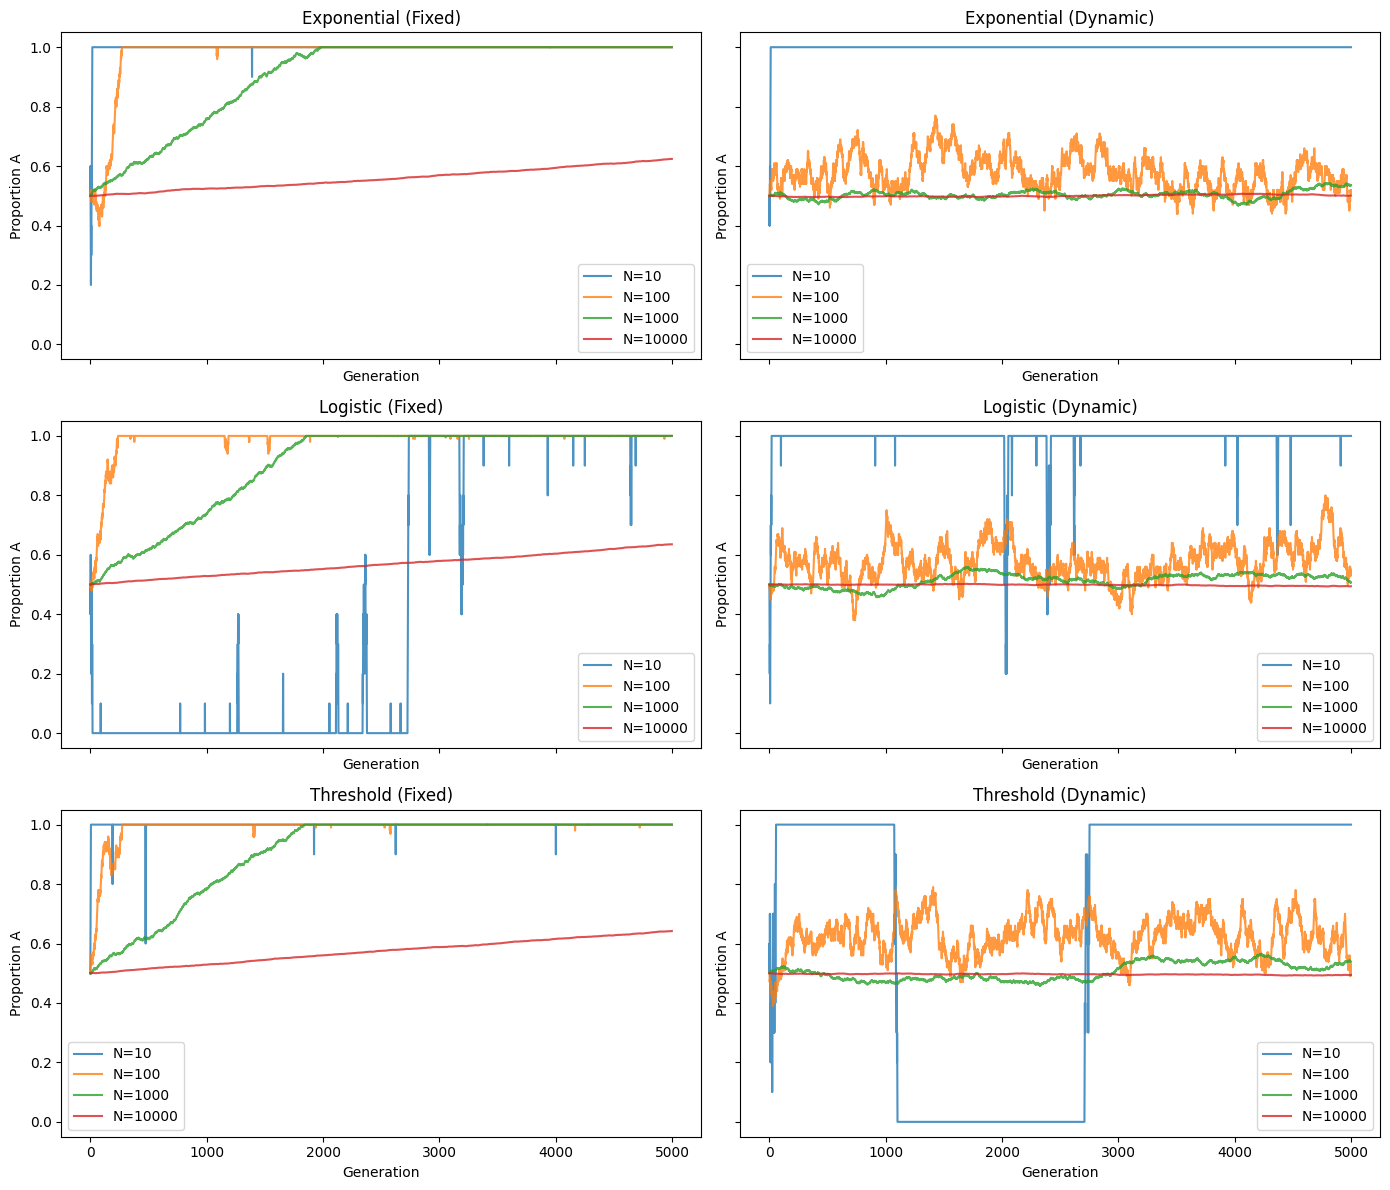

Model  Population  Mean p_A  Variance   Entropy
0     Exponential (Fixed)          10  0.998280  0.000961  0.002181
1     Exponential (Fixed)         100  0.978774  0.009270  0.033069
2     Exponential (Fixed)        1000  0.904939  0.022580  0.190906
3     Exponential (Fixed)       10000  0.557863  0.001234  0.683928
4   Exponential (Dynamic)          10  0.999080  0.000435  0.001380
5   Exponential (Dynamic)         100  0.576780  0.003353  0.674359
6   Exponential (Dynamic)        1000  0.503944  0.000206  0.692704
7   Exponential (Dynamic)       10000  0.500339  0.000011  0.693126
8        Logistic (Fixed)          10  0.455420  0.241435  0.019573
9        Logistic (Fixed)         100  0.987786  0.003922  0.025287
10       Logistic (Fixed)        1000  0.901768  0.023657  0.193136
11       Logistic (Fixed)       10000  0.566440  0.001419  0.681396
12     Logistic (Dynamic)          10  0.990800  0.004203  0.014726
13     Logistic (Dynamic)         100  0.575424  0.003823  0.673793
14     Logistic (Dynamic)        1000  0.514313  0.000507  0.691722
15     Logistic (Dynamic)       10000  0.498486  0.000005  0.693133
16      Threshold (Fixed)          10  0.999240  0.000215  0.001695
17      Threshold (Fixed)         100  0.989794  0.002737  0.023679
18      Threshold (Fixed)        1000  0.908985  0.022140  0.182210
19      Threshold (Fixed)       10000  0.572619  0.001681  0.679123
20    Threshold (Dynamic)          10  0.666540  0.216990  0.015288
21    Threshold (Dynamic)         100  0.625200  0.004088  0.652695
22    Threshold (Dynamic)        1000  0.505466  0.000868  0.691350
23    Threshold (Dynamic)       10000  0.496408  0.000003  0.693115

In [ ]:
# Now that all model functions are defined, rerun the analysis across population sizes
# and collect summary statistics

# Re-import necessary tools for plotting and display
import pandas as pd

# Define entropy calculation
def entropy(p_A):
    p_B = 1 - p_A
    with np.errstate(divide='ignore', invalid='ignore'):
        h = -p_A * np.log(p_A) - p_B * np.log(p_B)
        h = np.nan_to_num(h)
    return h

# Run simulations across populations for a given model
def run_across_populations(model_function, pop_sizes, generations=5000, p_A_init=0.5):
    results = {}
    for N in pop_sizes:
        history = model_function(N=N, generations=generations, p_A_init=p_A_init)
        p_A_arr = np.array(history)
        mean_p_A = np.mean(p_A_arr)
        var_p_A = np.var(p_A_arr)
        entropy_vals = entropy(p_A_arr)
        mean_entropy = np.mean(entropy_vals)

        results[N] = {
            "p_A": p_A_arr,
            "mean": mean_p_A,
            "variance": var_p_A,
            "entropy": mean_entropy
        }
    return results

# Define population sizes and models
population_sizes = [10, 100, 1000, 10000]
models = {
    "Exponential (Fixed)": simulate_exponential_fixed,
    "Exponential (Dynamic)": simulate_exponential_dynamic,
    "Logistic (Fixed)": simulate_logistic_fixed,
    "Logistic (Dynamic)": simulate_logistic_dynamic,
    "Threshold (Fixed)": simulate_threshold_fixed,
    "Threshold (Dynamic)": simulate_threshold_dynamic
}

# Run all models
all_results = {name: run_across_populations(func, population_sizes) for name, func in models.items()}

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(14, 12), sharex=True, sharey=True)
axs = axs.flatten()
for ax, (model_name, results) in zip(axs, all_results.items()):
    for N in population_sizes:
        ax.plot(results[N]["p_A"], label=f"N={N}", alpha=0.8)
    ax.set_title(model_name)
    ax.set_xlabel("Generation")
    ax.set_ylabel("Proportion A")
    ax.legend()

plt.tight_layout()
plt.show()

# Create summary table
summary_data = []
for model_name, results in all_results.items():
    for N, stats in results.items():
        summary_data.append({
            "Model": model_name,
            "Population": N,
            "Mean p_A": stats["mean"],
            "Variance": stats["variance"],
            "Entropy": stats["entropy"]
        })

summary_df = pd.DataFrame(summary_data)
from IPython.display import display
display(summary_df)


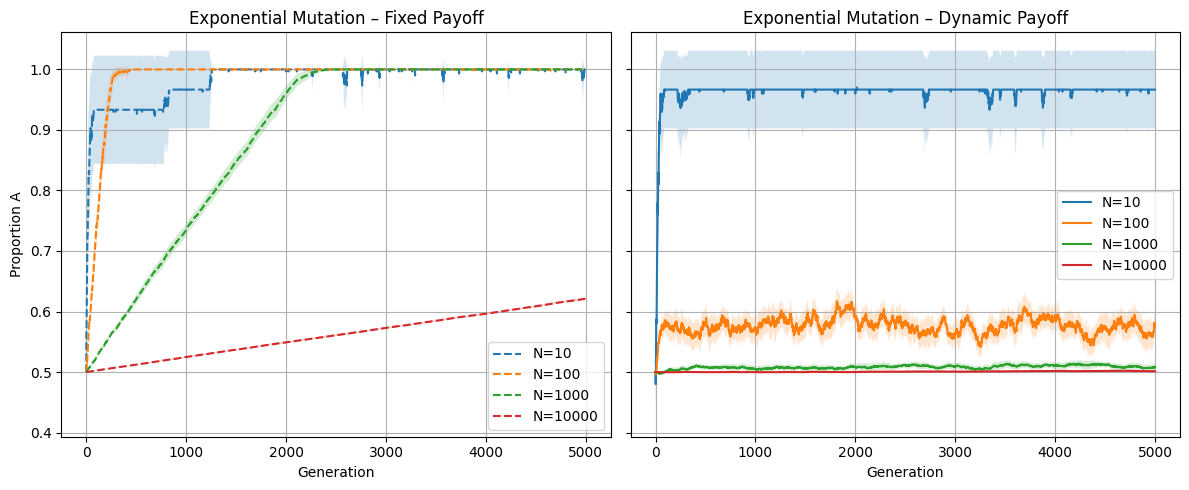

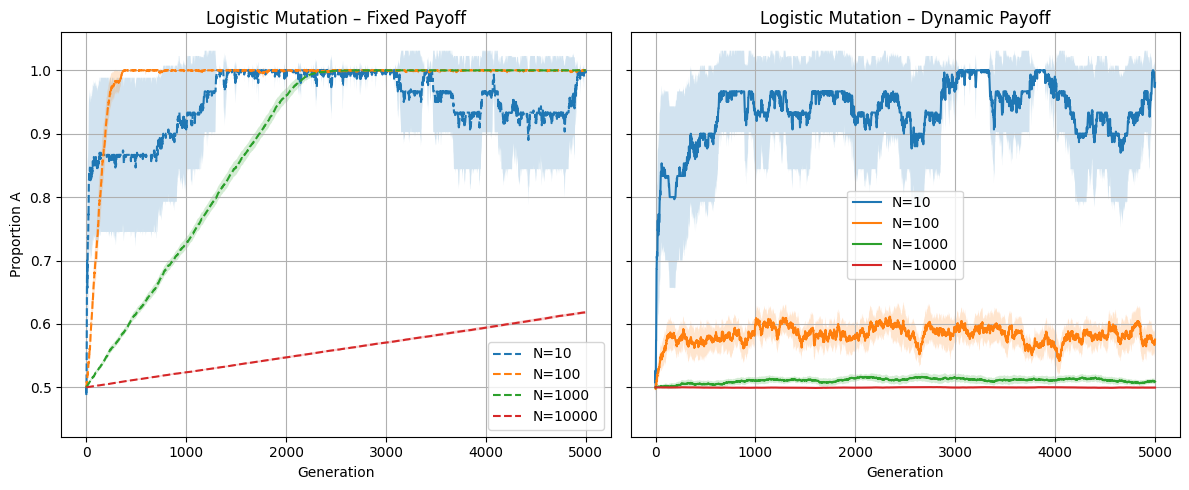

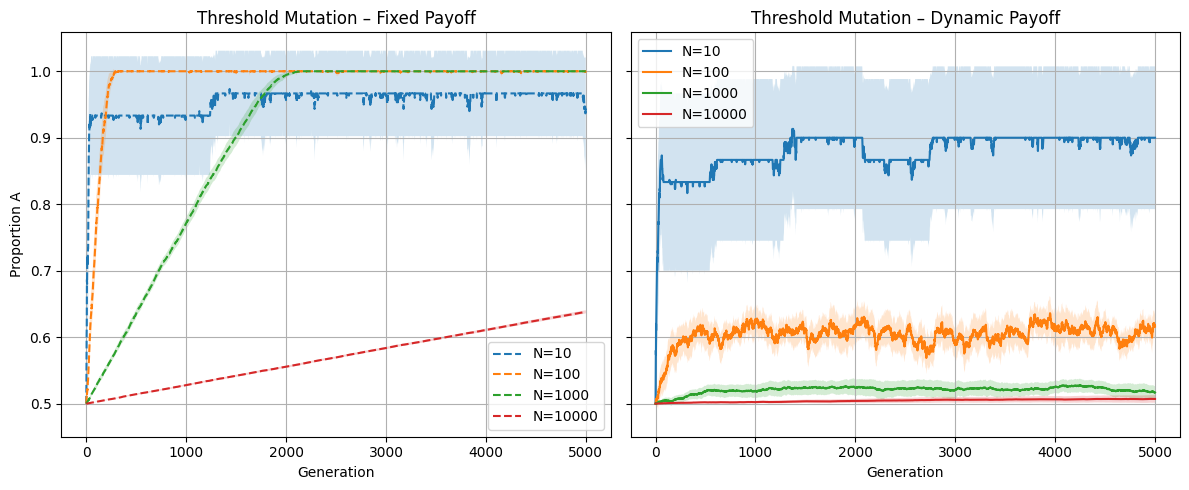

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Utility function to run multiple replicates and compute CI
def run_with_confidence_intervals(model_func, N, generations, p_A_init, reps=30):
    histories = []
    for _ in range(reps):
        history = model_func(N=N, generations=generations, p_A_init=p_A_init)
        histories.append(history)
    histories = np.array(histories)
    mean = np.mean(histories, axis=0)
    std = np.std(histories, axis=0)
    lower = mean - 1.96 * std / np.sqrt(reps)
    upper = mean + 1.96 * std / np.sqrt(reps)
    return mean, lower, upper, histories

# Plotting function
def plot_fixed_vs_dynamic_side_by_side(model_name, simulate_fixed, simulate_dynamic):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    for N in population_sizes:
        # Fixed
        mean_fixed, lower_fixed, upper_fixed, _ = run_with_confidence_intervals(simulate_fixed, N, generations, p_A_init)
        axes[0].plot(mean_fixed, label=f"N={N}", linestyle='--')
        axes[0].fill_between(range(generations), lower_fixed, upper_fixed, alpha=0.2)
        axes[0].set_title(f"{model_name} – Fixed Payoff")
        axes[0].set_xlabel("Generation")
        axes[0].set_ylabel("Proportion A")
        axes[0].grid(True)
        axes[0].legend()

        # Dynamic
        mean_dynamic, lower_dynamic, upper_dynamic, _ = run_with_confidence_intervals(simulate_dynamic, N, generations, p_A_init)
        axes[1].plot(mean_dynamic, label=f"N={N}")
        axes[1].fill_between(range(generations), lower_dynamic, upper_dynamic, alpha=0.2)
        axes[1].set_title(f"{model_name} – Dynamic Payoff")
        axes[1].set_xlabel("Generation")
        axes[1].grid(True)
        axes[1].legend()

    plt.tight_layout()
    plt.show()

# Set global parameters
generations = 5000
population_sizes = [10, 100, 1000, 10000]
p_A_init = 0.5

# Run plots for each mutation model
plot_fixed_vs_dynamic_side_by_side("Exponential Mutation", simulate_exponential_fixed, simulate_exponential_dynamic)
plot_fixed_vs_dynamic_side_by_side("Logistic Mutation", simulate_logistic_fixed, simulate_logistic_dynamic)
plot_fixed_vs_dynamic_side_by_side("Threshold Mutation", simulate_threshold_fixed, simulate_threshold_dynamic)



###Entropy and Variance, N=100, 1000

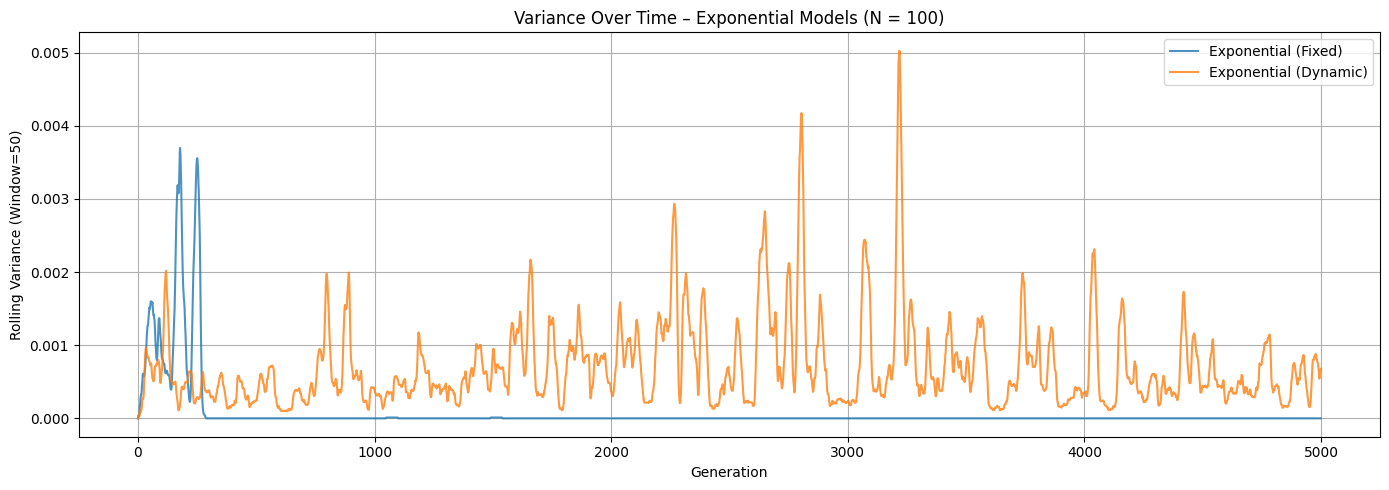

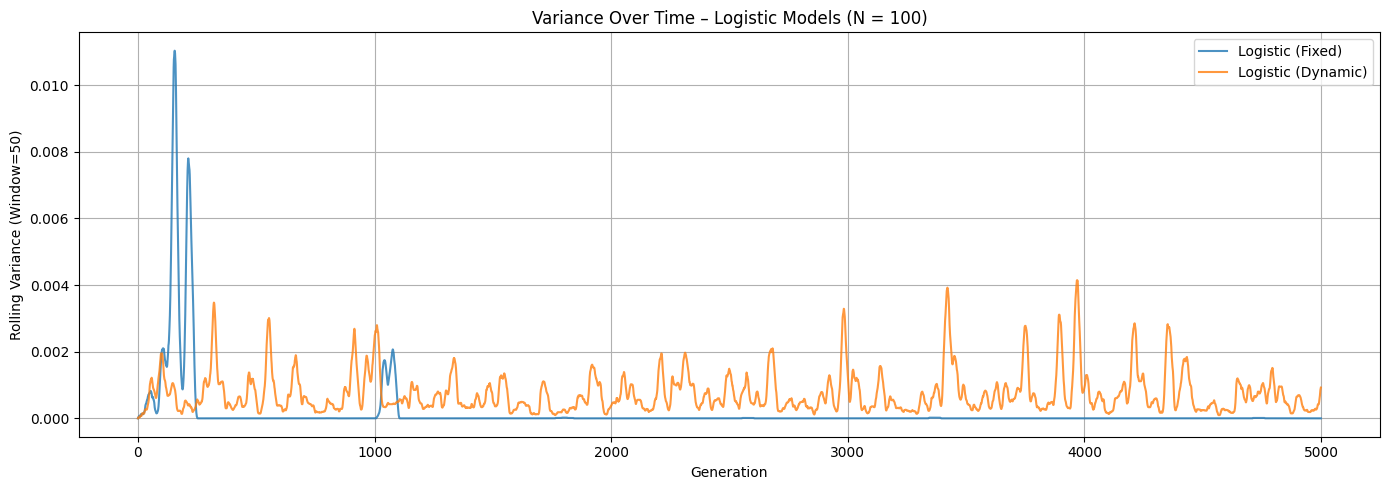

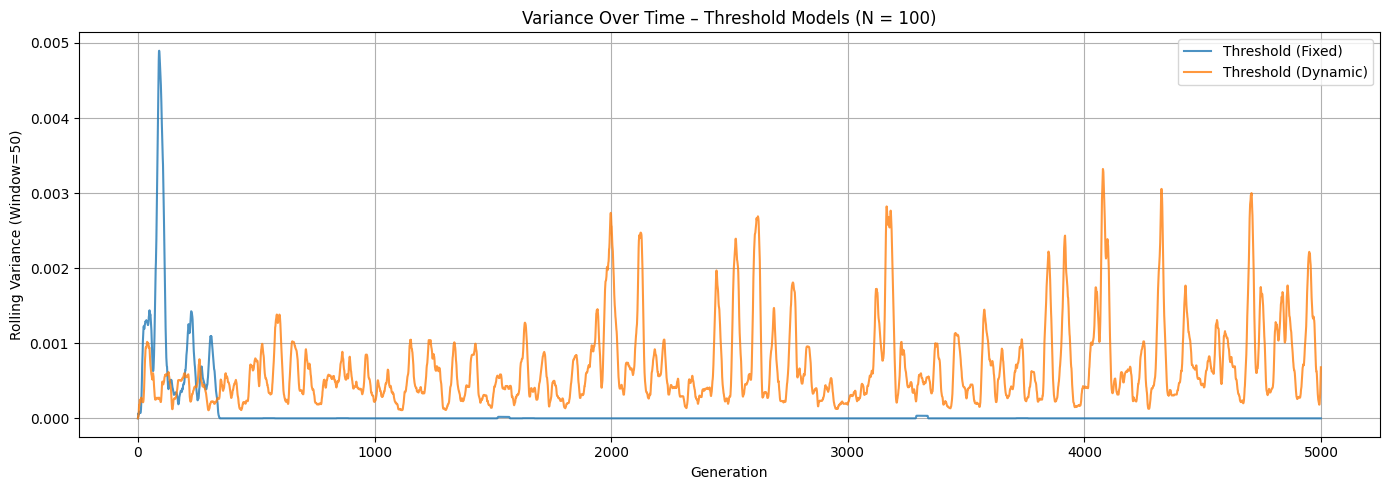

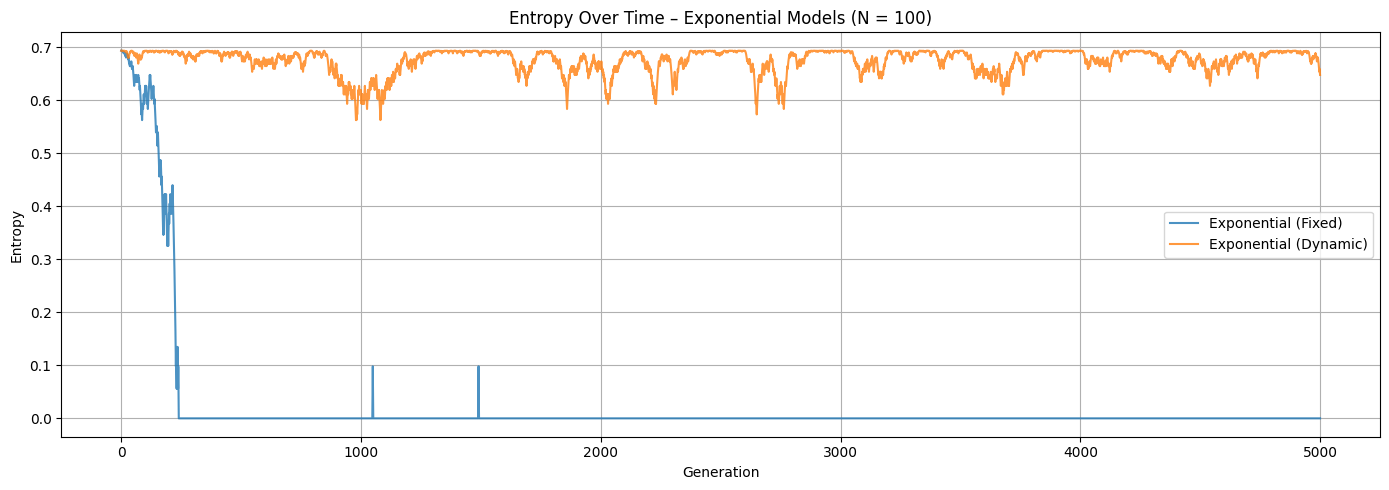

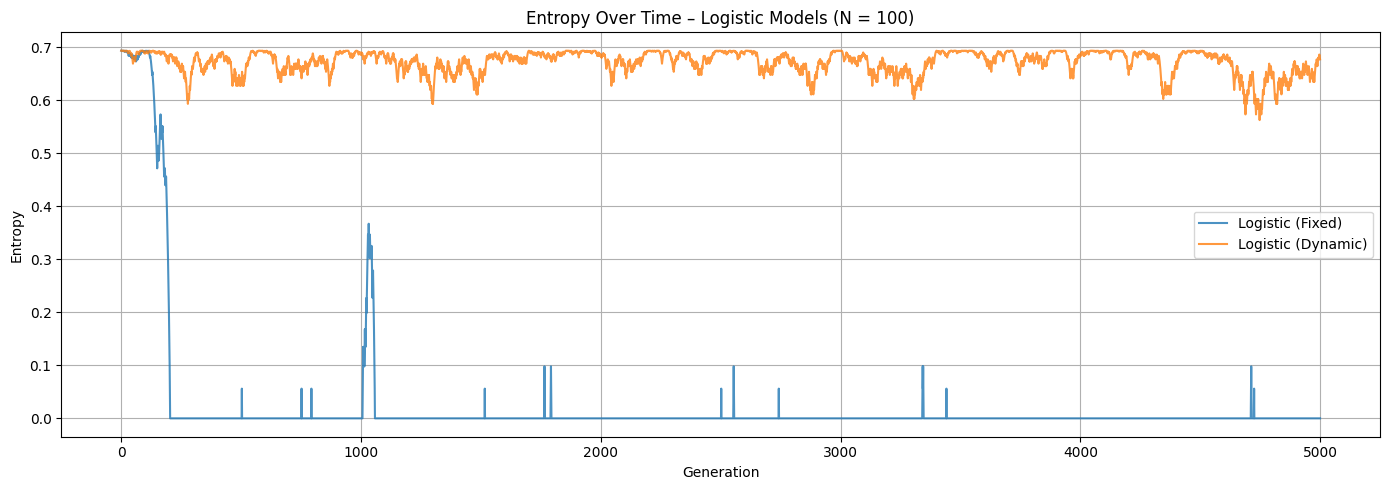

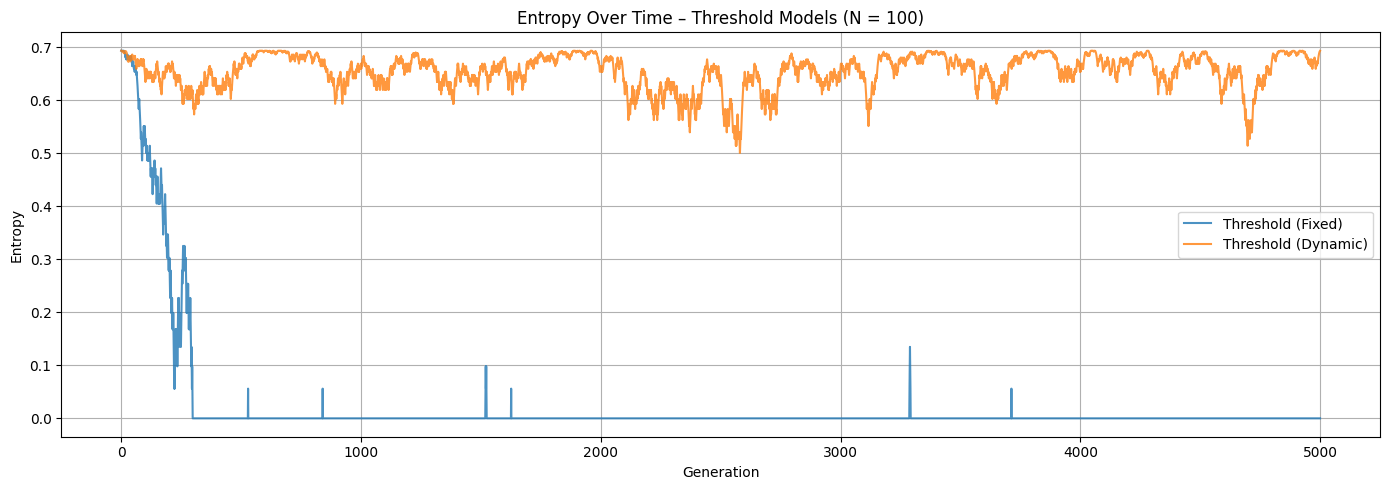

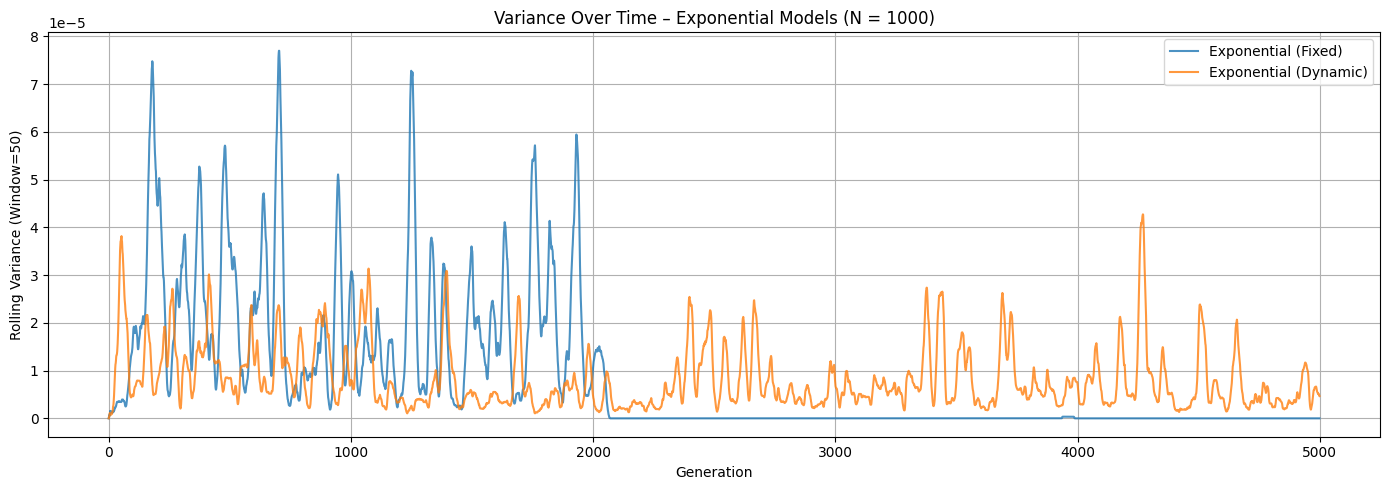

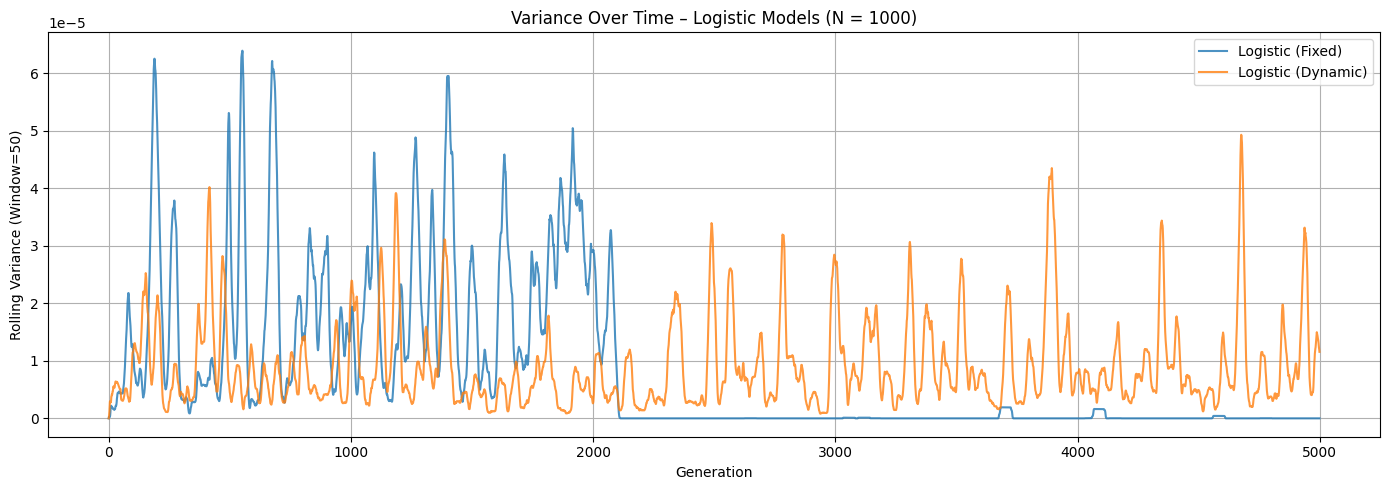

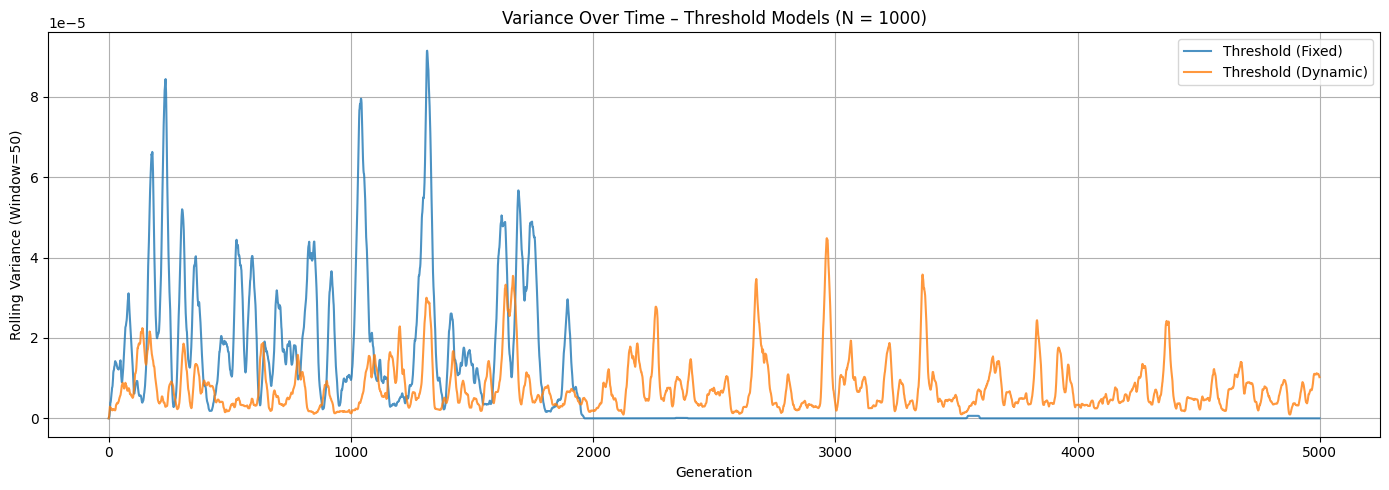

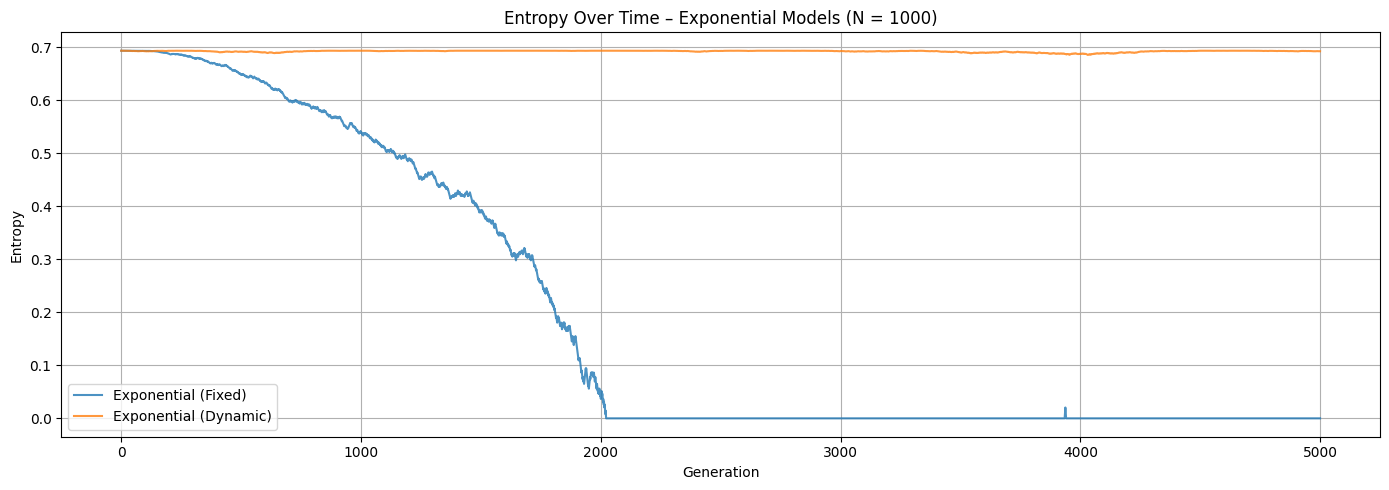

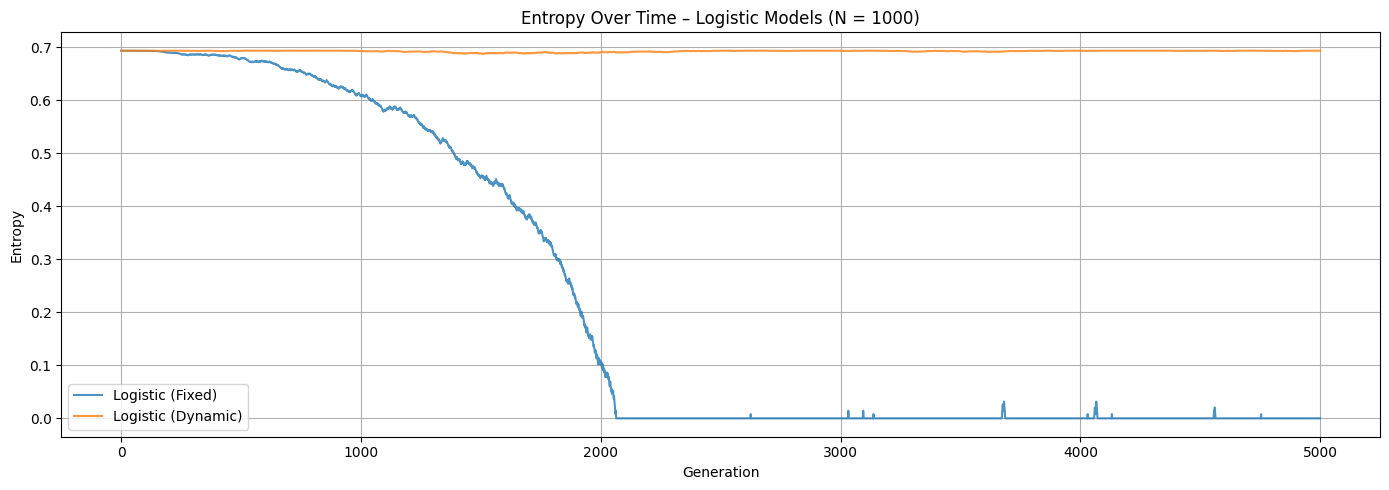

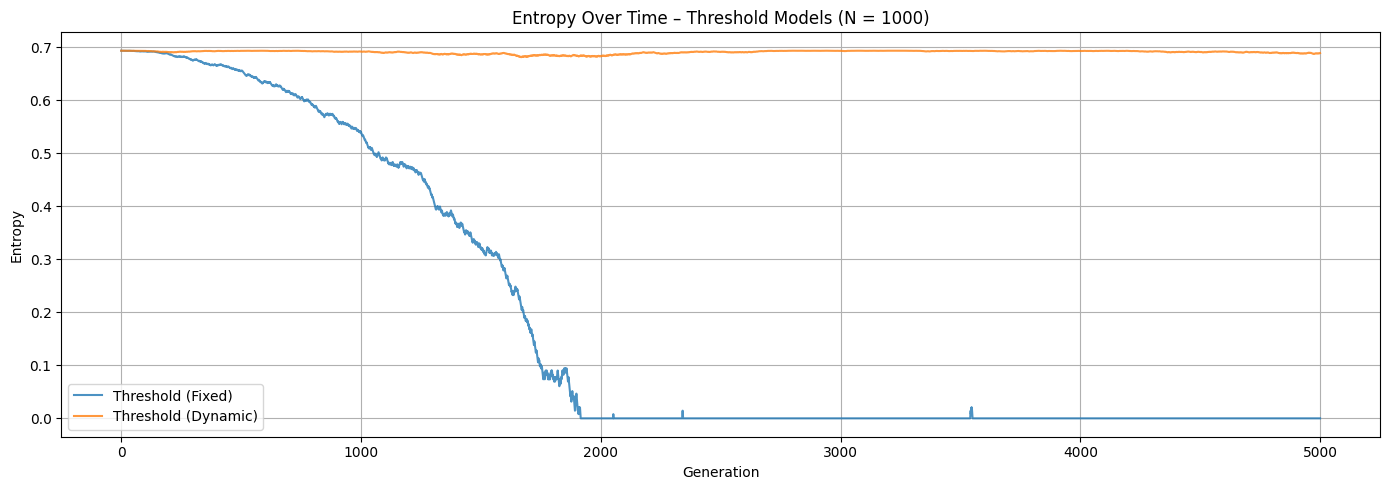

In [ ]:
# @title
Ns = [100, 1000]
# Define the function to compute rolling variance and entropy over time
def compute_variance_and_entropy_over_time(p_A_series, window_size=50):
    rolling_variance = []
    entropy_series = []
    for t in range(1, len(p_A_series) + 1):
        current_window = p_A_series[max(0, t - window_size):t]
        variance = np.var(current_window)
        rolling_variance.append(variance)
        entropy_value = entropy(np.array([p_A_series[t - 1]]))[0]
        entropy_series.append(entropy_value)
    return np.array(rolling_variance), np.array(entropy_series)

# Re-define models_to_plot for completeness
models_to_plot = {
    "Exponential (Fixed)": simulate_exponential_fixed,
    "Exponential (Dynamic)": simulate_exponential_dynamic,
    "Logistic (Fixed)": simulate_logistic_fixed,
    "Logistic (Dynamic)": simulate_logistic_dynamic,
    "Threshold (Fixed)": simulate_threshold_fixed,
    "Threshold (Dynamic)": simulate_threshold_dynamic
}

# Re-run the grouped plotting code for variance and entropy over time for N = 100 and N = 1000
results_by_N = {N: {} for N in Ns}

for N in Ns:
    for model_name, model_func in models_to_plot.items():
        var_series, ent_series = compute_variance_and_entropy_over_time(model_func(N=N, generations=5000), window_size=50)
        results_by_N[N][model_name] = {"variance": var_series, "entropy": ent_series}

# Plot grouped by model type for each N
for N in Ns:
    # Variance plots
    plt.figure(figsize=(14, 5))
    for model in ["Exponential (Fixed)", "Exponential (Dynamic)"]:
        plt.plot(results_by_N[N][model]["variance"], label=model, alpha=0.8)
    plt.title(f"Variance Over Time – Exponential Models (N = {N})")
    plt.xlabel("Generation")
    plt.ylabel("Rolling Variance (Window=50)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    for model in ["Logistic (Fixed)", "Logistic (Dynamic)"]:
        plt.plot(results_by_N[N][model]["variance"], label=model, alpha=0.8)
    plt.title(f"Variance Over Time – Logistic Models (N = {N})")
    plt.xlabel("Generation")
    plt.ylabel("Rolling Variance (Window=50)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    for model in ["Threshold (Fixed)", "Threshold (Dynamic)"]:
        plt.plot(results_by_N[N][model]["variance"], label=model, alpha=0.8)
    plt.title(f"Variance Over Time – Threshold Models (N = {N})")
    plt.xlabel("Generation")
    plt.ylabel("Rolling Variance (Window=50)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Entropy plots
    plt.figure(figsize=(14, 5))
    for model in ["Exponential (Fixed)", "Exponential (Dynamic)"]:
        plt.plot(results_by_N[N][model]["entropy"], label=model, alpha=0.8)
    plt.title(f"Entropy Over Time – Exponential Models (N = {N})")
    plt.xlabel("Generation")
    plt.ylabel("Entropy")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    for model in ["Logistic (Fixed)", "Logistic (Dynamic)"]:
        plt.plot(results_by_N[N][model]["entropy"], label=model, alpha=0.8)
    plt.title(f"Entropy Over Time – Logistic Models (N = {N})")
    plt.xlabel("Generation")
    plt.ylabel("Entropy")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    for model in ["Threshold (Fixed)", "Threshold (Dynamic)"]:
        plt.plot(results_by_N[N][model]["entropy"], label=model, alpha=0.8)
    plt.title(f"Entropy Over Time – Threshold Models (N = {N})")
    plt.xlabel("Generation")
    plt.ylabel("Entropy")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


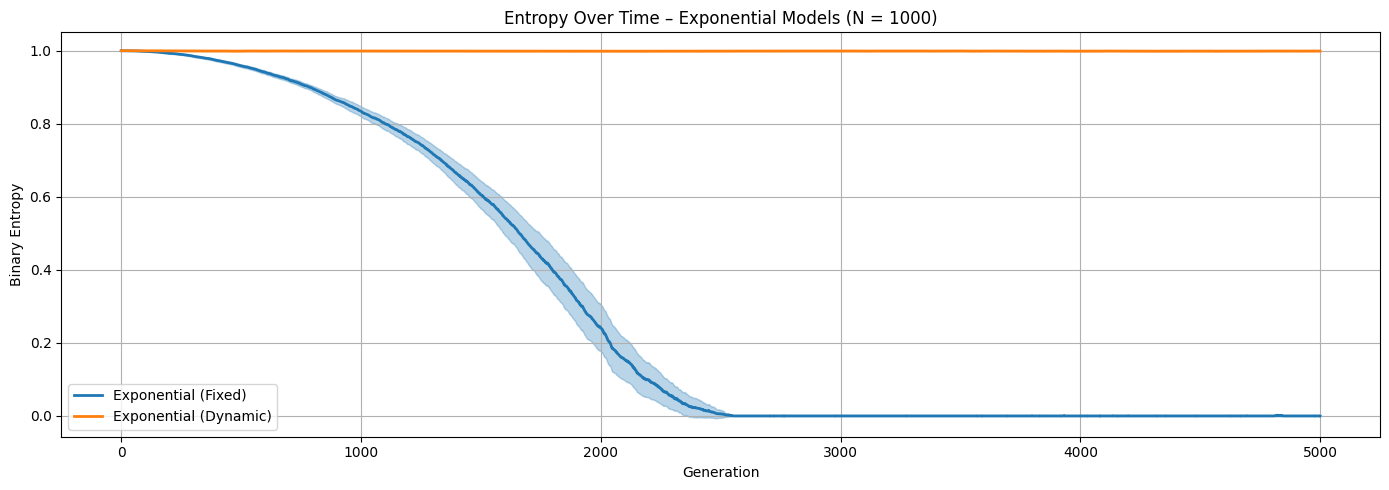

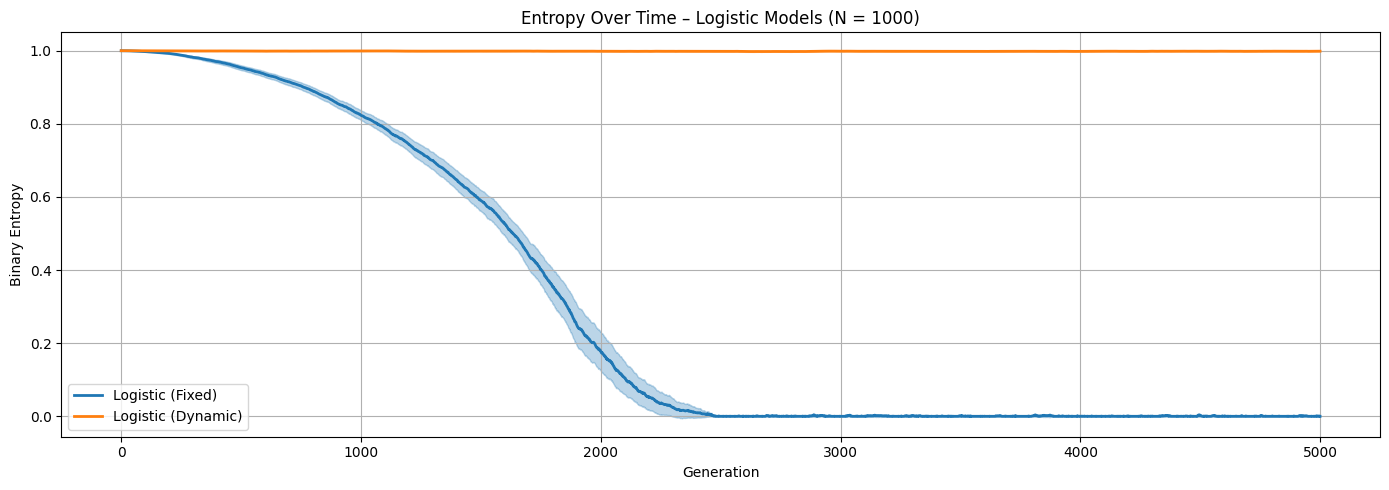

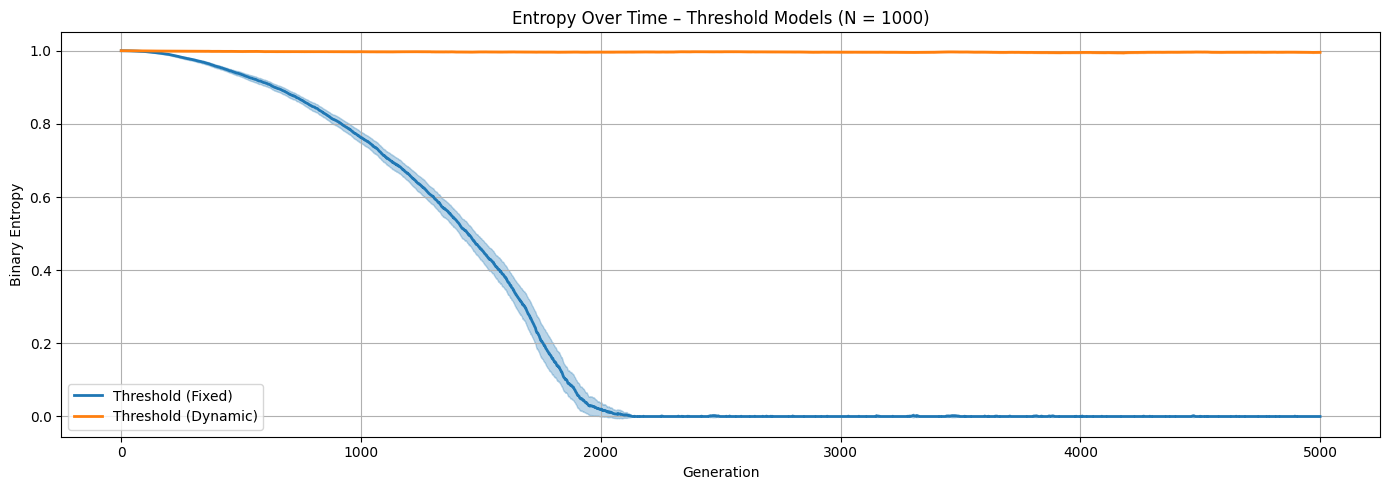

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Define entropy function for binary entropy
def binary_entropy(p):
    p = np.clip(p, 1e-10, 1 - 1e-10)  # Avoid log(0)
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Run replicates for entropy
def run_entropy_replicates(sim_func, N, reps=30, generations=5000):
    all_entropy = []
    for _ in range(reps):
        p_series = sim_func(N=N, generations=generations)
        entropy_series = [binary_entropy(p) for p in p_series]
        all_entropy.append(entropy_series)
    return np.array(all_entropy)

# Plot entropy with confidence interval
def plot_entropy_ci(entropy_data, label, color):
    mean = np.mean(entropy_data, axis=0)
    std = np.std(entropy_data, axis=0)
    lower = mean - 1.96 * std / np.sqrt(entropy_data.shape[0])
    upper = mean + 1.96 * std / np.sqrt(entropy_data.shape[0])
    plt.plot(mean, label=label, color=color, linewidth=2)
    plt.fill_between(range(len(mean)), lower, upper, color=color, alpha=0.3)

# Collect entropy replicates for N=1000
entropy_replicates_1000 = {
    "Exponential (Fixed)": run_entropy_replicates(simulate_exponential_fixed, N=1000),
    "Exponential (Dynamic)": run_entropy_replicates(simulate_exponential_dynamic, N=1000),
    "Logistic (Fixed)": run_entropy_replicates(simulate_logistic_fixed, N=1000),
    "Logistic (Dynamic)": run_entropy_replicates(simulate_logistic_dynamic, N=1000),
    "Threshold (Fixed)": run_entropy_replicates(simulate_threshold_fixed, N=1000),
    "Threshold (Dynamic)": run_entropy_replicates(simulate_threshold_dynamic, N=1000),
}

# Plot grouped models
model_groups = [
    ("Exponential", ["Exponential (Fixed)", "Exponential (Dynamic)"]),
    ("Logistic", ["Logistic (Fixed)", "Logistic (Dynamic)"]),
    ("Threshold", ["Threshold (Fixed)", "Threshold (Dynamic)"])
]

colors = ['tab:blue', 'tab:orange']

for title, models in model_groups:
    plt.figure(figsize=(14, 5))
    for model, color in zip(models, colors):
        plot_entropy_ci(entropy_replicates_1000[model], model, color)
    plt.title(f"Entropy Over Time – {title} Models (N = 1000)")
    plt.xlabel("Generation")
    plt.ylabel("Binary Entropy")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



###Exponential, Logistic, Threshold, With and W/Out Dynamic Payoffs - Fixed N=1000


*   Varying $\mu_0 = 0.01, 0.05, 0.10 $
*   Varying $p_A(0) = 0.1, 0.3, 0.5, 0.7, 0.9$
*   Varying $\beta = 1, 5, 10$
*   Varying $\alpha =0, 0.01, 0.05, 0.10$



In [ ]:
# @title
# Wrapper functions to allow unified parameter passing

def wrapped_simulate_exponential_fixed(**kwargs):
    return simulate_exponential_fixed(
        N=kwargs.get("N", 100),
        generations=kwargs.get("generations", 5000),
        p_A_init=kwargs.get("p_A_init", 0.5),
        mu_0=kwargs.get("mu_0", 0.05),
        beta=kwargs.get("beta", 5)
    )

def wrapped_simulate_exponential_dynamic(**kwargs):
    return simulate_exponential_dynamic(
        N=kwargs.get("N", 100),
        generations=kwargs.get("generations", 5000),
        p_A_init=kwargs.get("p_A_init", 0.5),
        mu_0=kwargs.get("mu_0", 0.05),
        beta=kwargs.get("beta", 5),
        alpha=kwargs.get("alpha", 0.05)
    )

def wrapped_simulate_logistic_fixed(**kwargs):
    return simulate_logistic_fixed(
        N=kwargs.get("N", 100),
        generations=kwargs.get("generations", 5000),
        p_A_init=kwargs.get("p_A_init", 0.5),
        mu_0=kwargs.get("mu_0", 0.05),
        beta=kwargs.get("beta", 5),
        p_c=kwargs.get("p_c", 0.5)
    )

def wrapped_simulate_logistic_dynamic(**kwargs):
    return simulate_logistic_dynamic(
        N=kwargs.get("N", 100),
        generations=kwargs.get("generations", 5000),
        p_A_init=kwargs.get("p_A_init", 0.5),
        mu_0=kwargs.get("mu_0", 0.05),
        beta=kwargs.get("beta", 5),
        p_c=kwargs.get("p_c", 0.5),
        alpha=kwargs.get("alpha", 0.05)
    )

def wrapped_simulate_threshold_fixed(**kwargs):
    return simulate_threshold_fixed(
        N=kwargs.get("N", 100),
        generations=kwargs.get("generations", 5000),
        p_A_init=kwargs.get("p_A_init", 0.5),
        mu_0=kwargs.get("mu_0", 0.05),
        mu_low=kwargs.get("mu_low", 0.001),
        p_th=kwargs.get("p_th", 0.5)
    )

def wrapped_simulate_threshold_dynamic(**kwargs):
    return simulate_threshold_dynamic(
        N=kwargs.get("N", 100),
        generations=kwargs.get("generations", 5000),
        p_A_init=kwargs.get("p_A_init", 0.5),
        mu_0=kwargs.get("mu_0", 0.05),
        mu_low=kwargs.get("mu_low", 0.001),
        p_th=kwargs.get("p_th", 0.5),
        alpha=kwargs.get("alpha", 0.05)
    )

# Replace model dict with wrapped versions
models_to_test = {
    "Exponential (Fixed)": wrapped_simulate_exponential_fixed,
    "Exponential (Dynamic)": wrapped_simulate_exponential_dynamic,
    "Logistic (Fixed)": wrapped_simulate_logistic_fixed,
    "Logistic (Dynamic)": wrapped_simulate_logistic_dynamic,
    "Threshold (Fixed)": wrapped_simulate_threshold_fixed,
    "Threshold (Dynamic)": wrapped_simulate_threshold_dynamic
}


In [ ]:
# @title
# Parameter values
mu_0_values = [0.01, 0.05, 0.10]
p_A_init_values = [0.1, 0.3, 0.5, 0.7, 0.9]
beta_values = [1, 5, 10]
alpha_values = [0, 0.001, 0.01, 0.10]

# Fixed parameters
shared_params = {
    "generations": 5000,
    "p_c": 0.5,
    "p_th": 0.5,
    "mu_low": 0.001
}

# Fixed population size
fixed_N = 1000

# Storage for results
simulated_variants_fixed_N = {
    "vary_mu_0": [],
    "vary_p_A_init": [],
    "vary_beta": [],
    "vary_alpha": []
}

# Wrapped models
models_to_test = {
    "Exponential (Fixed)": wrapped_simulate_exponential_fixed,
    "Exponential (Dynamic)": wrapped_simulate_exponential_dynamic,
    "Logistic (Fixed)": wrapped_simulate_logistic_fixed,
    "Logistic (Dynamic)": wrapped_simulate_logistic_dynamic,
    "Threshold (Fixed)": wrapped_simulate_threshold_fixed,
    "Threshold (Dynamic)": wrapped_simulate_threshold_dynamic
}

# Vary mu_0
for model_name, model_func in models_to_test.items():
    for mu_0 in mu_0_values:
        result = model_func(N=fixed_N, mu_0=mu_0, **shared_params)
        simulated_variants_fixed_N["vary_mu_0"].append({
            "model": model_name, "mu_0": mu_0, "history": result
        })

# Vary p_A_init
for model_name, model_func in models_to_test.items():
    for p_A_init in p_A_init_values:
        result = model_func(N=fixed_N, p_A_init=p_A_init, **shared_params)
        simulated_variants_fixed_N["vary_p_A_init"].append({
            "model": model_name, "p_A_init": p_A_init, "history": result
        })

# Vary beta
for model_name, model_func in models_to_test.items():
    for beta in beta_values:
        result = model_func(N=fixed_N, beta=beta, **shared_params)
        simulated_variants_fixed_N["vary_beta"].append({
            "model": model_name, "beta": beta, "history": result
        })

# Vary alpha
for model_name, model_func in models_to_test.items():
    for alpha in alpha_values:
        result = model_func(N=fixed_N, alpha=alpha, **shared_params)
        simulated_variants_fixed_N["vary_alpha"].append({
            "model": model_name, "alpha": alpha, "history": result
        })

# Output summary
variant_summary_fixed_N = {
    k: f"{len(v)} simulations at N=1000" for k, v in simulated_variants_fixed_N.items()
}
print(variant_summary_fixed_N)


{'vary_mu_0': '18 simulations at N=1000', 'vary_p_A_init': '30 simulations at N=1000', 'vary_beta': '18 simulations at N=1000', 'vary_alpha': '24 simulations at N=1000'}


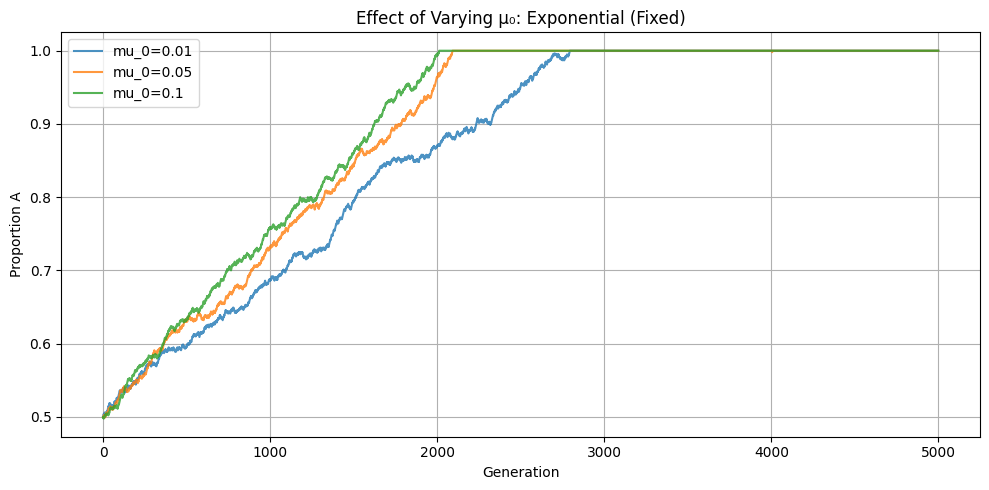

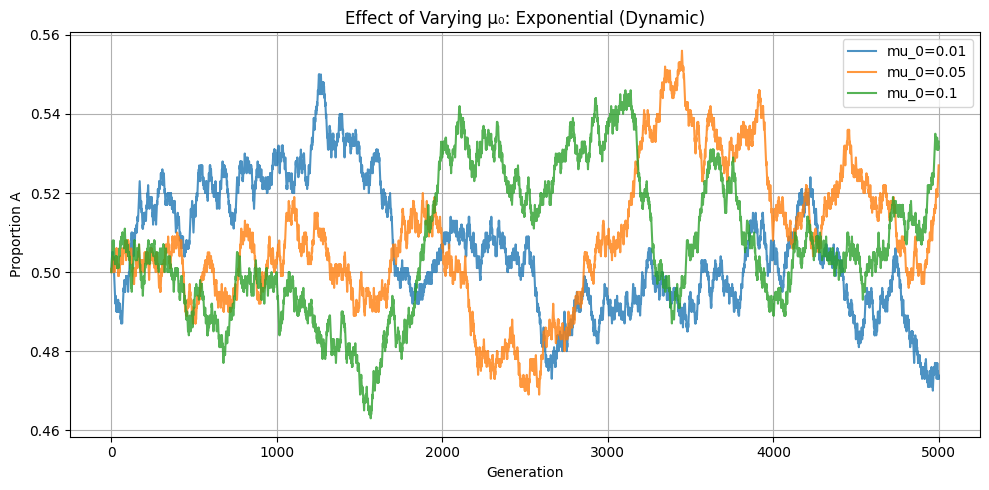

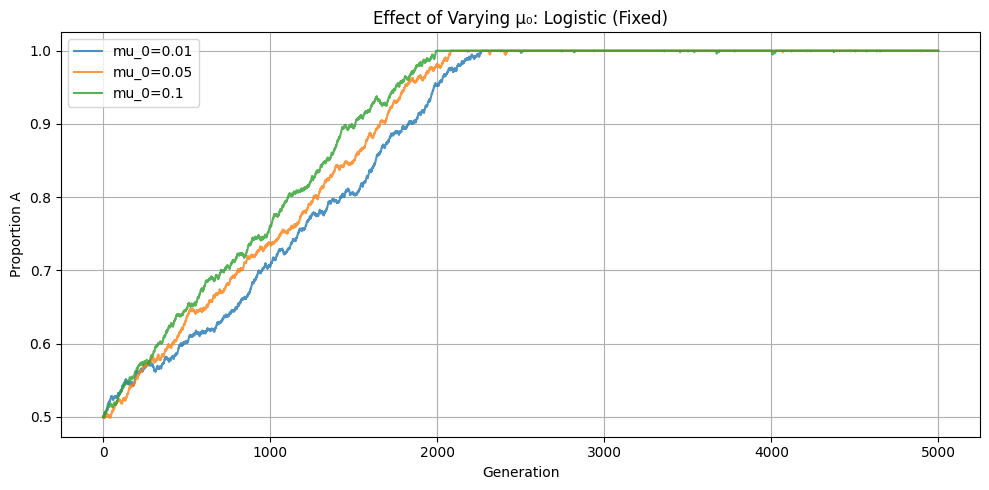

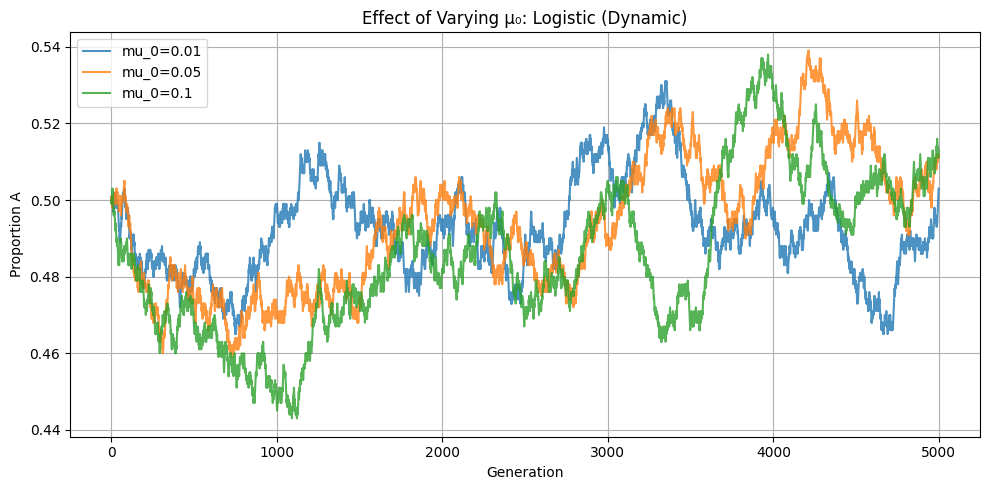

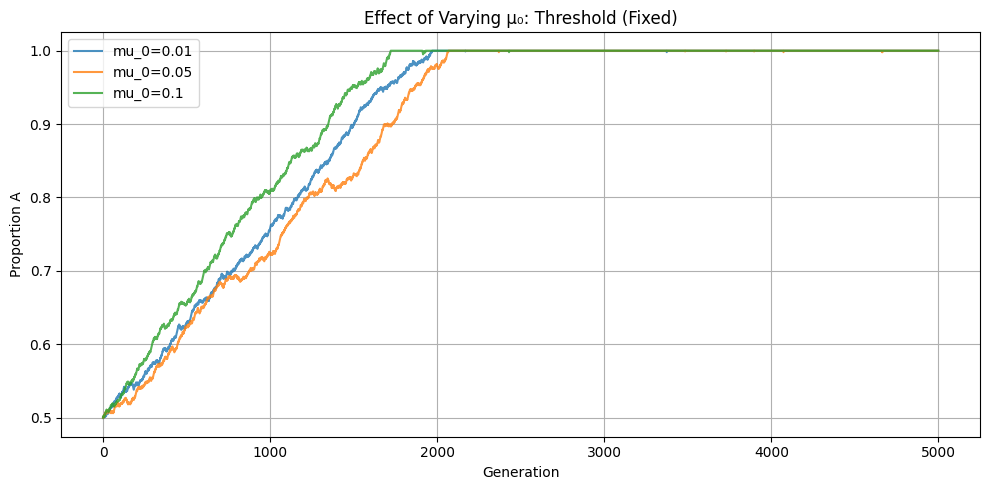

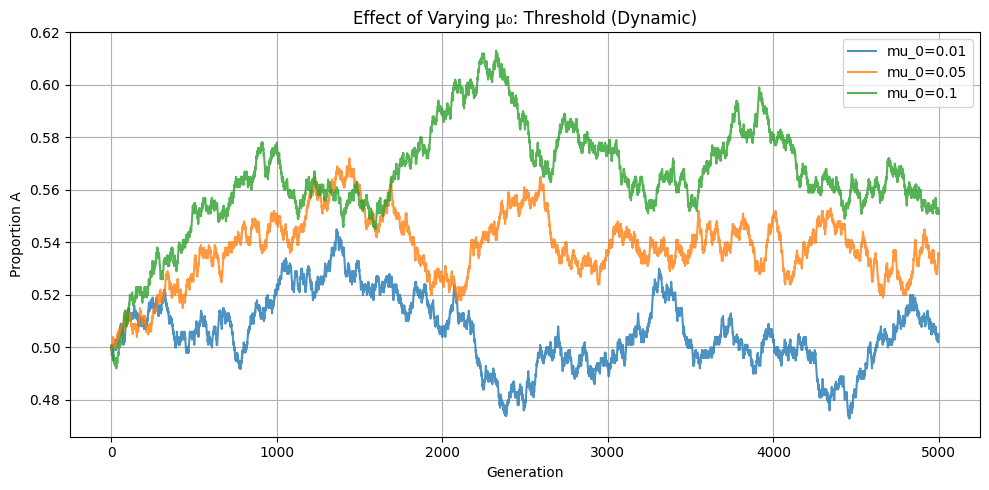

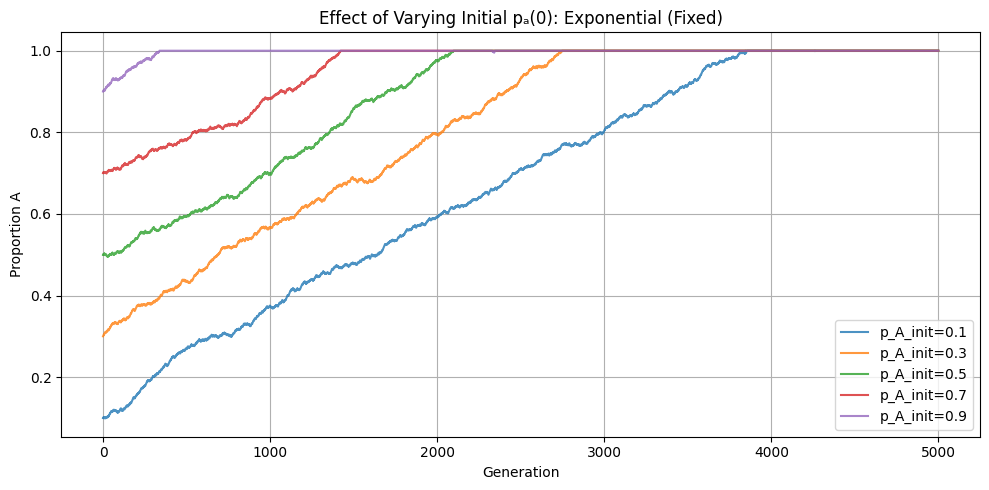

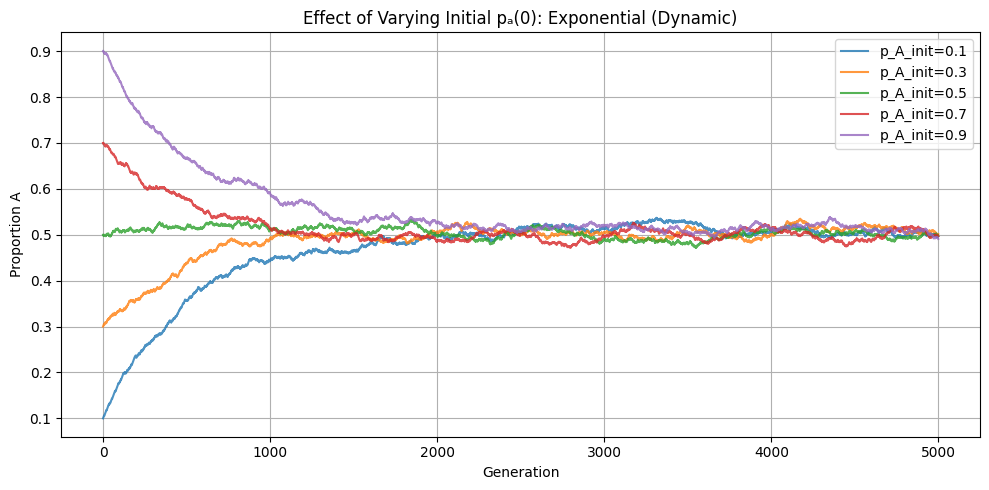

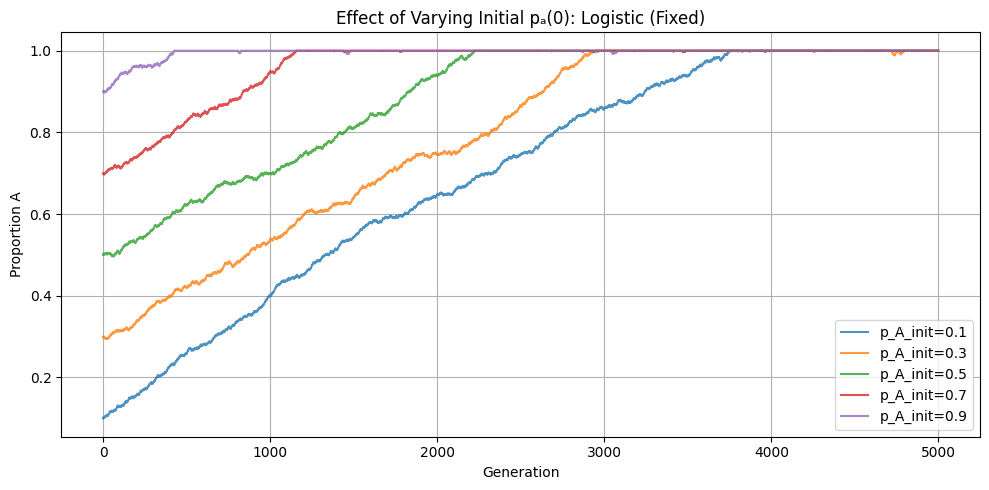

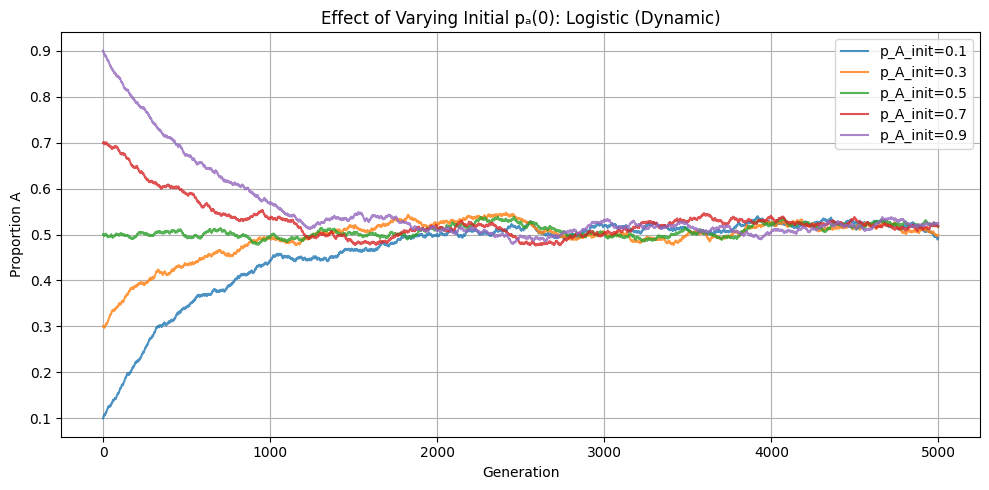

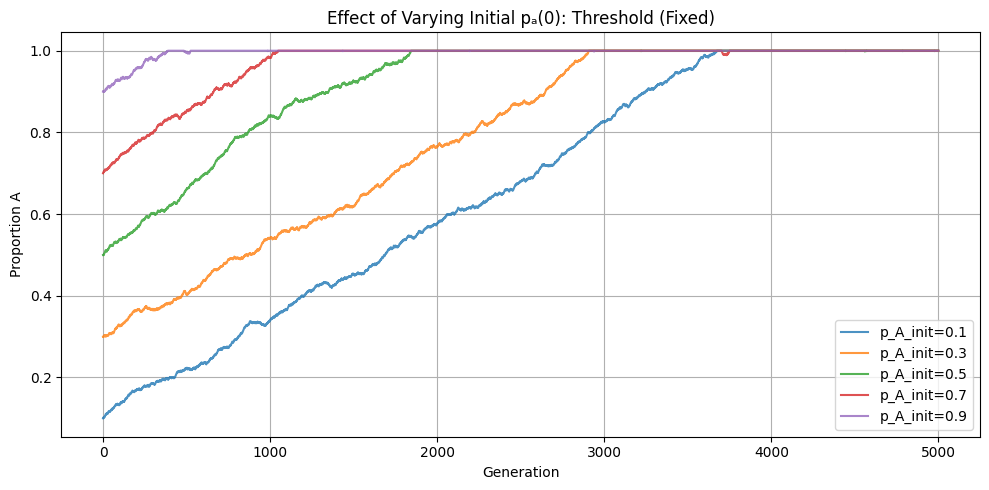

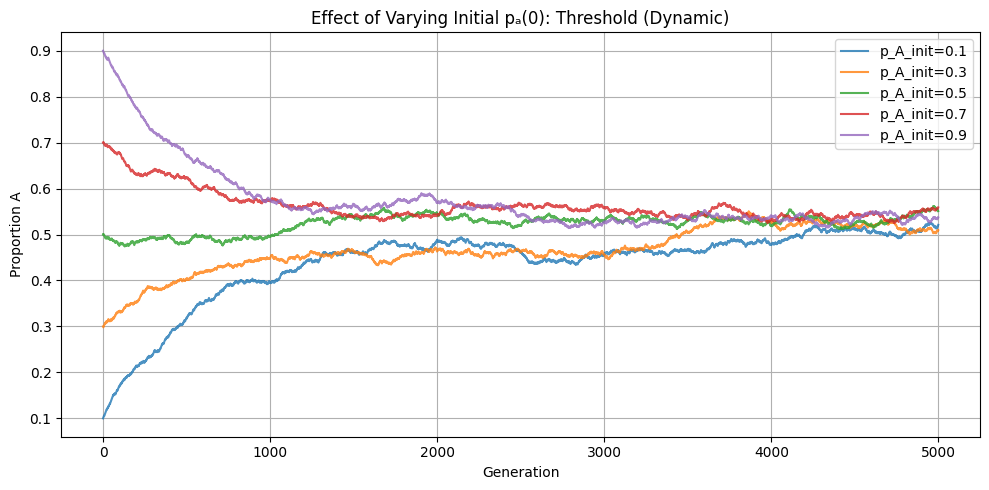

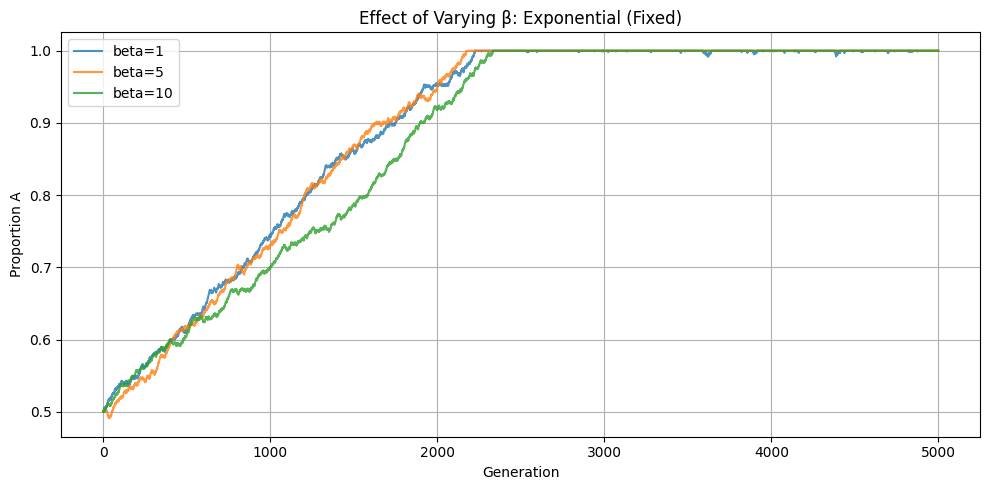

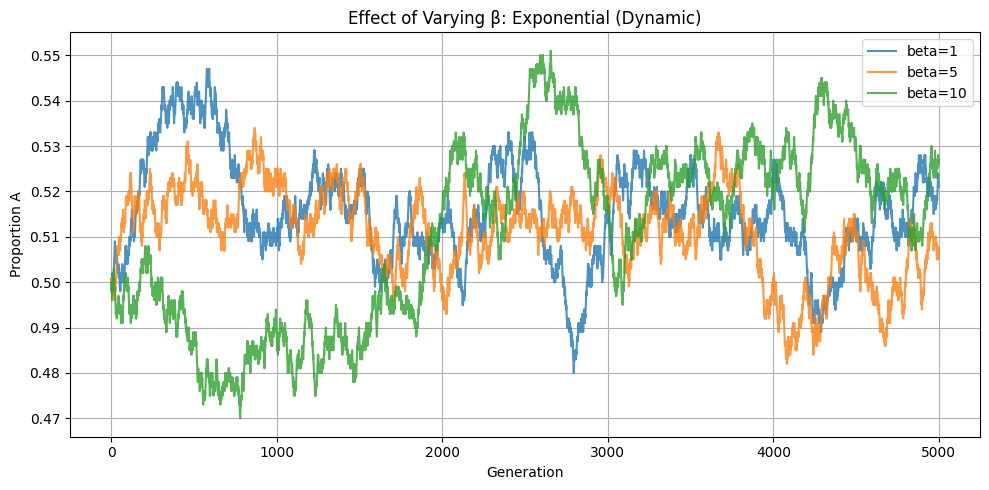

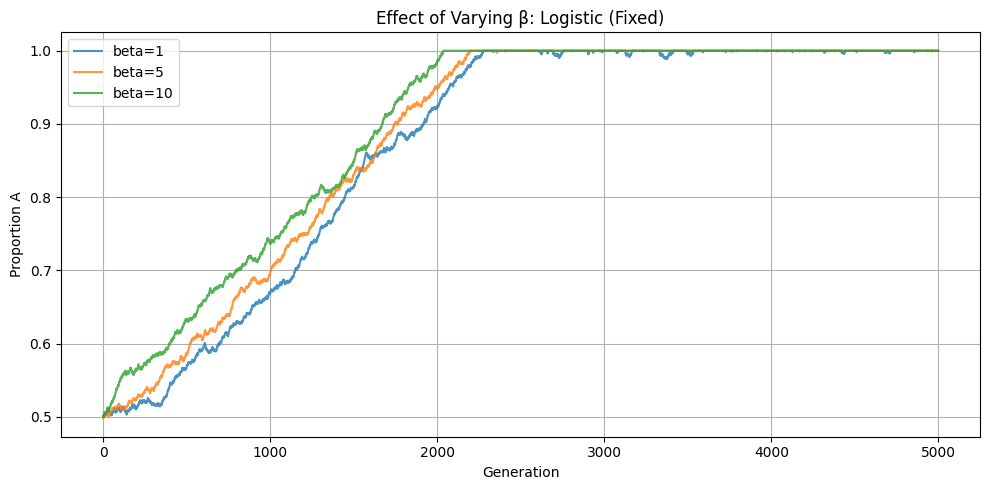

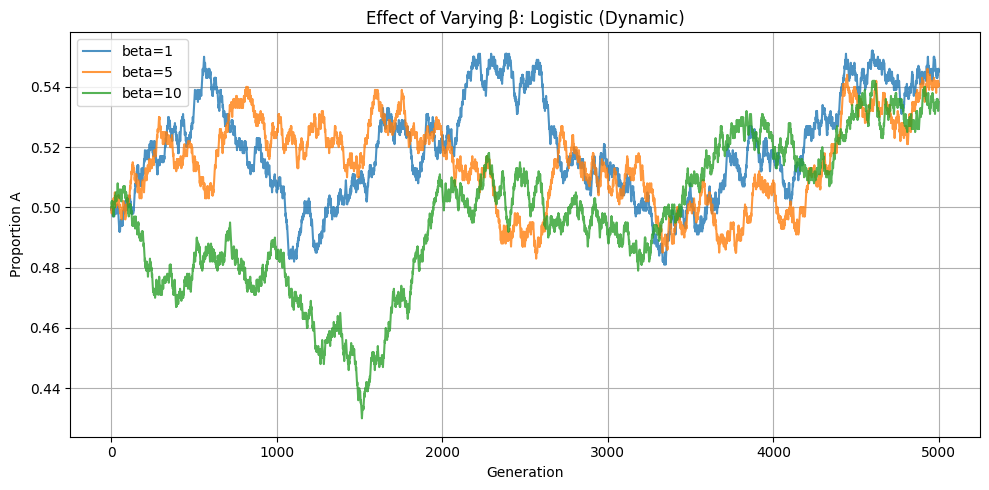

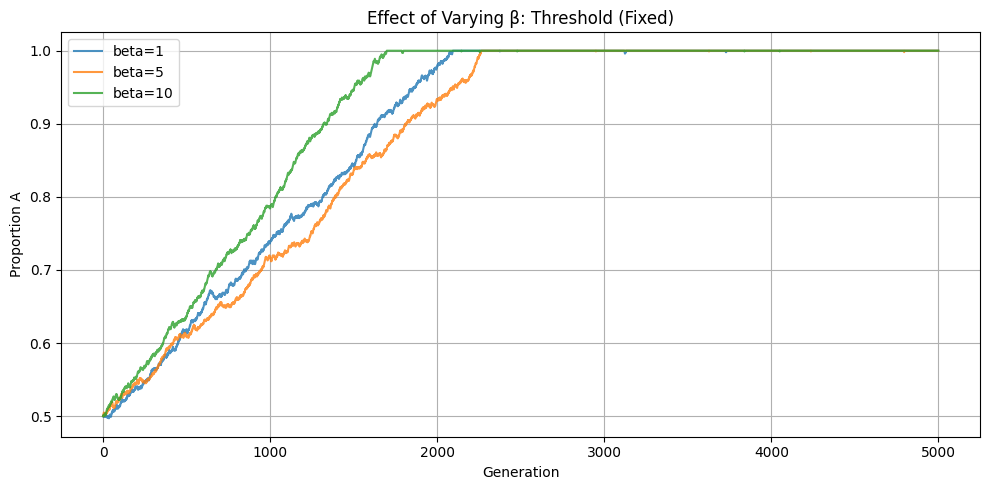

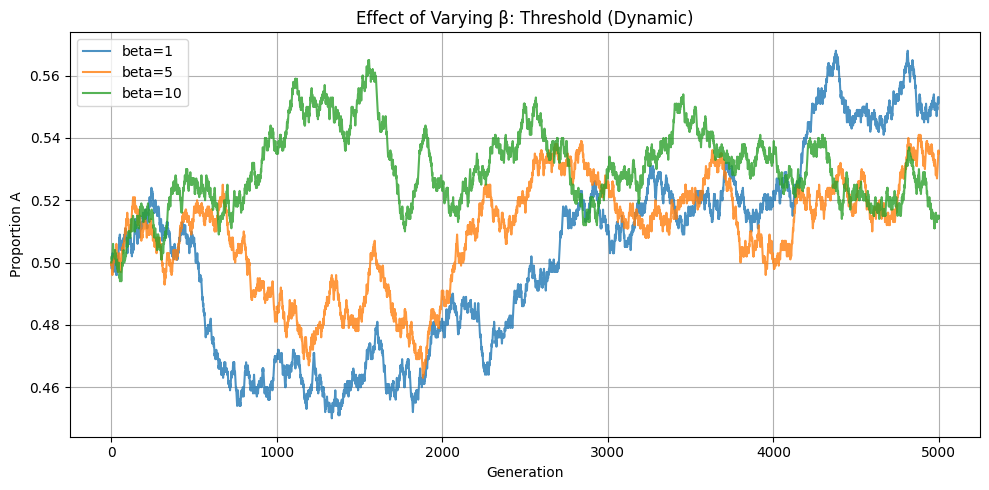

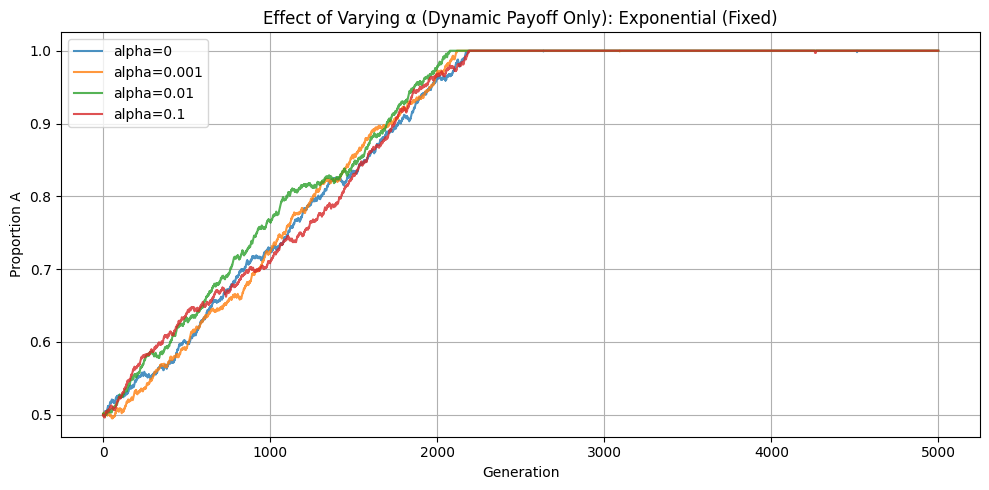

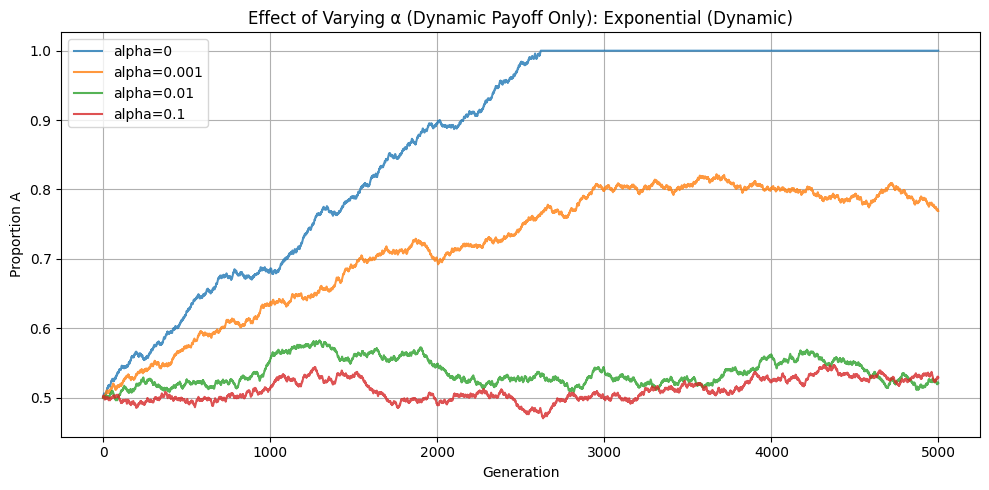

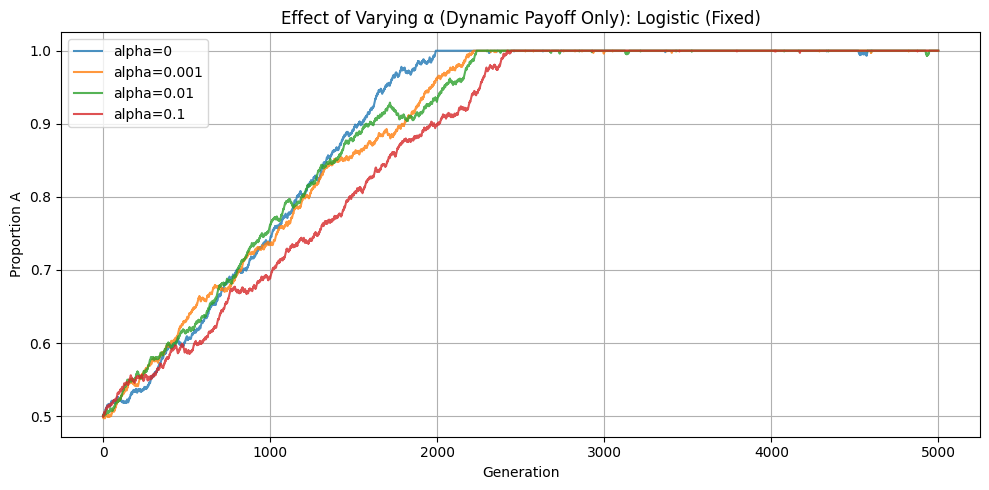

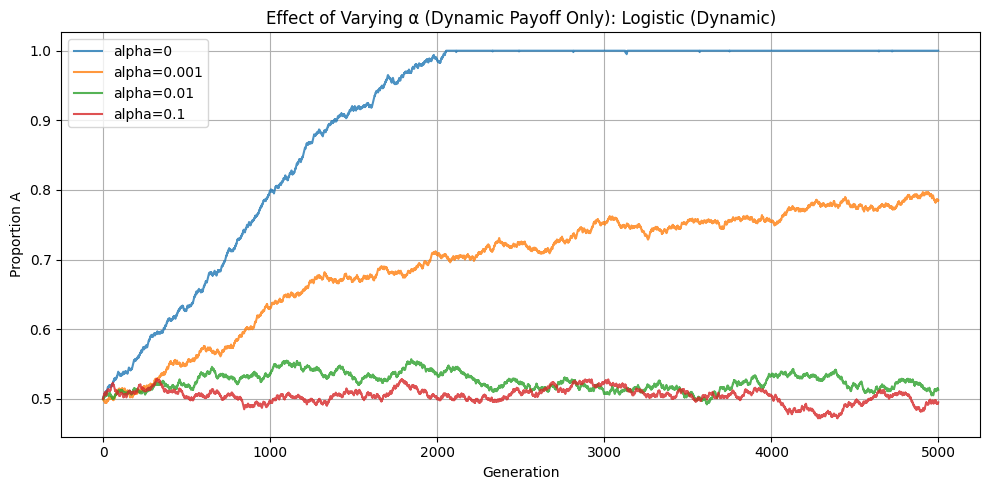

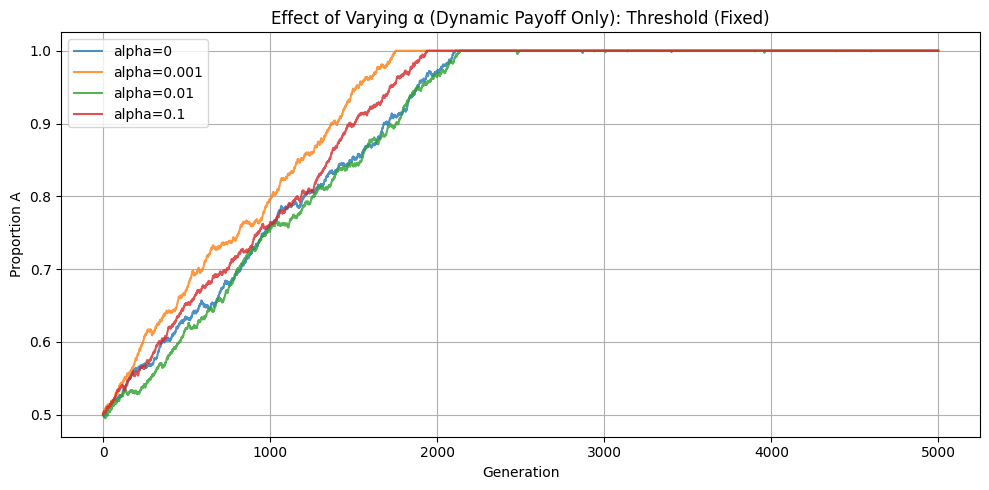

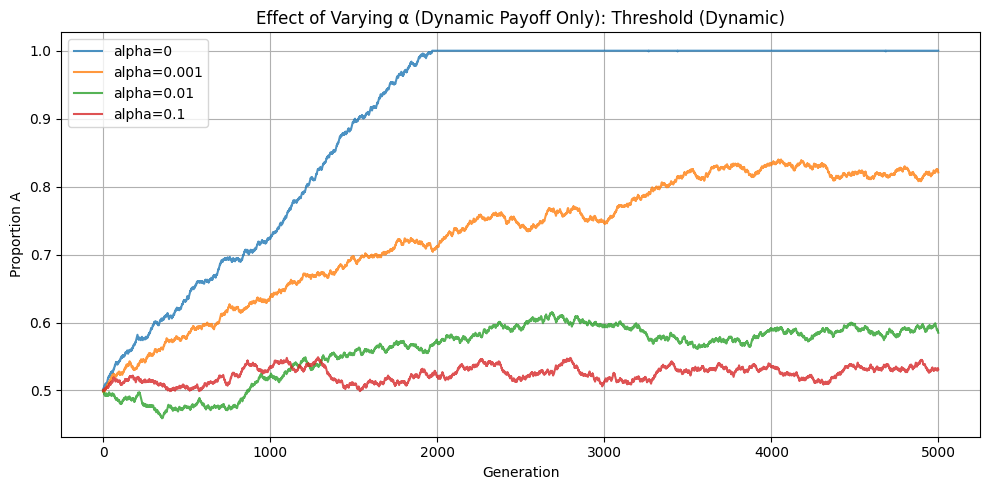

In [ ]:
# @title
import matplotlib.pyplot as plt

# Utility function to extract label and plot a group of simulation histories
def plot_simulation_group(sim_data, key, label_param, title):
    grouped = {}
    for entry in sim_data:
        model = entry["model"]
        label = entry[label_param]
        if model not in grouped:
            grouped[model] = []
        grouped[model].append((label, entry["history"]))

    for model_name, runs in grouped.items():
        plt.figure(figsize=(10, 5))
        for label, history in sorted(runs, key=lambda x: x[0]):
            plt.plot(history, label=f"{label_param}={label}", alpha=0.8)
        plt.title(f"{title}: {model_name}")
        plt.xlabel("Generation")
        plt.ylabel("Proportion A")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Plot groups based on each variation
plot_simulation_group(simulated_variants_fixed_N["vary_mu_0"], "vary_mu_0", "mu_0", "Effect of Varying μ₀")
plot_simulation_group(simulated_variants_fixed_N["vary_p_A_init"], "vary_p_A_init", "p_A_init", "Effect of Varying Initial pₐ(0)")
plot_simulation_group(simulated_variants_fixed_N["vary_beta"], "vary_beta", "beta", "Effect of Varying β")
plot_simulation_group(simulated_variants_fixed_N["vary_alpha"], "vary_alpha", "alpha", "Effect of Varying α (Dynamic Payoff Only)")


###Confidence Intervals for varying N- Exponential

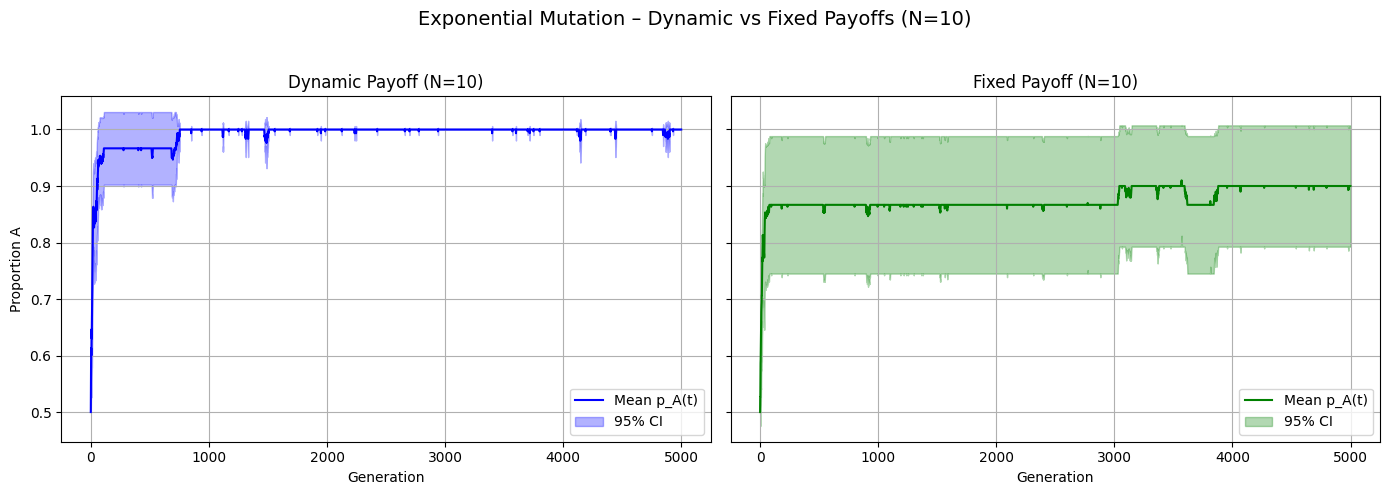

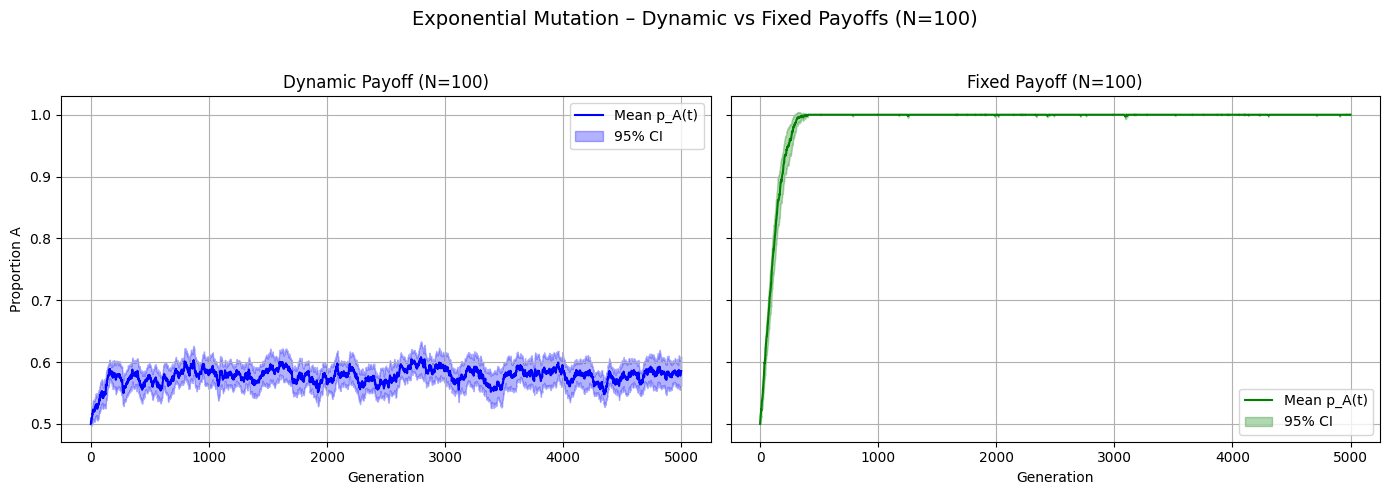

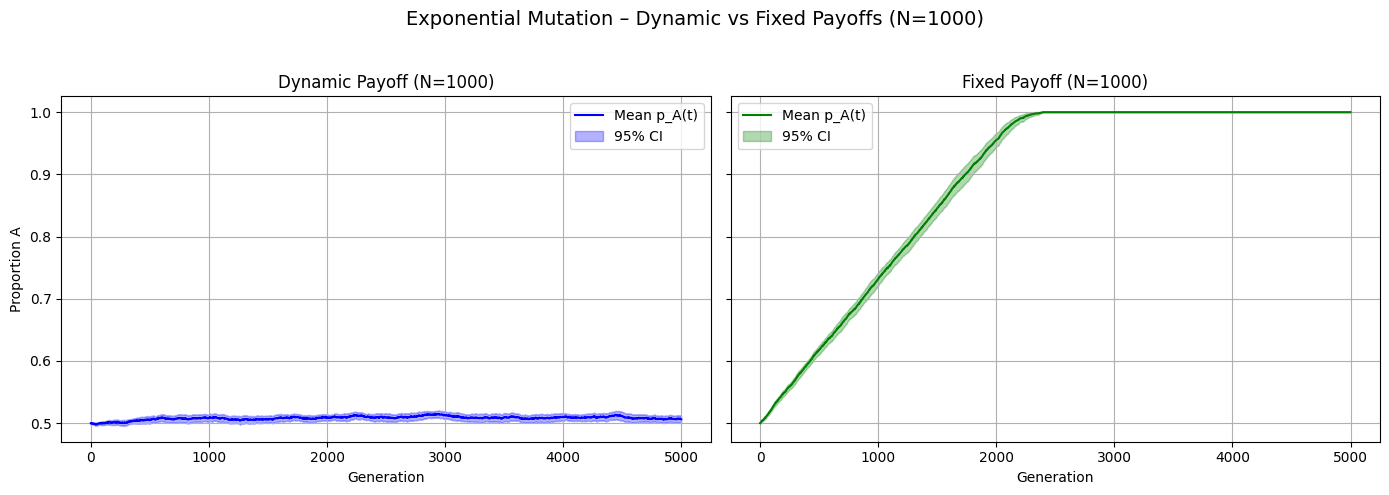

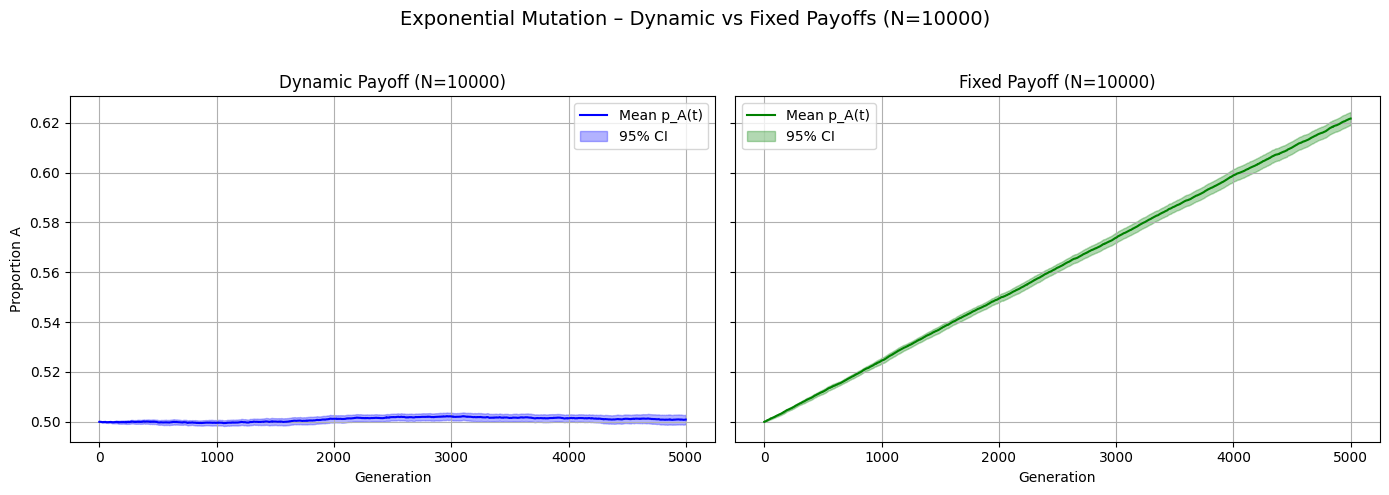

In [ ]:
# @title
def run_with_confidence_intervals(model_func, runs=30, N=1000, generations=5000, **kwargs):
    all_runs = []
    for _ in range(runs):
        history = model_func(N=N, generations=generations, **kwargs)
        all_runs.append(history)
    all_runs = np.array(all_runs)
    mean_p_A = np.mean(all_runs, axis=0)
    std_p_A = np.std(all_runs, axis=0)
    ci95 = 1.96 * std_p_A / np.sqrt(runs)
    return mean_p_A, ci95

# Now re-run the side-by-side CI comparison plots
ci_compare_dynamic_vs_fixed = {}

for N in population_sizes:
    mean_dyn, ci_dyn = run_with_confidence_intervals(wrapped_simulate_exponential_dynamic, N=N, runs=30)
    mean_fix, ci_fix = run_with_confidence_intervals(wrapped_simulate_exponential_fixed, N=N, runs=30)
    ci_compare_dynamic_vs_fixed[N] = {
        "dynamic": (mean_dyn, ci_dyn),
        "fixed": (mean_fix, ci_fix)
    }

# Plot side-by-side for each N
for N, data in ci_compare_dynamic_vs_fixed.items():
    mean_dyn, ci_dyn = data["dynamic"]
    mean_fix, ci_fix = data["fixed"]

    fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    # Dynamic Payoff
    axs[0].plot(mean_dyn, label="Mean p_A(t)", color='blue')
    axs[0].fill_between(range(len(mean_dyn)), mean_dyn - ci_dyn, mean_dyn + ci_dyn, color='blue', alpha=0.3, label="95% CI")
    axs[0].set_title(f"Dynamic Payoff (N={N})")
    axs[0].set_xlabel("Generation")
    axs[0].set_ylabel("Proportion A")
    axs[0].grid(True)
    axs[0].legend()

    # Fixed Payoff
    axs[1].plot(mean_fix, label="Mean p_A(t)", color='green')
    axs[1].fill_between(range(len(mean_fix)), mean_fix - ci_fix, mean_fix + ci_fix, color='green', alpha=0.3, label="95% CI")
    axs[1].set_title(f"Fixed Payoff (N={N})")
    axs[1].set_xlabel("Generation")
    axs[1].grid(True)
    axs[1].legend()

    plt.suptitle(f"Exponential Mutation – Dynamic vs Fixed Payoffs (N={N})", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


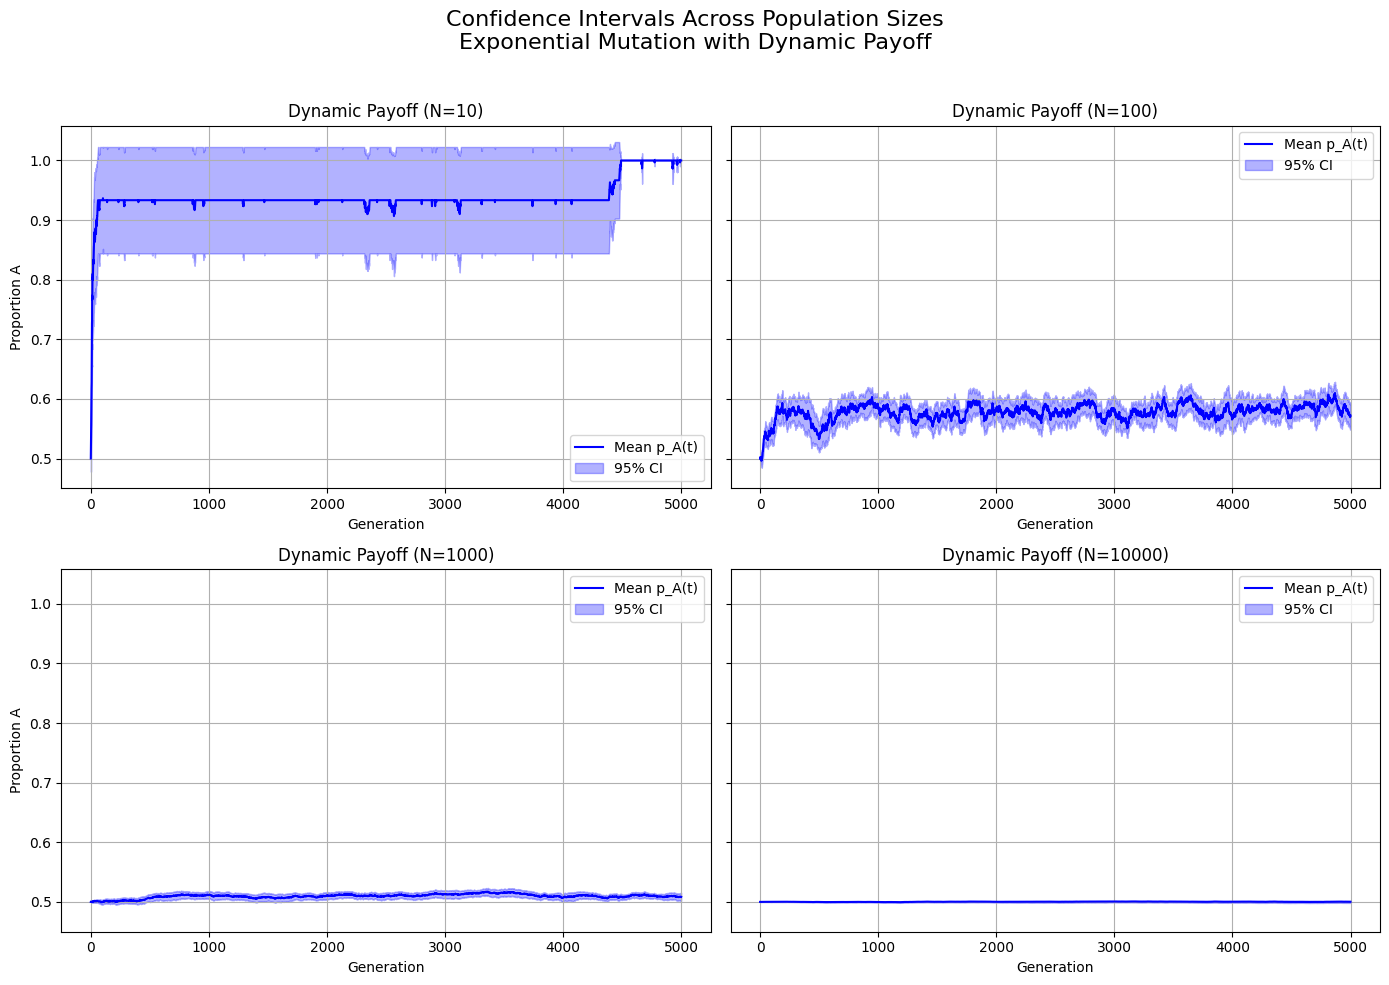

In [ ]:
# @title
# Re-import necessary libraries after code execution environment reset
import numpy as np
import matplotlib.pyplot as plt

# Re-define entropy (used earlier in notebook)
def entropy(p_A):
    p_B = 1 - p_A
    with np.errstate(divide='ignore', invalid='ignore'):
        h = -p_A * np.log(p_A) - p_B * np.log(p_B)
        h = np.nan_to_num(h)
    return h

# Re-define the dynamic exponential mutation model with crowding
def wrapped_simulate_exponential_dynamic(N=100, generations=5000, p_A_init=0.5, mu_0=0.05, beta=5, alpha=0.05, **kwargs):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    history = []
    for _ in range(generations):
        p_A = i / N
        p_B = 1 - p_A
        a_i = a / (1 + alpha * i) if i > 0 else a
        d_i = d / (1 + alpha * (N - i)) if (N - i) > 0 else d
        f_A = (a_i * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d_i * (N - i - 1)) / (N - i) if i < N else 0
        mu_AB = mu_0 * np.exp(-beta * p_A)
        mu_BA = mu_0 * np.exp(-beta * p_B)
        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5
        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else ("A" if np.random.rand() < mu_BA else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0
        history.append(p_A)
    return history

# Function to compute mean and CI from multiple runs
def run_with_confidence_intervals(model_func, runs=30, N=1000, generations=5000, **kwargs):
    all_runs = []
    for _ in range(runs):
        history = model_func(N=N, generations=generations, **kwargs)
        all_runs.append(history)
    all_runs = np.array(all_runs)
    mean_p_A = np.mean(all_runs, axis=0)
    std_p_A = np.std(all_runs, axis=0)
    ci95 = 1.96 * std_p_A / np.sqrt(runs)
    return mean_p_A, ci95

# Now create 2x2 CI plot for selected N values
selected_Ns = [10, 100, 1000, 10000]
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

for idx, N in enumerate(selected_Ns):
    mean_dyn, ci_dyn = run_with_confidence_intervals(wrapped_simulate_exponential_dynamic, N=N, runs=30)
    ax = axs[idx // 2, idx % 2]
    ax.plot(mean_dyn, label="Mean p_A(t)", color='blue')
    ax.fill_between(range(len(mean_dyn)), mean_dyn - ci_dyn, mean_dyn + ci_dyn, color='blue', alpha=0.3, label="95% CI")
    ax.set_title(f"Dynamic Payoff (N={N})")
    ax.set_xlabel("Generation")
    if idx % 2 == 0:
        ax.set_ylabel("Proportion A")
    ax.legend()
    ax.grid(True)

plt.suptitle("Confidence Intervals Across Population Sizes\nExponential Mutation with Dynamic Payoff", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


###Confidence Intervals for Varying N- Logisitc

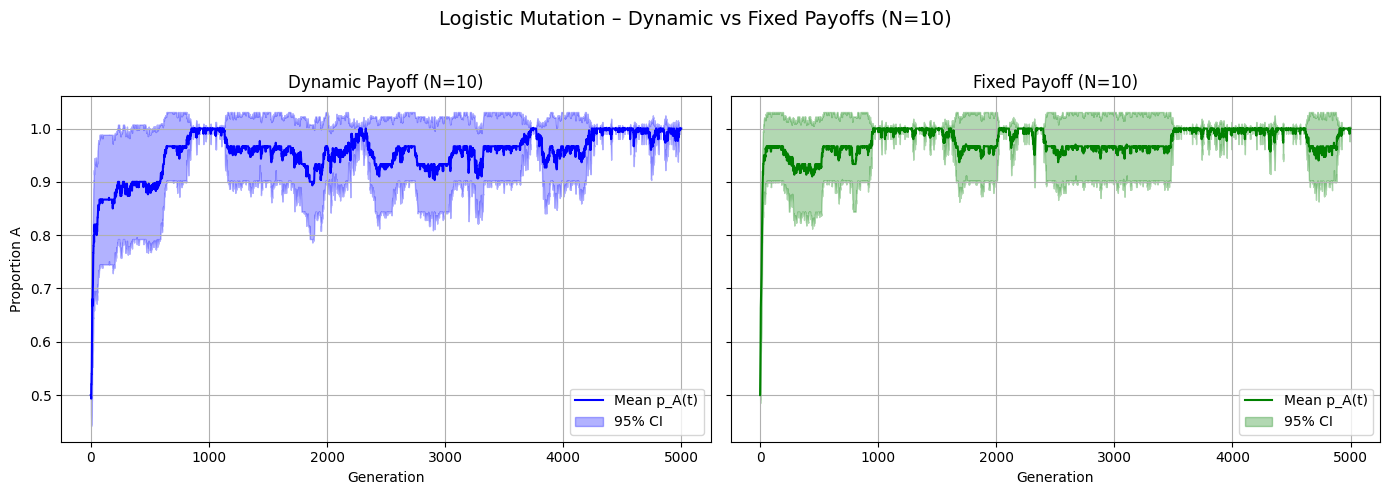

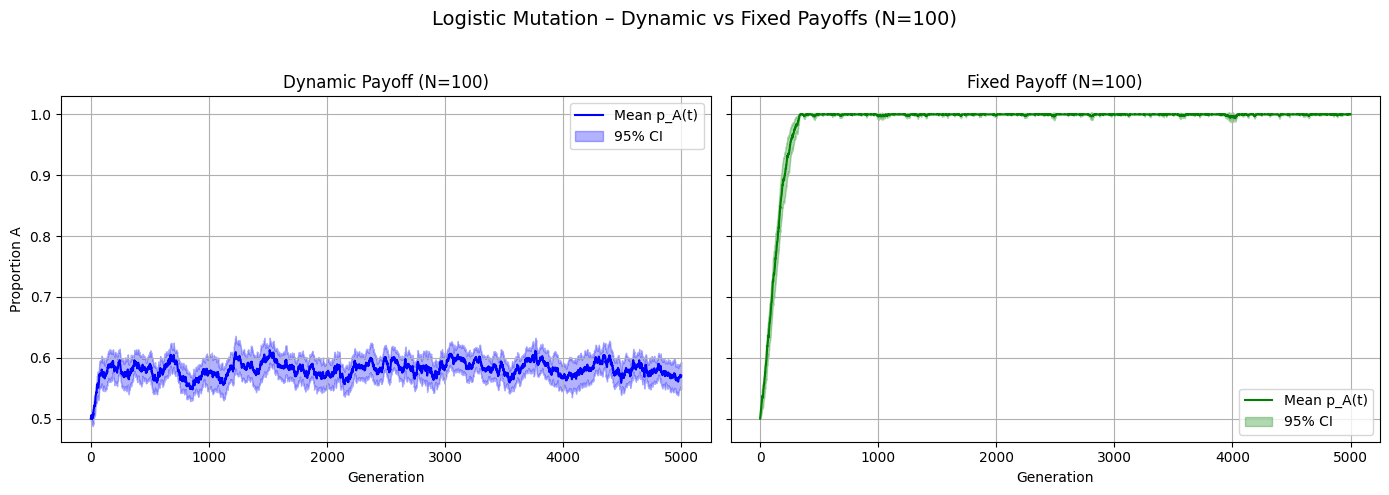

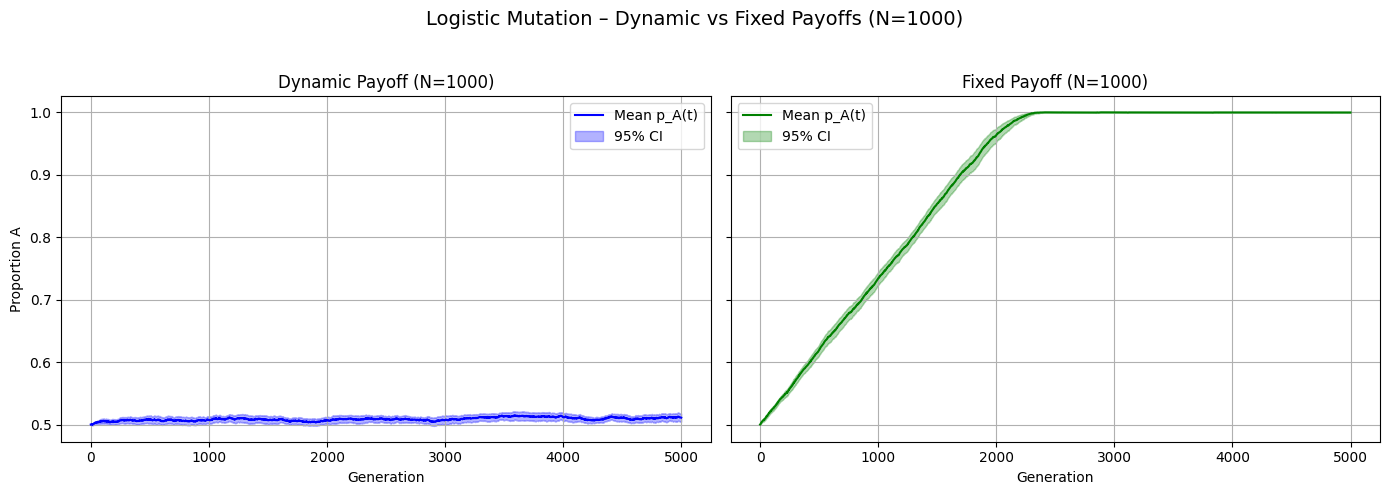

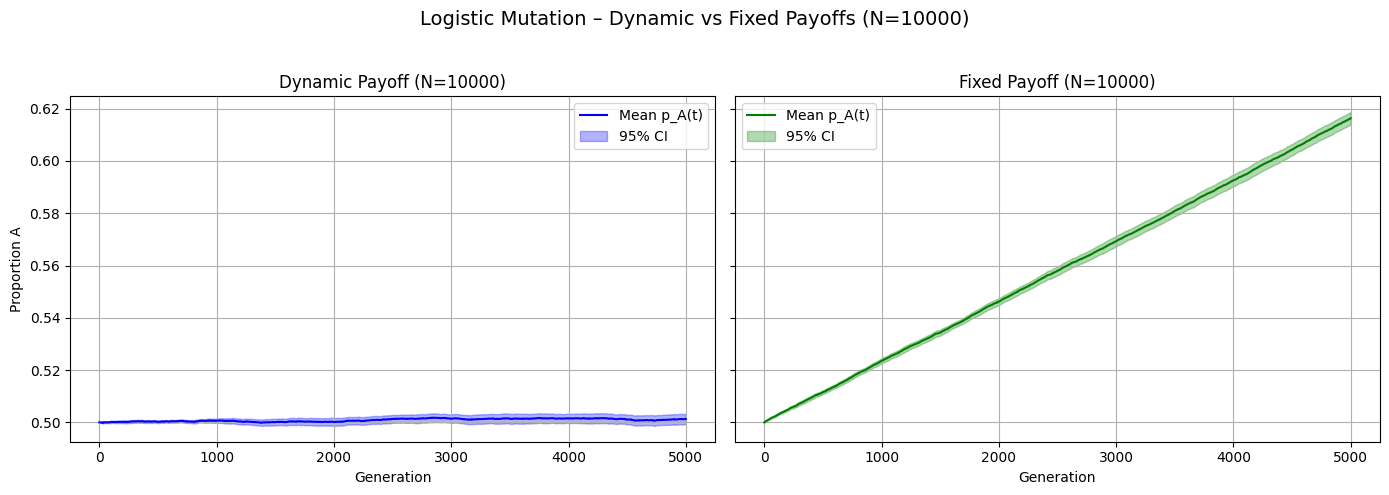

In [ ]:
# @title
def run_with_confidence_intervals(model_func, runs=30, N=1000, generations=5000, **kwargs):
    all_runs = []
    for _ in range(runs):
        history = model_func(N=N, generations=generations, **kwargs)
        all_runs.append(history)
    all_runs = np.array(all_runs)
    mean_p_A = np.mean(all_runs, axis=0)
    std_p_A = np.std(all_runs, axis=0)
    ci95 = 1.96 * std_p_A / np.sqrt(runs)
    return mean_p_A, ci95

# Now re-run the side-by-side CI comparison plots
ci_compare_dynamic_vs_fixed = {}

for N in population_sizes:
    mean_dyn, ci_dyn = run_with_confidence_intervals(wrapped_simulate_logistic_dynamic, N=N, runs=30)
    mean_fix, ci_fix = run_with_confidence_intervals(wrapped_simulate_logistic_fixed, N=N, runs=30)
    ci_compare_dynamic_vs_fixed[N] = {
        "dynamic": (mean_dyn, ci_dyn),
        "fixed": (mean_fix, ci_fix)
    }

# Plot side-by-side for each N
for N, data in ci_compare_dynamic_vs_fixed.items():
    mean_dyn, ci_dyn = data["dynamic"]
    mean_fix, ci_fix = data["fixed"]

    fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    # Dynamic Payoff
    axs[0].plot(mean_dyn, label="Mean p_A(t)", color='blue')
    axs[0].fill_between(range(len(mean_dyn)), mean_dyn - ci_dyn, mean_dyn + ci_dyn, color='blue', alpha=0.3, label="95% CI")
    axs[0].set_title(f"Dynamic Payoff (N={N})")
    axs[0].set_xlabel("Generation")
    axs[0].set_ylabel("Proportion A")
    axs[0].grid(True)
    axs[0].legend()

    # Fixed Payoff
    axs[1].plot(mean_fix, label="Mean p_A(t)", color='green')
    axs[1].fill_between(range(len(mean_fix)), mean_fix - ci_fix, mean_fix + ci_fix, color='green', alpha=0.3, label="95% CI")
    axs[1].set_title(f"Fixed Payoff (N={N})")
    axs[1].set_xlabel("Generation")
    axs[1].grid(True)
    axs[1].legend()

    plt.suptitle(f"Logistic Mutation – Dynamic vs Fixed Payoffs (N={N})", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

###Confidence Intervals for Varying N-Threshold

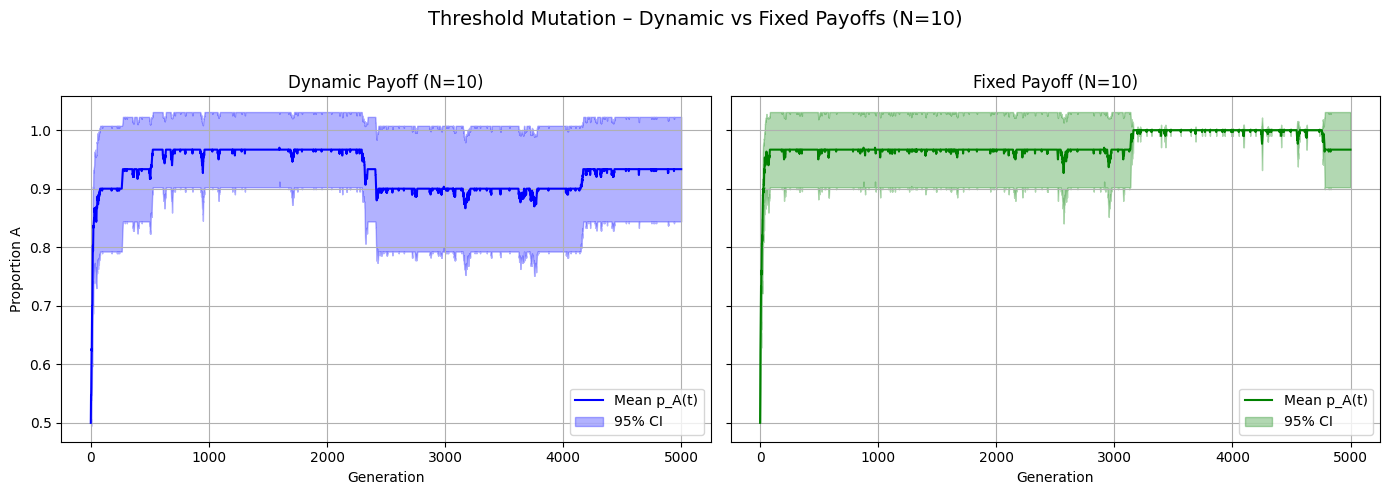

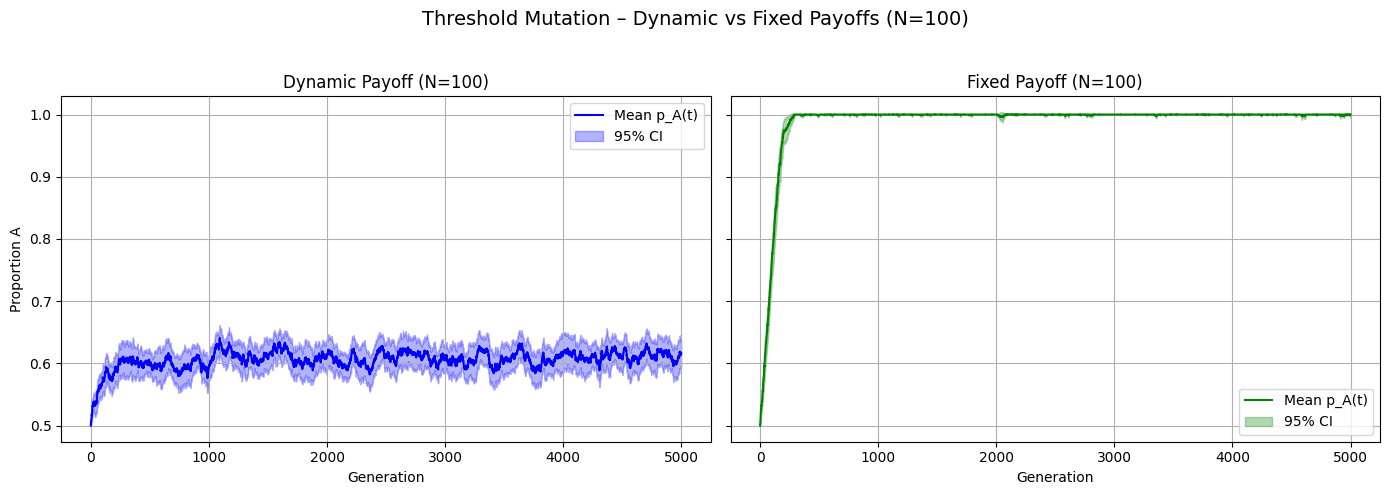

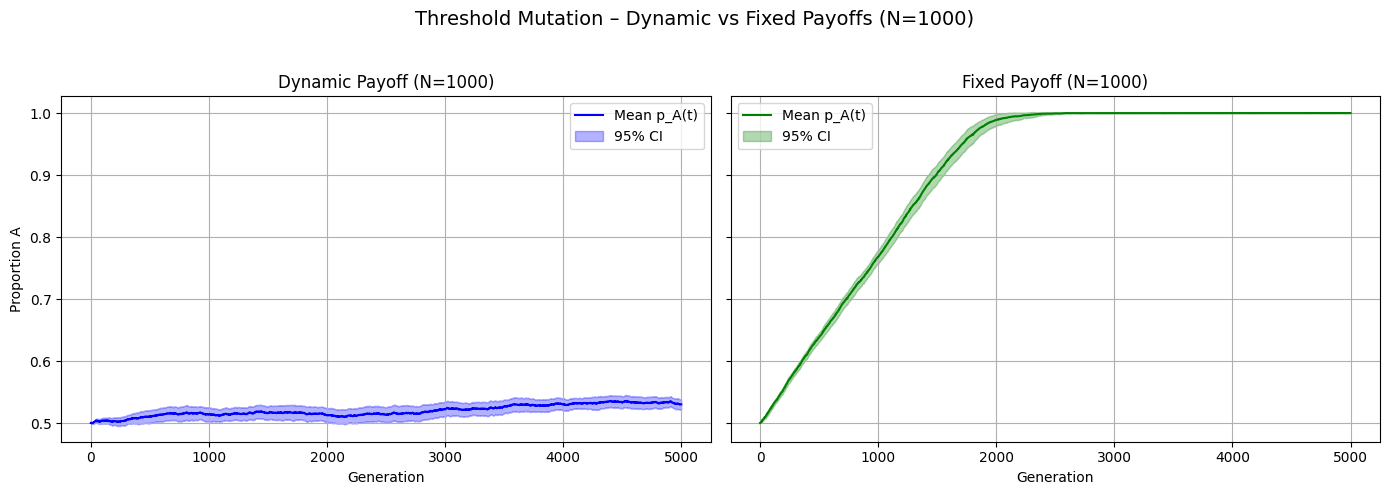

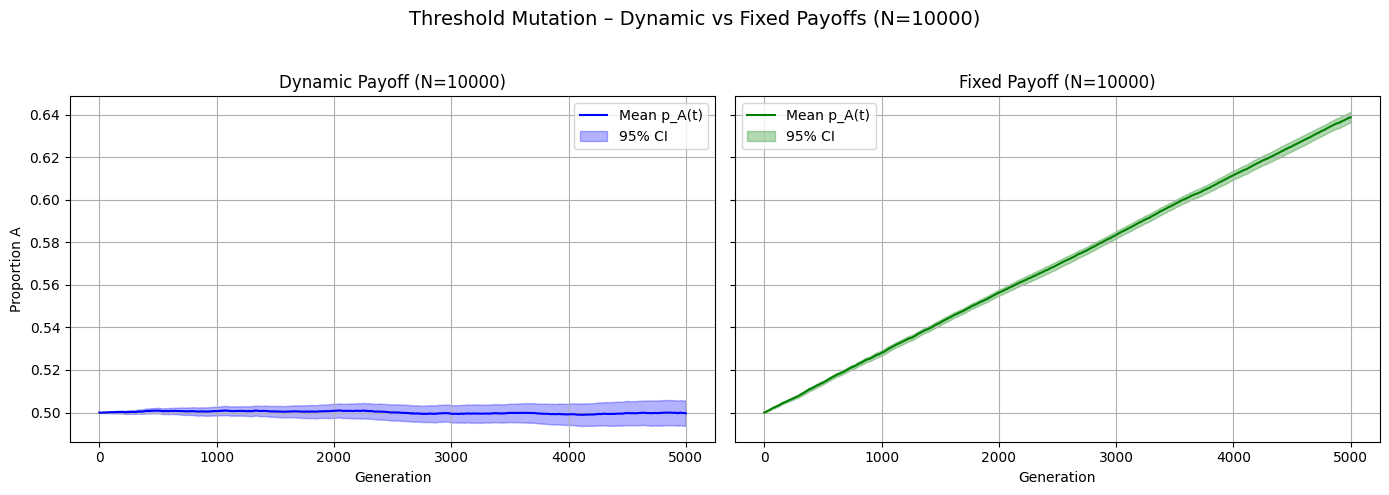

In [ ]:
# @title
def run_with_confidence_intervals(model_func, runs=30, N=1000, generations=5000, **kwargs):
    all_runs = []
    for _ in range(runs):
        history = model_func(N=N, generations=generations, **kwargs)
        all_runs.append(history)
    all_runs = np.array(all_runs)
    mean_p_A = np.mean(all_runs, axis=0)
    std_p_A = np.std(all_runs, axis=0)
    ci95 = 1.96 * std_p_A / np.sqrt(runs)
    return mean_p_A, ci95

# Now re-run the side-by-side CI comparison plots
ci_compare_dynamic_vs_fixed = {}

for N in population_sizes:
    mean_dyn, ci_dyn = run_with_confidence_intervals(wrapped_simulate_threshold_dynamic, N=N, runs=30)
    mean_fix, ci_fix = run_with_confidence_intervals(wrapped_simulate_threshold_fixed, N=N, runs=30)
    ci_compare_dynamic_vs_fixed[N] = {
        "dynamic": (mean_dyn, ci_dyn),
        "fixed": (mean_fix, ci_fix)
    }

# Plot side-by-side for each N
for N, data in ci_compare_dynamic_vs_fixed.items():
    mean_dyn, ci_dyn = data["dynamic"]
    mean_fix, ci_fix = data["fixed"]

    fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    # Dynamic Payoff
    axs[0].plot(mean_dyn, label="Mean p_A(t)", color='blue')
    axs[0].fill_between(range(len(mean_dyn)), mean_dyn - ci_dyn, mean_dyn + ci_dyn, color='blue', alpha=0.3, label="95% CI")
    axs[0].set_title(f"Dynamic Payoff (N={N})")
    axs[0].set_xlabel("Generation")
    axs[0].set_ylabel("Proportion A")
    axs[0].grid(True)
    axs[0].legend()

    # Fixed Payoff
    axs[1].plot(mean_fix, label="Mean p_A(t)", color='green')
    axs[1].fill_between(range(len(mean_fix)), mean_fix - ci_fix, mean_fix + ci_fix, color='green', alpha=0.3, label="95% CI")
    axs[1].set_title(f"Fixed Payoff (N={N})")
    axs[1].set_xlabel("Generation")
    axs[1].grid(True)
    axs[1].legend()

    plt.suptitle(f"Threshold Mutation – Dynamic vs Fixed Payoffs (N={N})", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

###Connfidence Intervals: N=1000, Varying other parameters

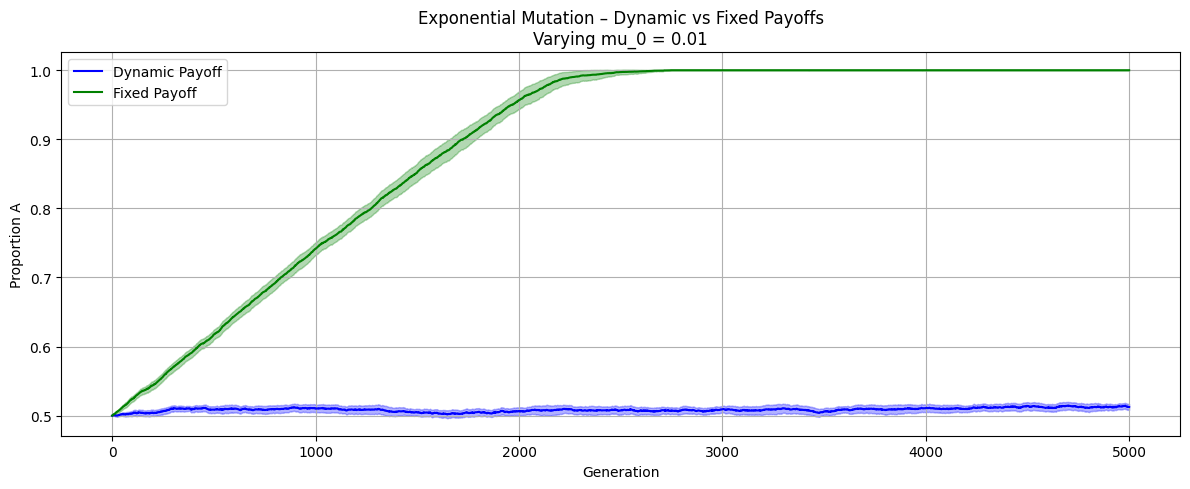

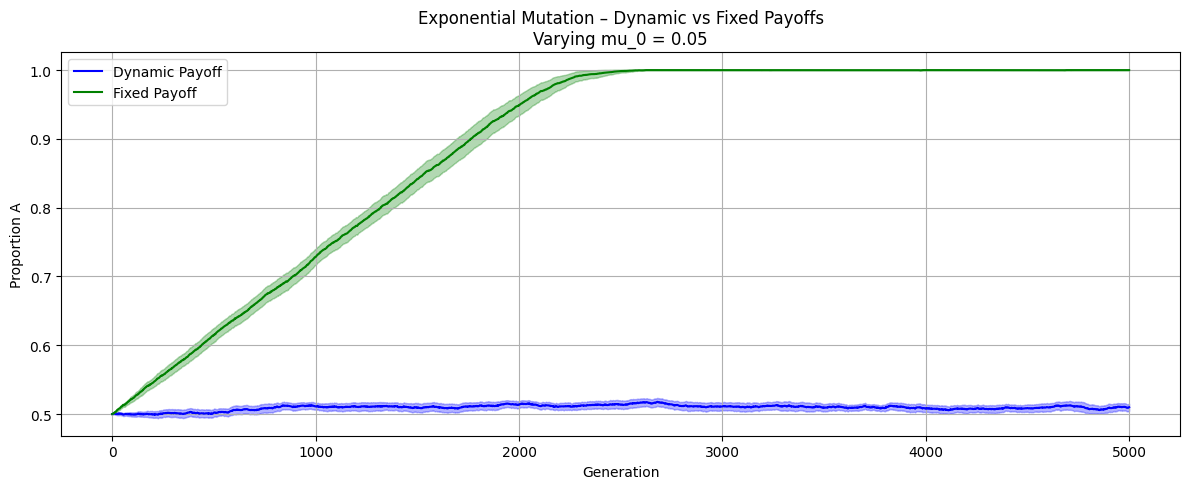

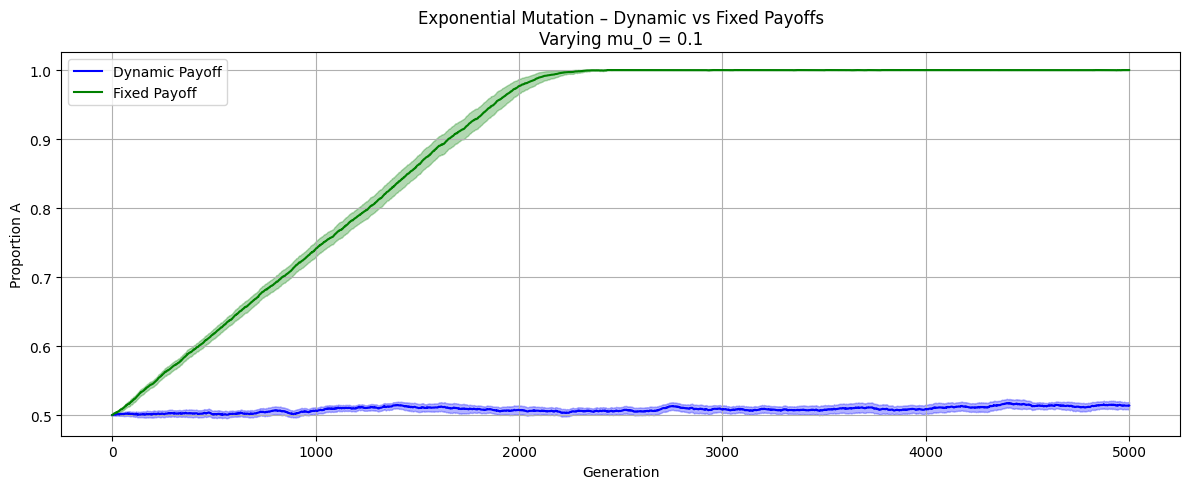

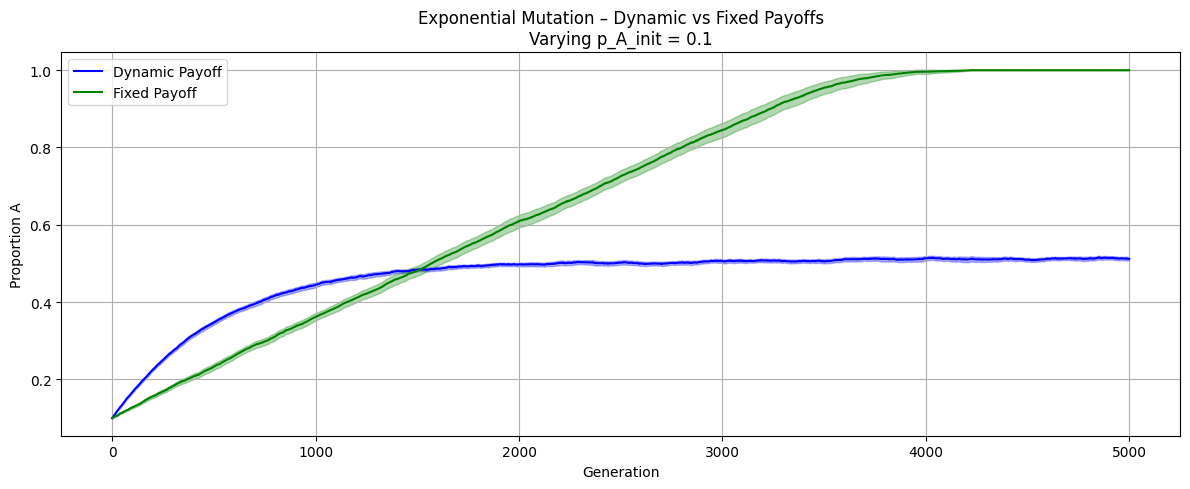

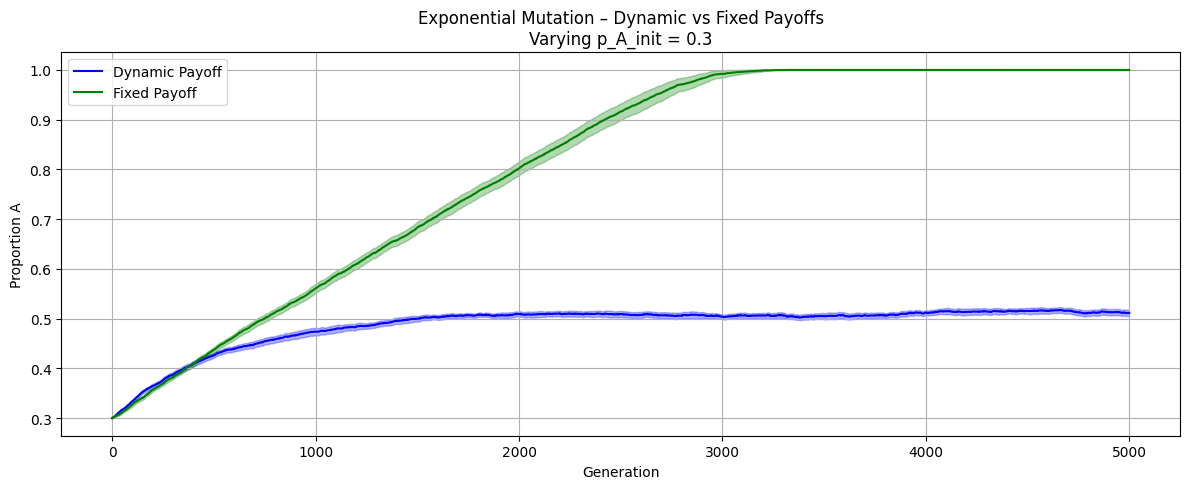

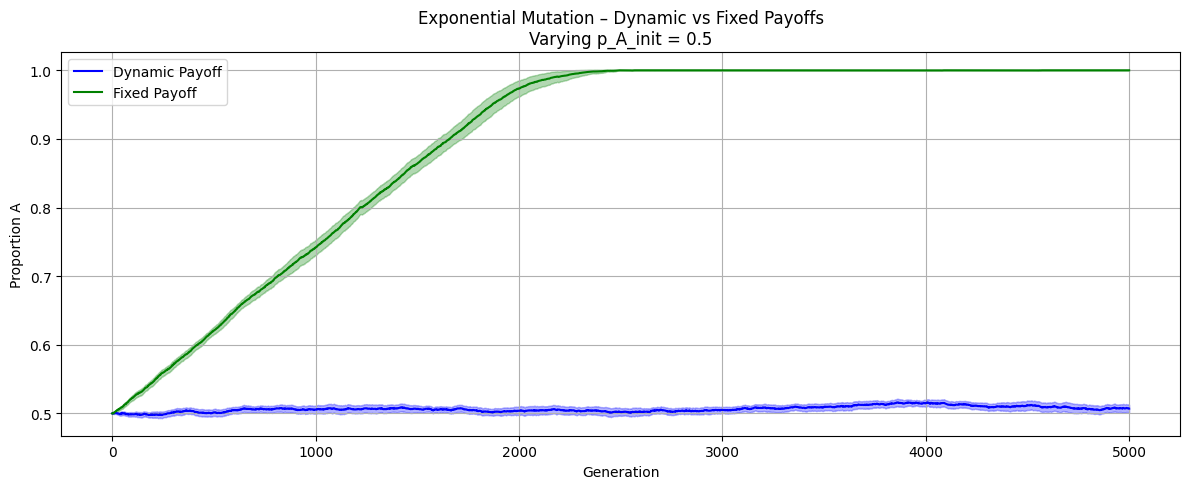

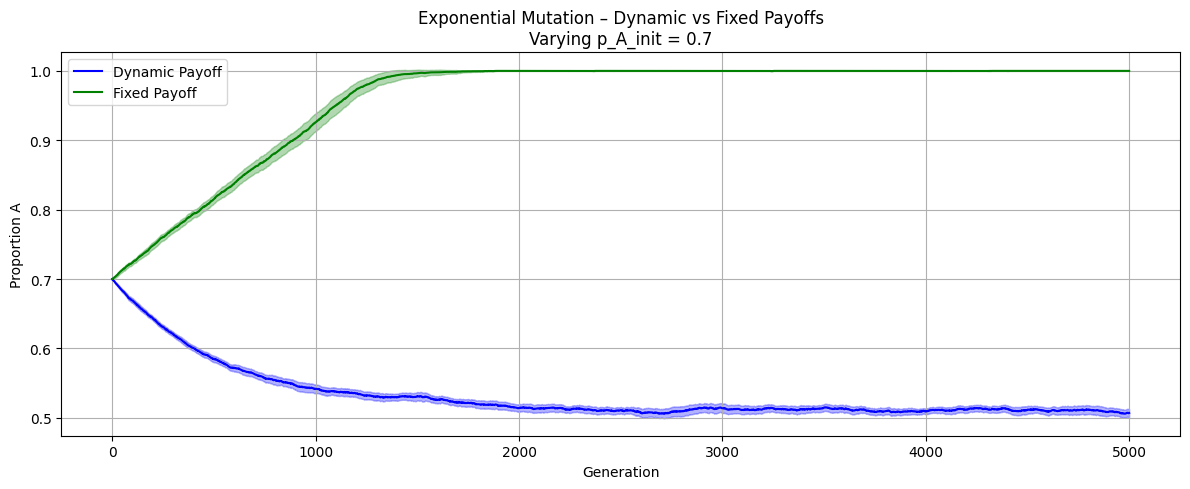

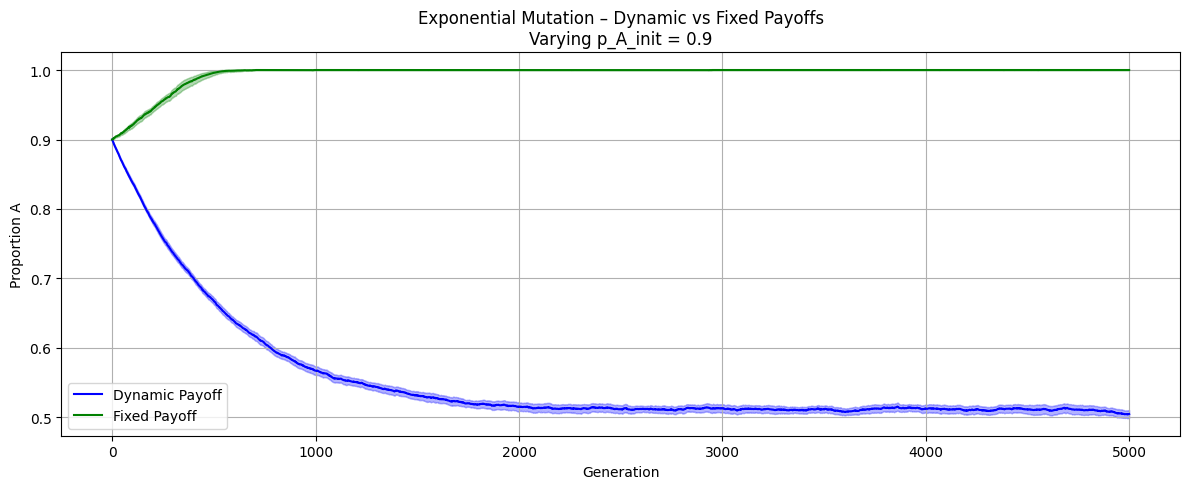

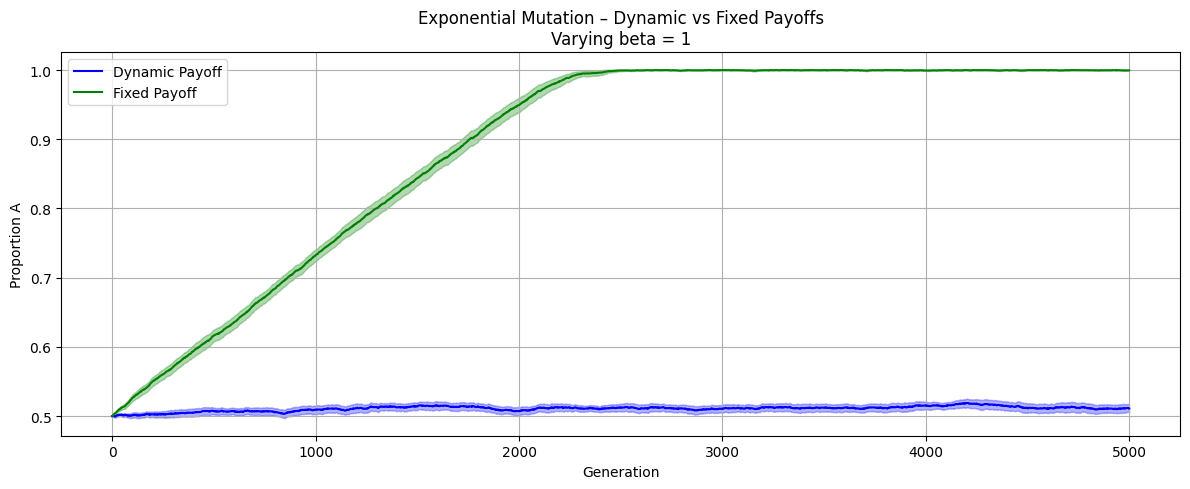

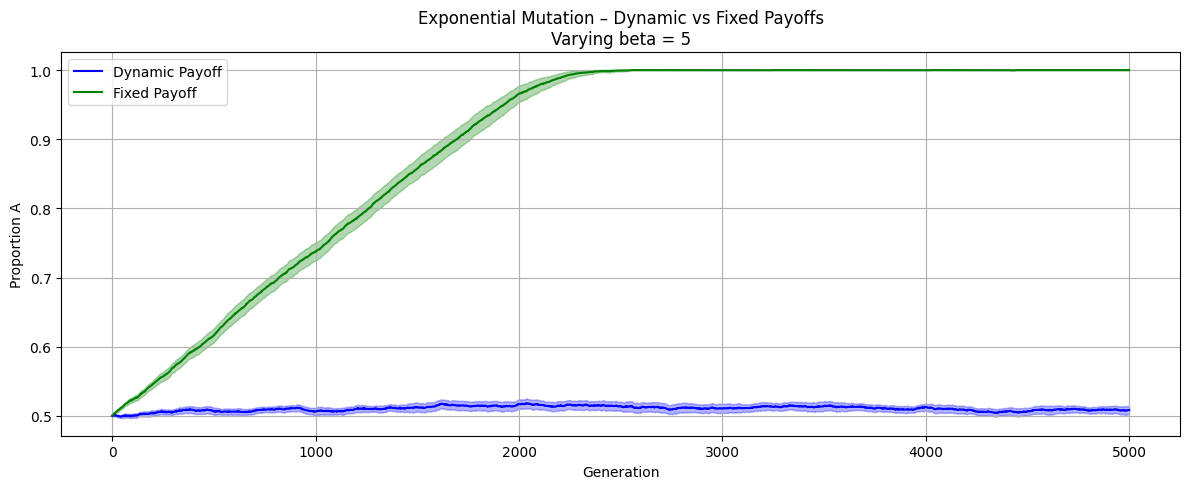

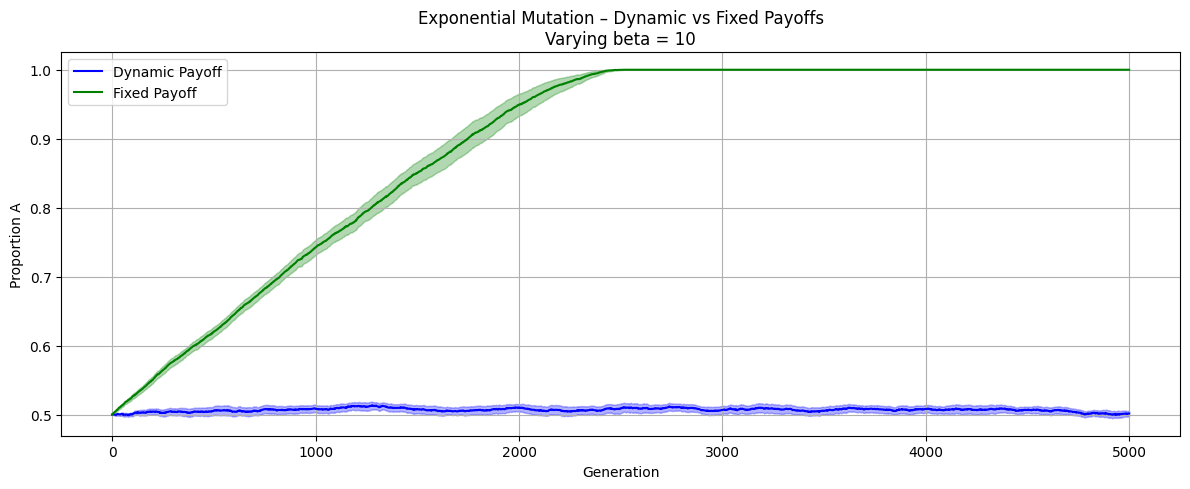

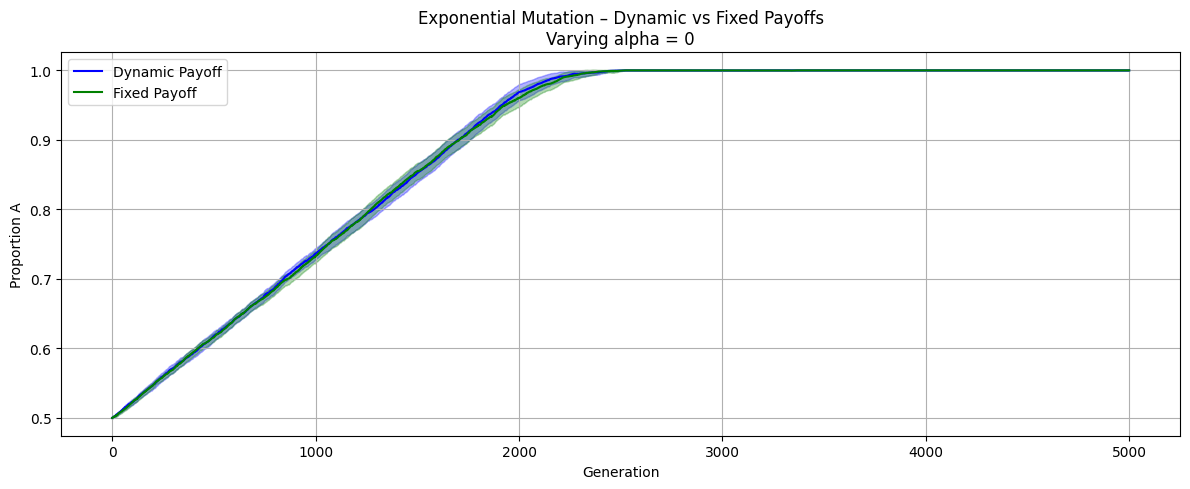

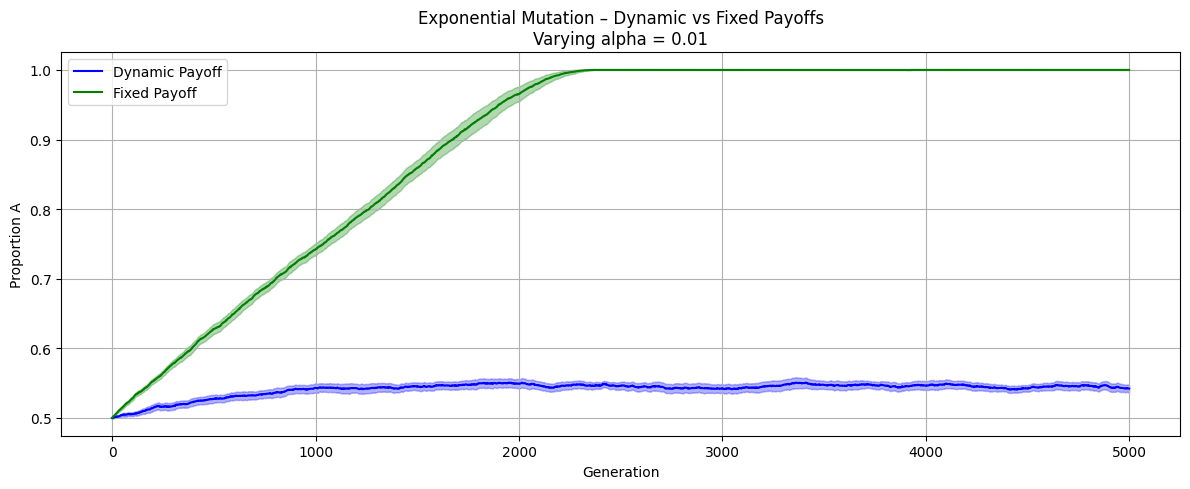

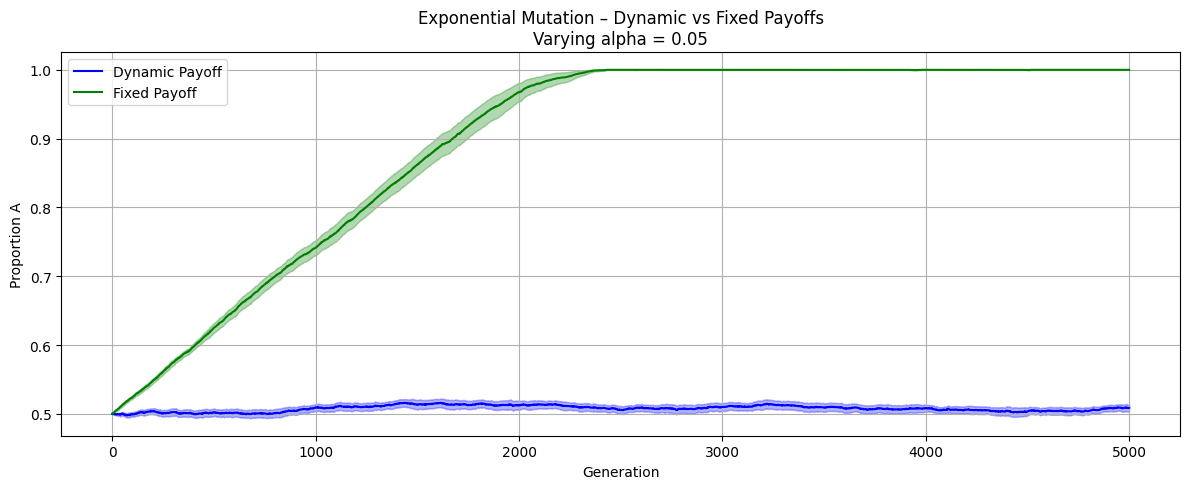

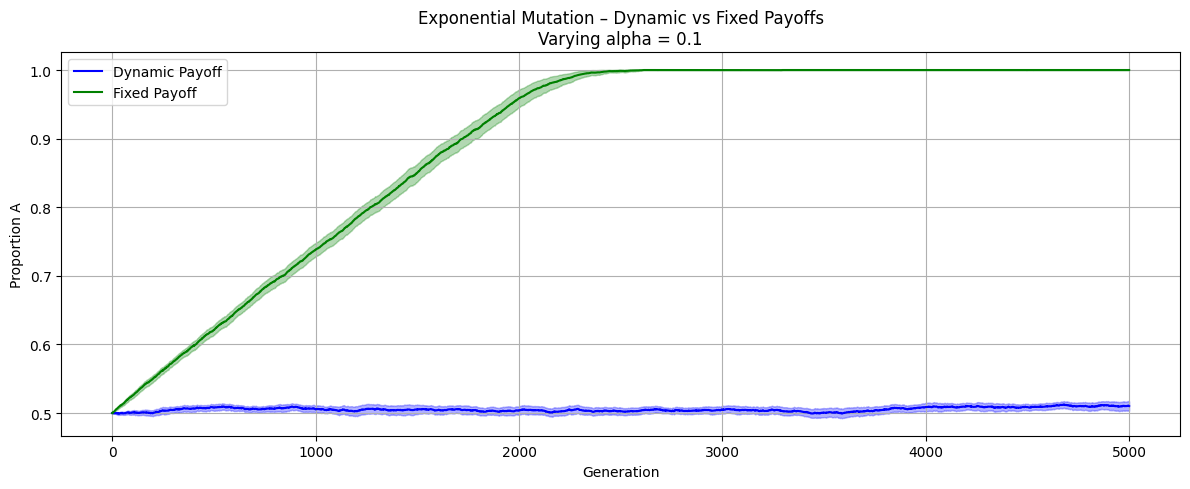

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# ====== ENTROPY FUNCTION ======
def entropy(p_A):
    p_B = 1 - p_A
    with np.errstate(divide='ignore', invalid='ignore'):
        h = -p_A * np.log(p_A) - p_B * np.log(p_B)
        h = np.nan_to_num(h)
    return h

# ====== MODEL DEFINITIONS ======
def wrapped_simulate_exponential_fixed(N=100, generations=5000, p_A_init=0.5, mu_0=0.05, beta=5, **kwargs):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    history = []
    for _ in range(generations):
        p_A = i / N
        p_B = 1 - p_A
        f_A = (a * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d * (N - i - 1)) / (N - i) if i < N else 0
        mu_AB = mu_0 * np.exp(-beta * p_A)
        mu_BA = mu_0 * np.exp(-beta * p_B)
        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5
        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else ("A" if np.random.rand() < mu_BA else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0
        history.append(p_A)
    return history

def wrapped_simulate_exponential_dynamic(N=100, generations=5000, p_A_init=0.5, mu_0=0.05, beta=5, alpha=0.05, **kwargs):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    history = []
    for _ in range(generations):
        p_A = i / N
        p_B = 1 - p_A
        a_i = a / (1 + alpha * i) if i > 0 else a
        d_i = d / (1 + alpha * (N - i)) if (N - i) > 0 else d
        f_A = (a_i * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d_i * (N - i - 1)) / (N - i) if i < N else 0
        mu_AB = mu_0 * np.exp(-beta * p_A)
        mu_BA = mu_0 * np.exp(-beta * p_B)
        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5
        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else ("A" if np.random.rand() < mu_BA else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0
        history.append(p_A)
    return history

# ====== CONFIDENCE INTERVAL FUNCTION ======
def run_with_confidence_intervals(model_func, runs=30, N=1000, generations=5000, **kwargs):
    all_runs = []
    for _ in range(runs):
        history = model_func(N=N, generations=generations, **kwargs)
        all_runs.append(history)
    all_runs = np.array(all_runs)
    mean_p_A = np.mean(all_runs, axis=0)
    std_p_A = np.std(all_runs, axis=0)
    ci95 = 1.96 * std_p_A / np.sqrt(runs)
    return mean_p_A, ci95

# ====== PLOTTING FUNCTION (OVERLAYS) ======
def run_and_plot_ci_overlay(param_name, param_values, dynamic_func, fixed_func, shared_kwargs, runs=30, generations=5000):
    for param_val in param_values:
        kwargs = shared_kwargs.copy()
        kwargs[param_name] = param_val

        mean_dyn, ci_dyn = run_with_confidence_intervals(dynamic_func, runs=runs, generations=generations, **kwargs)
        mean_fix, ci_fix = run_with_confidence_intervals(fixed_func, runs=runs, generations=generations, **kwargs)

        plt.figure(figsize=(12, 5))
        plt.plot(mean_dyn, label="Dynamic Payoff", color='blue')
        plt.fill_between(range(len(mean_dyn)), mean_dyn - ci_dyn, mean_dyn + ci_dyn, color='blue', alpha=0.3)

        plt.plot(mean_fix, label="Fixed Payoff", color='green')
        plt.fill_between(range(len(mean_fix)), mean_fix - ci_fix, mean_fix + ci_fix, color='green', alpha=0.3)

        plt.title(f"Exponential Mutation – Dynamic vs Fixed Payoffs\nVarying {param_name} = {param_val}")
        plt.xlabel("Generation")
        plt.ylabel("Proportion A")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# ====== SHARED PARAMETERS ======
shared_kwargs = {
    "N": 1000,
    "mu_0": 0.05,
    "p_A_init": 0.5,
    "beta": 5,
    "alpha": 0.05
}

# ====== PARAMETER VARIATIONS ======
run_and_plot_ci_overlay("mu_0", [0.01, 0.05, 0.10], wrapped_simulate_exponential_dynamic, wrapped_simulate_exponential_fixed, shared_kwargs)
run_and_plot_ci_overlay("p_A_init", [0.1, 0.3, 0.5, 0.7, 0.9], wrapped_simulate_exponential_dynamic, wrapped_simulate_exponential_fixed, shared_kwargs)
run_and_plot_ci_overlay("beta", [1, 5, 10], wrapped_simulate_exponential_dynamic, wrapped_simulate_exponential_fixed, shared_kwargs)
run_and_plot_ci_overlay("alpha", [0, 0.01, 0.05, 0.10], wrapped_simulate_exponential_dynamic, wrapped_simulate_exponential_fixed, shared_kwargs)



### All models, Fixed vs Dynamic mutation over time

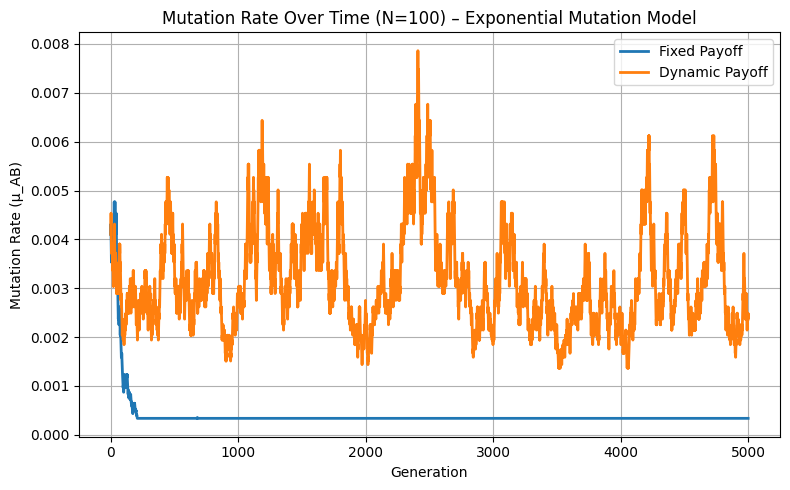

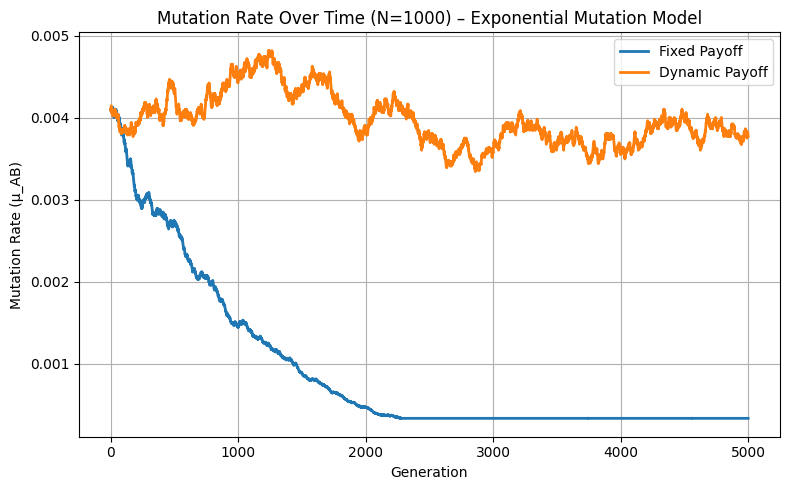

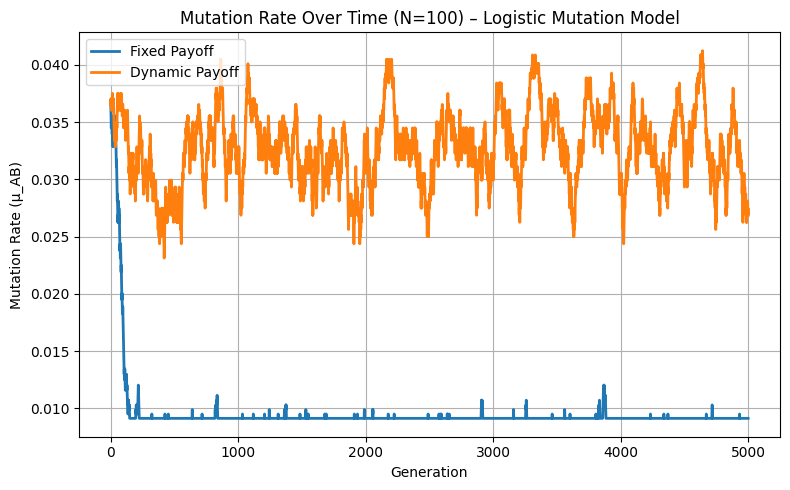

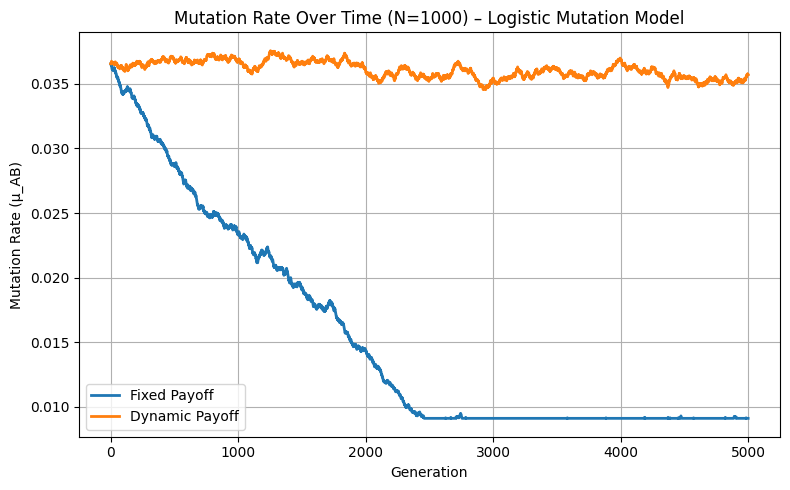

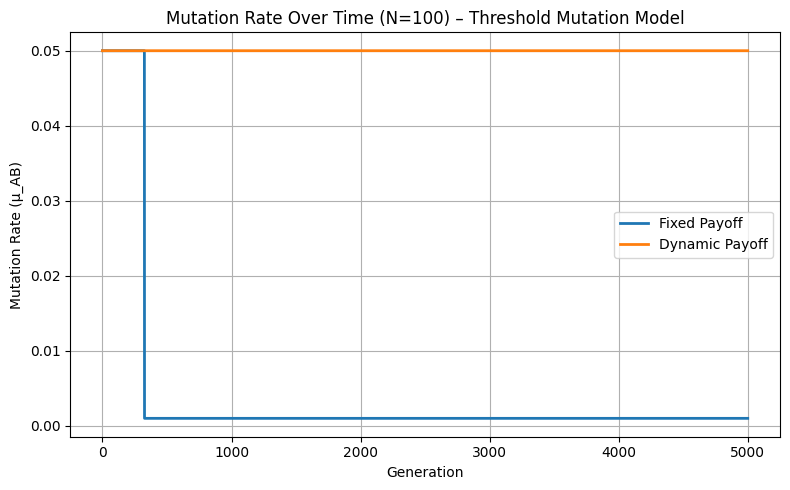

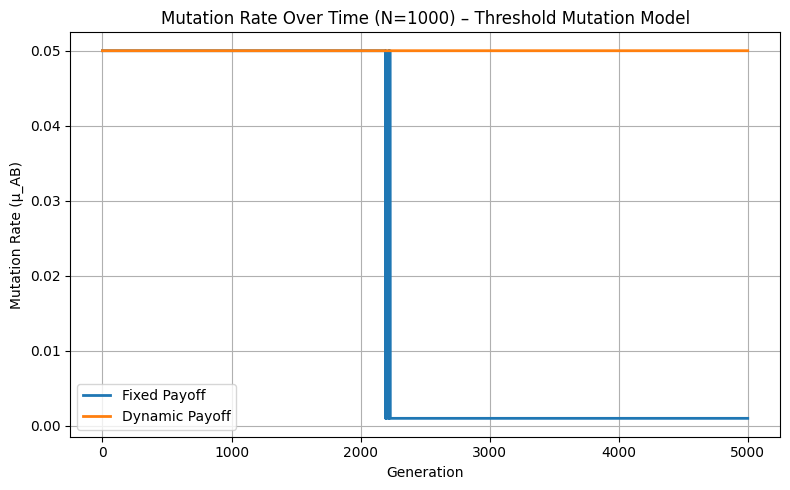

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

def simulate_exponential_fixed(): pass
def simulate_exponential_dynamic(): pass

def track_mutation_exponential(sim_func, N, generations, p_A_init=0.5, mu_0=0.05, beta=5, alpha=0.05):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    mutation_rates = []

    for _ in range(generations):
        p_A = i / N
        p_B = 1 - p_A

        if 'dynamic' in sim_func.__name__:
            a_i = a / (1 + alpha * i) if i > 0 else a
            d_i = d / (1 + alpha * (N - i)) if (N - i) > 0 else d
        else:
            a_i = a
            d_i = d

        f_A = (a_i * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d_i * (N - i - 1)) / (N - i) if i < N else 0

        mu_AB = mu_0 * np.exp(-beta * p_A)
        mutation_rates.append(mu_AB)

        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5

        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else (
            "A" if np.random.rand() < mu_AB else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0

    return mutation_rates

# parameters
generation_count = 5000
param_sets = {
    "Fixed Payoff (N=100)": dict(sim_func="simulate_exponential_fixed", N=100),
    "Dynamic Payoff (N=100)": dict(sim_func="simulate_exponential_dynamic", N=100),
    "Fixed Payoff (N=1000)": dict(sim_func="simulate_exponential_fixed", N=1000),
    "Dynamic Payoff (N=1000)": dict(sim_func="simulate_exponential_dynamic", N=1000),
}

# Run simulations and store
mutation_rate_traces = {}
for label, params in param_sets.items():
    sim_func_name = params.pop("sim_func")
    sim_func = eval(sim_func_name)
    mutation_rate_traces[label] = track_mutation_exponential(
        sim_func=sim_func,
        generations=generation_count,
        mu_0=0.05,
        beta=5,
        p_A_init=0.5,
        alpha=0.05,
        **params
    )

# Plot for N = 100
plt.figure(figsize=(8, 5))
plt.plot(mutation_rate_traces["Fixed Payoff (N=100)"], label="Fixed Payoff", linewidth=2)
plt.plot(mutation_rate_traces["Dynamic Payoff (N=100)"], label="Dynamic Payoff", linewidth=2)
plt.title("Mutation Rate Over Time (N=100) – Exponential Mutation Model")
plt.xlabel("Generation")
plt.ylabel("Mutation Rate (μ_AB)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for N = 1000
plt.figure(figsize=(8, 5))
plt.plot(mutation_rate_traces["Fixed Payoff (N=1000)"], label="Fixed Payoff", linewidth=2)
plt.plot(mutation_rate_traces["Dynamic Payoff (N=1000)"], label="Dynamic Payoff", linewidth=2)
plt.title("Mutation Rate Over Time (N=1000) – Exponential Mutation Model")
plt.xlabel("Generation")
plt.ylabel("Mutation Rate (μ_AB)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Mutation tracking for logistic and threshold models
def track_mutation_logistic(sim_func, N, generations, p_A_init=0.5, mu_0=0.05, beta=5, p_c=0.7, alpha=0.05):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    mutation_rates = []

    for _ in range(generations):
        p_A = i / N
        p_B = 1 - p_A

        if 'dynamic' in sim_func.__name__:
            a_i = a / (1 + alpha * i) if i > 0 else a
            d_i = d / (1 + alpha * (N - i)) if (N - i) > 0 else d
        else:
            a_i = a
            d_i = d

        f_A = (a_i * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d_i * (N - i - 1)) / (N - i) if i < N else 0

        mu_AB = mu_0 / (1 + np.exp(beta * (p_A - p_c)))
        mutation_rates.append(mu_AB)

        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5

        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else (
            "A" if np.random.rand() < mu_AB else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0

    return mutation_rates

def track_mutation_threshold(sim_func, N, generations, p_A_init=0.5, mu_0=0.05, mu_low=0.001, p_th=0.9, alpha=0.05):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    mutation_rates = []

    for _ in range(generations):
        p_A = i / N
        p_B = 1 - p_A

        if 'dynamic' in sim_func.__name__:
            a_i = a / (1 + alpha * i) if i > 0 else a
            d_i = d / (1 + alpha * (N - i)) if (N - i) > 0 else d
        else:
            a_i = a
            d_i = d

        f_A = (a_i * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d_i * (N - i - 1)) / (N - i) if i < N else 0

        mu_AB = mu_0 if p_A < p_th else mu_low
        mutation_rates.append(mu_AB)

        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5

        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else (
            "A" if np.random.rand() < mu_AB else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0

    return mutation_rates

# Run logistic and threshold tracking for N=100 and N=1000
def run_model_mutation_tracking(model_name, tracker_func, sim_func_fixed, sim_func_dynamic, generations=5000):
    traces = {}
    for N in [100, 1000]:
        traces[f"{model_name} – Fixed Payoff (N={N})"] = tracker_func(
            sim_func=sim_func_fixed, N=N, generations=generations)
        traces[f"{model_name} – Dynamic Payoff (N={N})"] = tracker_func(
            sim_func=sim_func_dynamic, N=N, generations=generations)
    return traces

# logistic model
logistic_traces = run_model_mutation_tracking(
    "Logistic",
    tracker_func=track_mutation_logistic,
    sim_func_fixed=simulate_exponential_fixed,
    sim_func_dynamic=simulate_exponential_dynamic
)

# threshold model
threshold_traces = run_model_mutation_tracking(
    "Threshold",
    tracker_func=track_mutation_threshold,
    sim_func_fixed=simulate_exponential_fixed,
    sim_func_dynamic=simulate_exponential_dynamic
)

# Plot for logistic and threshold
def plot_model_mutation_traces(traces, model_name):
    for N in [100, 1000]:
        plt.figure(figsize=(8, 5))
        plt.plot(traces[f"{model_name} – Fixed Payoff (N={N})"], label="Fixed Payoff", linewidth=2)
        plt.plot(traces[f"{model_name} – Dynamic Payoff (N={N})"], label="Dynamic Payoff", linewidth=2)
        plt.title(f"Mutation Rate Over Time (N={N}) – {model_name} Mutation Model")
        plt.xlabel("Generation")
        plt.ylabel("Mutation Rate (μ_AB)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_model_mutation_traces(logistic_traces, "Logistic")
plot_model_mutation_traces(threshold_traces, "Threshold")


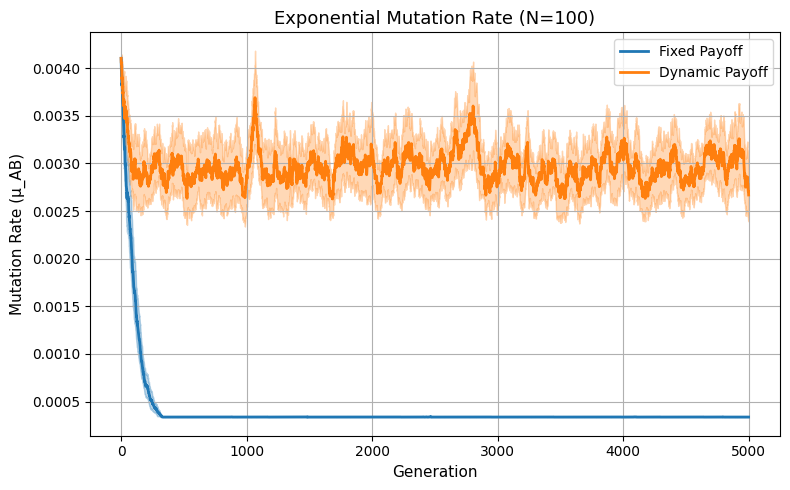

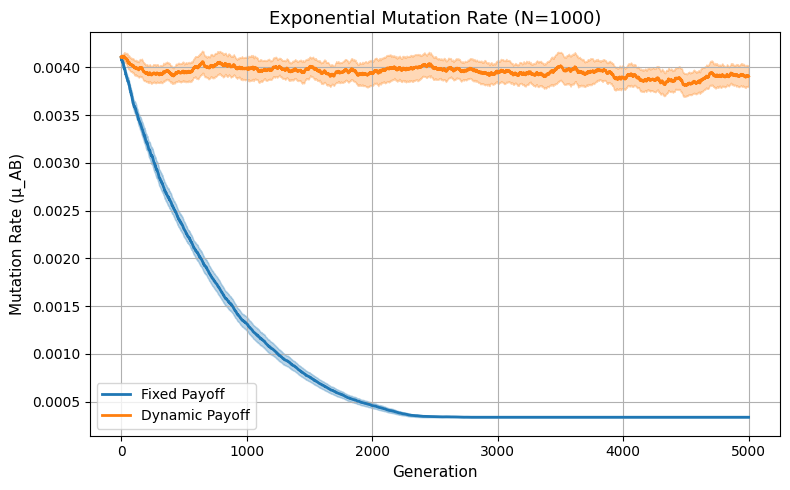

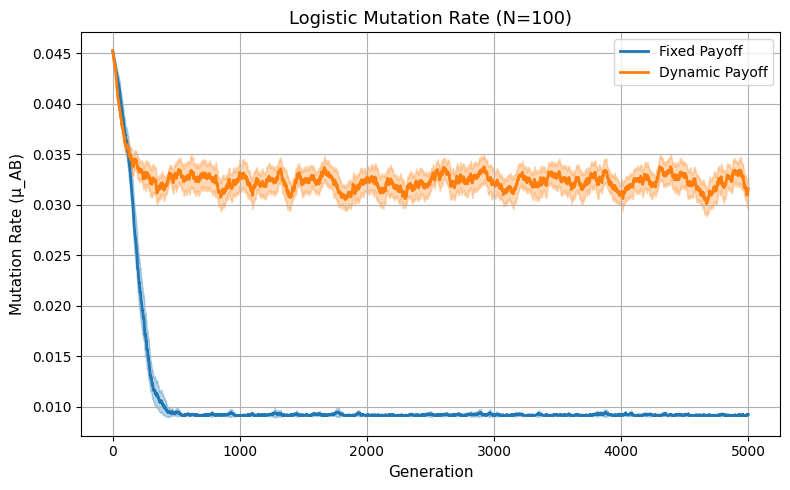

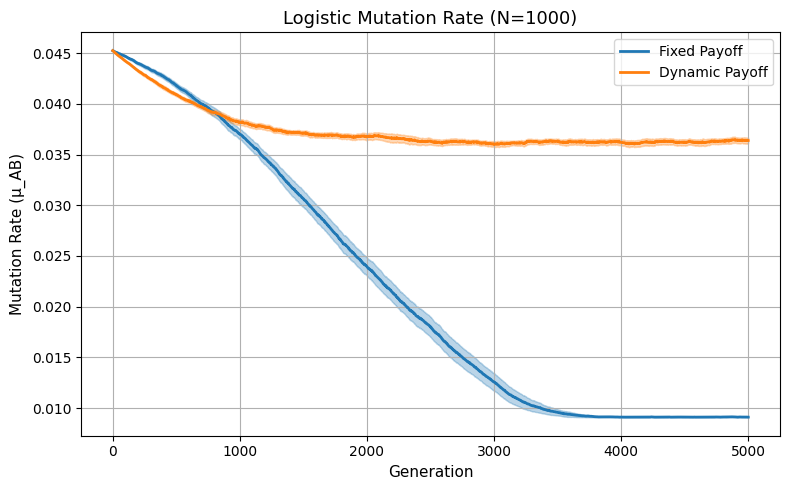

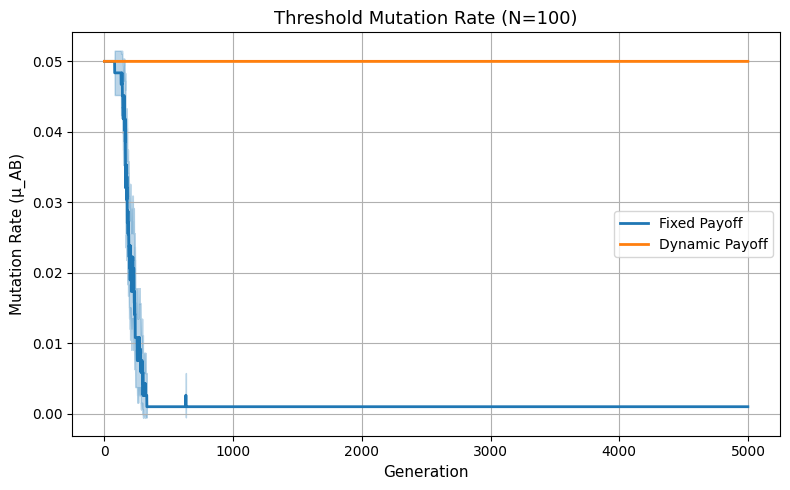

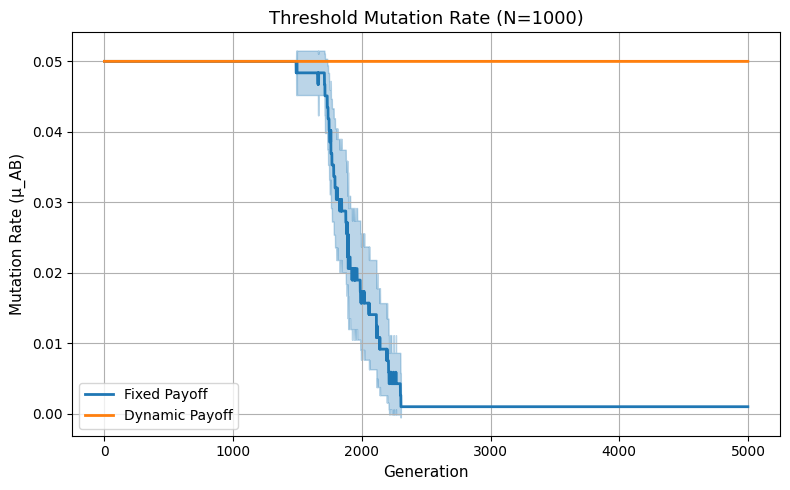

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define tracking functions for each model
def track_mutation_exponential(sim_func, N, generations, p_A_init=0.5, mu_0=0.05, beta=5, alpha=0.05):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    mutation_rates = []
    for _ in range(generations):
        p_A = i / N
        if 'dynamic' in sim_func:
            a_i = a / (1 + alpha * i) if i > 0 else a
            d_i = d / (1 + alpha * (N - i)) if (N - i) > 0 else d
        else:
            a_i = a
            d_i = d
        mu_AB = mu_0 * np.exp(-beta * p_A)
        mutation_rates.append(mu_AB)
        f_A = (a_i * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d_i * (N - i - 1)) / (N - i) if i < N else 0
        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5
        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else ("A" if np.random.rand() < mu_AB else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0
    return mutation_rates

def track_mutation_logistic(sim_func, N, generations, p_A_init=0.25, mu_0=0.05, beta=5, p_c=0.7, alpha=0.05):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    mutation_rates = []
    for _ in range(generations):
        p_A = i / N
        if 'dynamic' in sim_func:
            a_i = a / (1 + alpha * i) if i > 0 else a
            d_i = d / (1 + alpha * (N - i)) if (N - i) > 0 else d
        else:
            a_i = a
            d_i = d
        mu_AB = mu_0 / (1 + np.exp(beta * (p_A - p_c)))
        mutation_rates.append(mu_AB)
        f_A = (a_i * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d_i * (N - i - 1)) / (N - i) if i < N else 0
        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5
        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else ("A" if np.random.rand() < mu_AB else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0
    return mutation_rates

def track_mutation_threshold(sim_func, N, generations, p_A_init=0.5, mu_0=0.05, mu_low=0.001, p_th=0.9, alpha=0.05):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    mutation_rates = []
    for _ in range(generations):
        p_A = i / N
        if 'dynamic' in sim_func:
            a_i = a / (1 + alpha * i) if i > 0 else a
            d_i = d / (1 + alpha * (N - i)) if (N - i) > 0 else d
        else:
            a_i = a
            d_i = d
        mu_AB = mu_0 if p_A < p_th else mu_low
        mutation_rates.append(mu_AB)
        f_A = (a_i * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d_i * (N - i - 1)) / (N - i) if i < N else 0
        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5
        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else ("A" if np.random.rand() < mu_AB else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0
    return mutation_rates

# Run replicates for CI
def run_multiple_mutation_tracks(track_func, sim_func, num_reps=30, **kwargs):
    return np.array([track_func(sim_func=sim_func, **kwargs) for _ in range(num_reps)])

# Plot CI function
def plot_mutation_ci(data, model_name, payoff_type, N, color):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    lower = mean - 1.96 * std / np.sqrt(data.shape[0])
    upper = mean + 1.96 * std / np.sqrt(data.shape[0])
    plt.plot(mean, label=f"{payoff_type} Payoff", color=color, linewidth=2)
    plt.fill_between(range(len(mean)), lower, upper, color=color, alpha=0.3)
    plt.title(f"{model_name} Mutation Rate (N={N})", fontsize=13)
    plt.xlabel("Generation", fontsize=11)
    plt.ylabel("Mutation Rate (μ_AB)", fontsize=11)
    plt.grid(True)
    plt.legend()

# Simulation & plotting
results = {}
for model_name, track_func in [
    ("Exponential", track_mutation_exponential),
    ("Logistic", track_mutation_logistic),
    ("Threshold", track_mutation_threshold)
]:
    for N in [100, 1000]:
        results[(model_name, "Fixed", N)] = run_multiple_mutation_tracks(
            track_func, "simulate_exponential_fixed", N=N, generations=5000
        )
        results[(model_name, "Dynamic", N)] = run_multiple_mutation_tracks(
            track_func, "simulate_exponential_dynamic", N=N, generations=5000
        )

# Plot each model and N
for model_name in ["Exponential", "Logistic", "Threshold"]:
    for N in [100, 1000]:
        plt.figure(figsize=(8, 5))
        plot_mutation_ci(results[(model_name, "Fixed", N)], model_name, "Fixed", N, 'tab:blue')
        plot_mutation_ci(results[(model_name, "Dynamic", N)], model_name, "Dynamic", N, 'tab:orange')
        plt.tight_layout()
        plt.show()


###**Plot of Mutation Decay Functions**

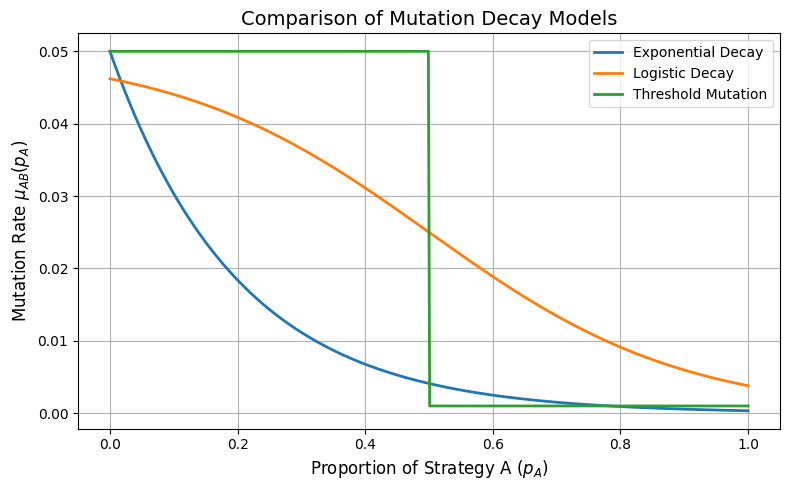

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu_0 = 0.05
mu_low = 0.001
beta = 5
p_c = 0.5
p_th = 0.5

# Proportion of strategy A (x-axis)
p_A = np.linspace(0, 1, 500)

# Mutation models
mu_exp = mu_0 * np.exp(-beta * p_A)
mu_log = mu_0 / (1 + np.exp(beta * (p_A - p_c)))
mu_thresh = np.where(p_A < p_th, mu_0, mu_low)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(p_A, mu_exp, label='Exponential Decay', linewidth=2)
plt.plot(p_A, mu_log, label='Logistic Decay', linewidth=2)
plt.plot(p_A, mu_thresh, label='Threshold Mutation', linewidth=2)

# Aesthetics
plt.title("Comparison of Mutation Decay Models", fontsize=14)
plt.xlabel("Proportion of Strategy A ($p_A$)", fontsize=12)
plt.ylabel("Mutation Rate $\mu_{AB}(p_A)$", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


###**Fixed- Model Comparison w/ Confidence Intervals**

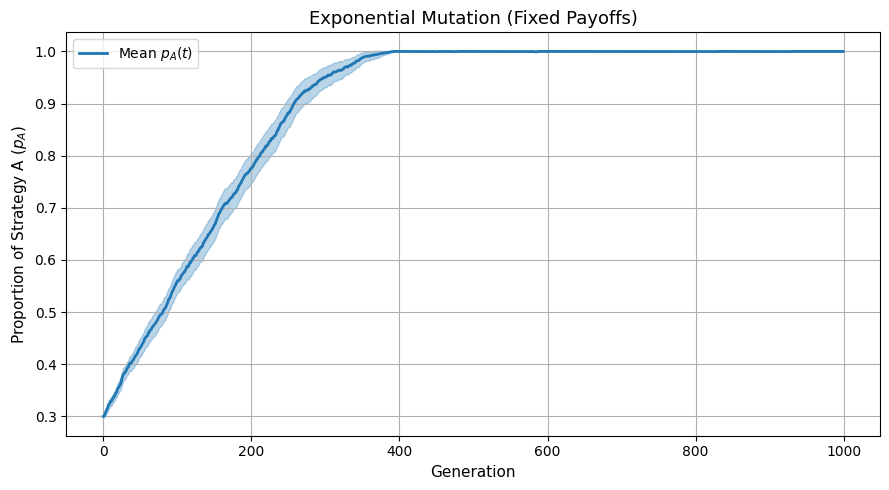

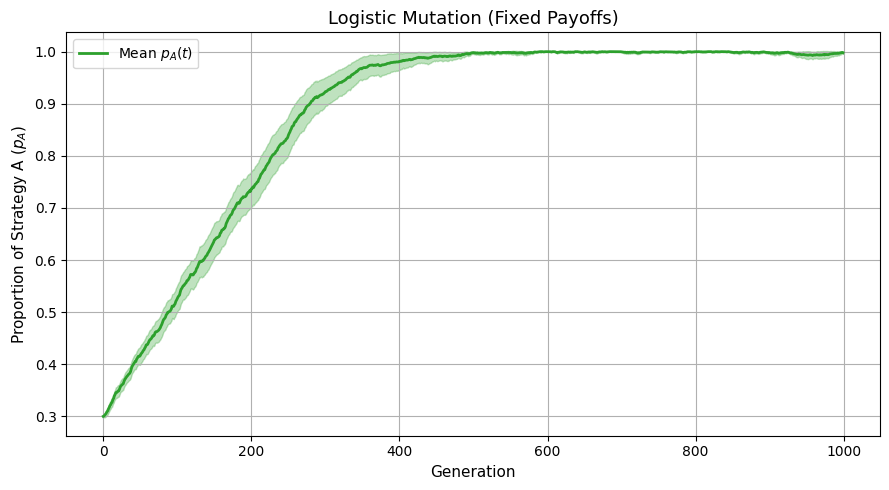

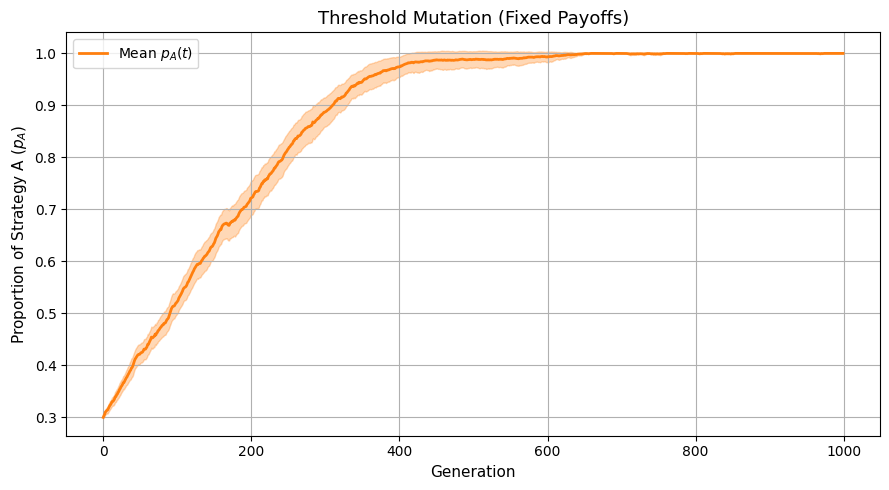

In [ ]:
# @title
# Re-import necessary libraries after kernel reset
import numpy as np
import matplotlib.pyplot as plt

# Redefine simulation functions
def simulate_exponential_fixed(N=100, generations=5000, p_A_init=0.5, mu_0=0.05, beta=5):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    history = []
    for _ in range(generations):
        p_A = i / N
        p_B = 1 - p_A
        f_A = (a * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d * (N - i - 1)) / (N - i) if i < N else 0
        mu_AB = mu_0 * np.exp(-beta * p_A)
        mu_BA = mu_0 * np.exp(-beta * p_B)
        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5
        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else ("A" if np.random.rand() < mu_BA else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0
        history.append(p_A)
    return history

def simulate_logistic_fixed(N=100, generations=5000, p_A_init=0.5, mu_0=0.05, beta=5, p_c=0.5):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    history = []
    for _ in range(generations):
        p_A = i / N
        p_B = 1 - p_A
        f_A = (a * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d * (N - i - 1)) / (N - i) if i < N else 0
        mu_AB = mu_0 / (1 + np.exp(beta * (p_A - p_c)))
        mu_BA = mu_0 / (1 + np.exp(beta * (p_B - p_c)))
        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5
        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else ("A" if np.random.rand() < mu_BA else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0
        history.append(p_A)
    return history

def simulate_threshold_fixed(N=100, generations=5000, p_A_init=0.5, mu_0=0.05, mu_low=0.001, p_th=0.5):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    history = []
    for _ in range(generations):
        p_A = i / N
        p_B = 1 - p_A
        f_A = (a * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d * (N - i - 1)) / (N - i) if i < N else 0
        mu_AB = mu_0 if p_A < p_th else mu_low
        mu_BA = mu_0 if p_B < p_th else mu_low
        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5
        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else ("A" if np.random.rand() < mu_BA else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0
        history.append(p_A)
    return history

# Runner for multiple simulations
def run_replicates(sim_func, num_reps=50, **kwargs):
    results = []
    for _ in range(num_reps):
        history = sim_func(**kwargs)
        results.append(history)
    return np.array(results)

# Run all three mutation models
N = 100
generations = 1000
reps = 50
mu_0 = 0.05
mu_low = 0.001
beta = 5
p_c = 0.7
p_th = 0.9
p_A_init = 0.3

exp_reps = run_replicates(simulate_exponential_fixed, reps, N=N, generations=generations, p_A_init=p_A_init, mu_0=mu_0, beta=beta)
log_reps = run_replicates(simulate_logistic_fixed, reps, N=N, generations=generations, p_A_init=p_A_init, mu_0=mu_0, beta=beta, p_c=p_c)
thr_reps = run_replicates(simulate_threshold_fixed, reps, N=N, generations=generations, p_A_init=p_A_init, mu_0=mu_0, mu_low=mu_low, p_th=p_th)

# Define plotting function
def plot_ci_subplot(data, title, color):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    lower = mean - 1.96 * std / np.sqrt(data.shape[0])
    upper = mean + 1.96 * std / np.sqrt(data.shape[0])

    plt.plot(mean, label='Mean $p_A(t)$', color=color, linewidth=2)
    plt.fill_between(range(len(mean)), lower, upper, color=color, alpha=0.3)
    plt.title(title, fontsize=13)
    plt.xlabel("Generation", fontsize=11)
    plt.ylabel("Proportion of Strategy A ($p_A$)", fontsize=11)
    plt.grid(True)
    plt.legend()

# Plot each model separately
titles = ["Exponential Mutation", "Logistic Mutation", "Threshold Mutation"]
datasets = [exp_reps, log_reps, thr_reps]
colors = ['tab:blue', 'tab:green', 'tab:orange']

for title, data, color in zip(titles, datasets, colors):
    plt.figure(figsize=(9, 5))
    plot_ci_subplot(data, f"{title} (Fixed Payoffs)", color)
    plt.tight_layout()
    plt.show()


### Dynamic Payoff Models w/ Confidence Intervals

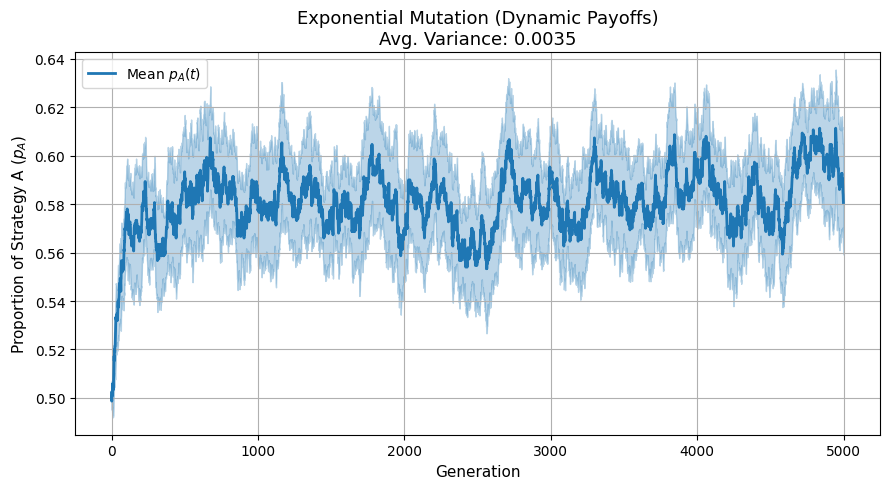

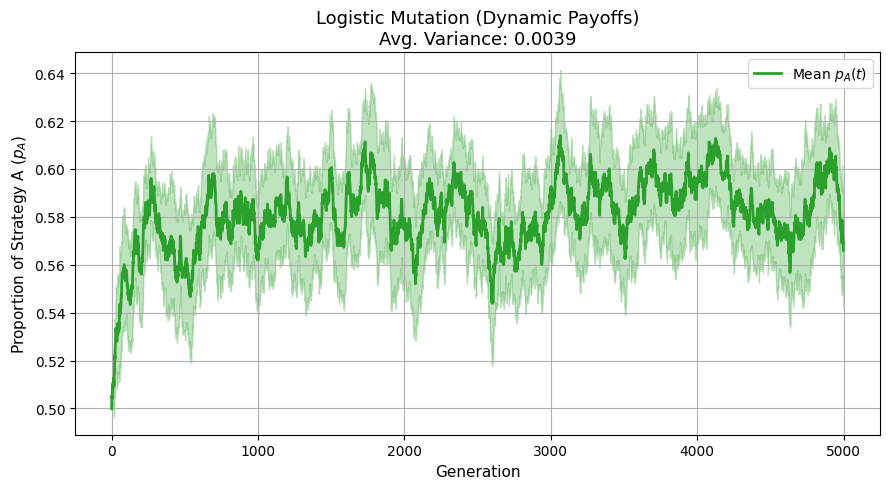

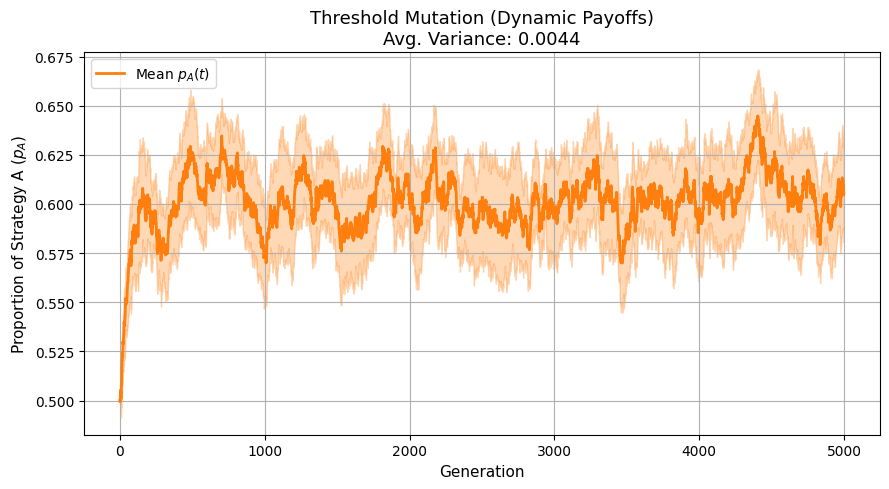

In [ ]:
# @title
# Re-import libraries after code execution state reset
import numpy as np
import matplotlib.pyplot as plt

# Redefine simulation functions for dynamic models
def simulate_exponential_dynamic(N=100, generations=5000, p_A_init=0.5, mu_0=0.05, beta=5, alpha=0.05):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    history = []
    for _ in range(generations):
        p_A = i / N
        p_B = 1 - p_A
        a_i = a / (1 + alpha * i) if i > 0 else a
        d_i = d / (1 + alpha * (N - i)) if (N - i) > 0 else d
        f_A = (a_i * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d_i * (N - i - 1)) / (N - i) if i < N else 0
        mu_AB = mu_0 * np.exp(-beta * p_A)
        mu_BA = mu_0 * np.exp(-beta * p_B)
        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5
        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else ("A" if np.random.rand() < mu_BA else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0
        history.append(p_A)
    return history

def simulate_logistic_dynamic(N=100, generations=5000, p_A_init=0.5, mu_0=0.05, beta=5, p_c=0.5, alpha=0.05):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    history = []
    for _ in range(generations):
        p_A = i / N
        p_B = 1 - p_A
        a_i = a / (1 + alpha * i) if i > 0 else a
        d_i = d / (1 + alpha * (N - i)) if (N - i) > 0 else d
        f_A = (a_i * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d_i * (N - i - 1)) / (N - i) if i < N else 0
        mu_AB = mu_0 / (1 + np.exp(beta * (p_A - p_c)))
        mu_BA = mu_0 / (1 + np.exp(beta * (p_B - p_c)))
        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5
        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else ("A" if np.random.rand() < mu_BA else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0
        history.append(p_A)
    return history

def simulate_threshold_dynamic(N=100, generations=5000, p_A_init=0.5, mu_0=0.05, mu_low=0.001, p_th=0.5, alpha=0.05):
    i = int(p_A_init * N)
    a, b, d = 3.0, 2.0, 1.0
    history = []
    for _ in range(generations):
        p_A = i / N
        p_B = 1 - p_A
        a_i = a / (1 + alpha * i) if i > 0 else a
        d_i = d / (1 + alpha * (N - i)) if (N - i) > 0 else d
        f_A = (a_i * (i - 1) + b * (N - i)) / i if i > 0 else 0
        f_B = (b * i + d_i * (N - i - 1)) / (N - i) if i < N else 0
        mu_AB = mu_0 if p_A < p_th else mu_low
        mu_BA = mu_0 if p_B < p_th else mu_low
        total_fit = i * f_A + (N - i) * f_B
        prob_A = (i * f_A) / total_fit if total_fit > 0 else 0.5
        new = "B" if np.random.rand() < mu_AB else "A" if np.random.rand() < prob_A else ("A" if np.random.rand() < mu_BA else "B")
        i += 1 if new == "A" and i < N else -1 if new == "B" and i > 0 else 0
        history.append(p_A)
    return history

# Run replicate simulations
def run_replicates(sim_func, num_reps=30, **kwargs):
    return np.array([sim_func(**kwargs) for _ in range(num_reps)])

# Parameters
N = 100
generations = 5000
mu_0 = 0.05
mu_low = 0.005
beta = 5
p_c = 0.5
p_th = 0.5
p_A_init = 0.5

# Run simulations
exp_reps = run_replicates(simulate_exponential_dynamic, N=N, generations=generations, p_A_init=p_A_init, mu_0=mu_0, beta=beta)
log_reps = run_replicates(simulate_logistic_dynamic, N=N, generations=generations, p_A_init=p_A_init, mu_0=mu_0, beta=beta, p_c=p_c)
thr_reps = run_replicates(simulate_threshold_dynamic, N=N, generations=generations, p_A_init=p_A_init, mu_0=mu_0, mu_low=mu_low, p_th=p_th)

# Define plotting function
def plot_ci_with_variance(data, title, color):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    lower = mean - 1.96 * std / np.sqrt(data.shape[0])
    upper = mean + 1.96 * std / np.sqrt(data.shape[0])
    avg_variance = np.mean(np.var(data, axis=0))

    plt.plot(mean, label='Mean $p_A(t)$', color=color, linewidth=2)
    plt.fill_between(range(len(mean)), lower, upper, color=color, alpha=0.3)
    plt.title(f"{title} (Dynamic Payoffs)\nAvg. Variance: {avg_variance:.4f}", fontsize=13)
    plt.xlabel("Generation", fontsize=11)
    plt.ylabel("Proportion of Strategy A ($p_A$)", fontsize=11)
    plt.grid(True)
    plt.legend()

# Plot results
titles = ["Exponential Mutation", "Logistic Mutation", "Threshold Mutation"]
datasets = [exp_reps, log_reps, thr_reps]
colors = ['tab:blue', 'tab:green', 'tab:orange']

for title, data, color in zip(titles, datasets, colors):
    plt.figure(figsize=(9, 5))
    plot_ci_with_variance(data, title, color)
    plt.tight_layout()
    plt.show()
